# Mounting google drive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Changing the present working directory to MyDrive

In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
pwd

'/content/drive/MyDrive'

# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta 
import numpy as np
import re
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Reading the file "sensor.csv" using pandas

In [ ]:
data=pd.read_csv("sensor.csv") #reading data using pandas

# Understanding the dataset

## Checking the shape of dataset

In [ ]:
print(data.shape) #printing the shape of data

(220320, 55)


## Checking the different features present in the dataset

In [ ]:
print("The features of data :", data.columns.values) #printing the column names of the data

The features of data : ['Unnamed: 0' 'timestamp' 'sensor_00' 'sensor_01' 'sensor_02' 'sensor_03'
 'sensor_04' 'sensor_05' 'sensor_06' 'sensor_07' 'sensor_08' 'sensor_09'
 'sensor_10' 'sensor_11' 'sensor_12' 'sensor_13' 'sensor_14' 'sensor_15'
 'sensor_16' 'sensor_17' 'sensor_18' 'sensor_19' 'sensor_20' 'sensor_21'
 'sensor_22' 'sensor_23' 'sensor_24' 'sensor_25' 'sensor_26' 'sensor_27'
 'sensor_28' 'sensor_29' 'sensor_30' 'sensor_31' 'sensor_32' 'sensor_33'
 'sensor_34' 'sensor_35' 'sensor_36' 'sensor_37' 'sensor_38' 'sensor_39'
 'sensor_40' 'sensor_41' 'sensor_42' 'sensor_43' 'sensor_44' 'sensor_45'
 'sensor_46' 'sensor_47' 'sensor_48' 'sensor_49' 'sensor_50' 'sensor_51'
 'machine_status']


## Checking the different categories present in the machine_status column

In [ ]:
print(data['machine_status'].value_counts()) #Printing the count of each unique values in machine status column

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


In [ ]:
print(data.head(5)) #printing the top 5 rows of the data

   Unnamed: 0            timestamp  ...  sensor_51  machine_status
0           0  2018-04-01 00:00:00  ...   201.3889          NORMAL
1           1  2018-04-01 00:01:00  ...   201.3889          NORMAL
2           2  2018-04-01 00:02:00  ...   203.7037          NORMAL
3           3  2018-04-01 00:03:00  ...   203.1250          NORMAL
4           4  2018-04-01 00:04:00  ...   201.3889          NORMAL

[5 rows x 55 columns]


# Data Preprocessing

## Removing Unnamed: 0 column from the data, because it is not useful for building a ML model

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
print(data.shape) #printing the shape of data after removing the 'Unnamed: 0' column

(220320, 54)


## Checking for Duplicates

In [ ]:
print('Number of duplicates present in the data = {}'.format(sum(data.duplicated())))

Number of duplicates present in the data = 0




*   There are no duplicates in the data



## Checking for NaN/null values

In [ ]:
print('Total NaN/Null values present in the data = {}'.format(data.isnull().values.sum()))

Total NaN/Null values present in the data = 344574


## Checking the percentage of NaN/Null values in each column

In [ ]:
for column in data.columns:
    print("percentage of NaN/Null values in {} column is {}".format(str(column),(data[column].isnull().values.sum())*100/(data[column].shape[0])))

percentage of NaN/Null values in timestamp column is 0.0
percentage of NaN/Null values in sensor_00 column is 4.633260711692084
percentage of NaN/Null values in sensor_01 column is 0.16748366013071894
percentage of NaN/Null values in sensor_02 column is 0.008623819898329702
percentage of NaN/Null values in sensor_03 column is 0.008623819898329702
percentage of NaN/Null values in sensor_04 column is 0.008623819898329702
percentage of NaN/Null values in sensor_05 column is 0.008623819898329702
percentage of NaN/Null values in sensor_06 column is 2.177741466957153
percentage of NaN/Null values in sensor_07 column is 2.474128540305011
percentage of NaN/Null values in sensor_08 column is 2.3179920116194626
percentage of NaN/Null values in sensor_09 column is 2.0856027596223674
percentage of NaN/Null values in sensor_10 column is 0.008623819898329702
percentage of NaN/Null values in sensor_11 column is 0.008623819898329702
percentage of NaN/Null values in sensor_12 column is 0.00862381989832

*   Since the sensor_15 column has 100 percent Nan/Null values, we are removing this column

In [ ]:
data = data.drop(['sensor_15'], axis=1) #Removing 'sensor_15' column

In [ ]:
print(data.shape) #printing the shape of data after removing 'sensor_15' column

(220320, 53)


## Checking for data imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


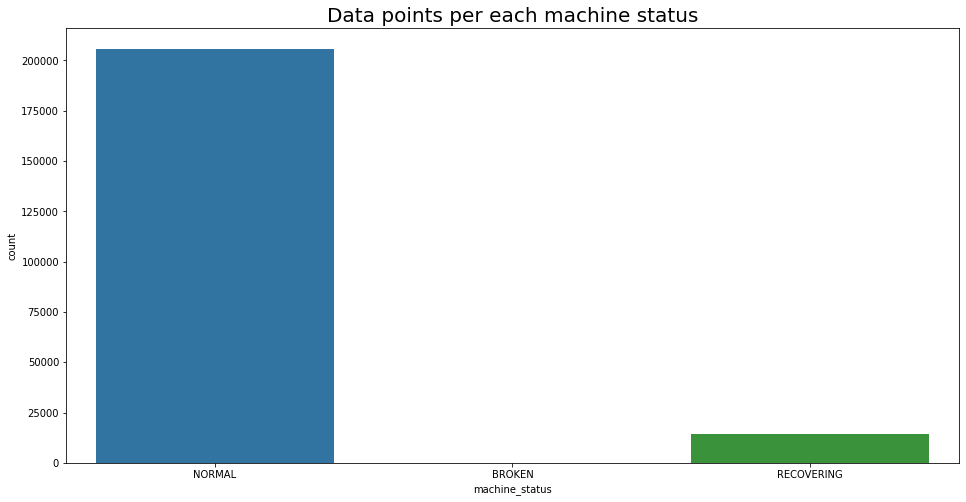

In [ ]:
#plotting the count plot of machine_status column
plt.figure(figsize=(16,8))
plt.title('Data points per each machine status', fontsize=20)
sns.countplot(data.machine_status)
plt.show()

# Defining problem statement

**Problem statement:** In this dataset, we can see there are three classes in the machine_status column 1. NORMAL, 2. RECOVERING 3. BROKEN. We are predicting whether the machine will become faulty in the future time interval using this machine_status column as a target variable.
Dataset is modified as follows:

1. We are considering the datapoints with machine status=RECOVERING, as machine status = 'BROKEN' as recovering state is not the stable operating state of the machine.

2. In the modified dataset, There will be two classes 1.Normal(encoded as 0), 2. Broken(encoded as 1). So, this will
become a binary classification problem

The above modification is done as a part of data preprocessing step. Further modifification of the machine_status column to perform predictive analysis, that is to predict whether the machine will become faulty or not in the next 'm' timestamps is done after the best value of 'm' is obtained using hyperparameter tuning for 'm'.




##Encoding machine_status = BROKEN and machine_status = RECOVERING as '1' and machine_status = NORMAL as '0'

In [ ]:
data['machine_status'].replace(to_replace='BROKEN',value=1,inplace=True)
data['machine_status'].replace(to_replace='RECOVERING',value=1,inplace=True)
data['machine_status'].replace(to_replace='NORMAL',value=0,inplace=True)
#data.reset_index(drop=True,inplace=True) #Resetting the indexes
print(data.shape)

(220320, 53)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


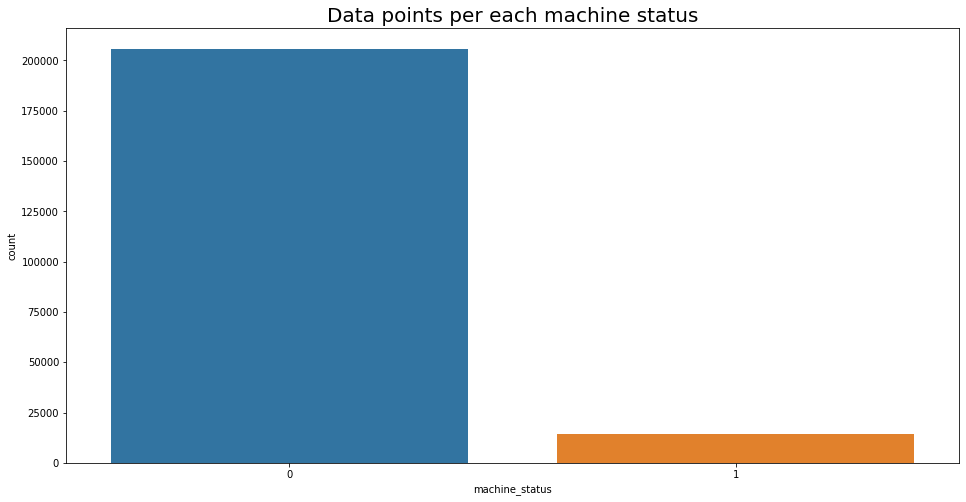

In [ ]:
#plotting the count plot of machine_status column
plt.figure(figsize=(16,8))
plt.title('Data points per each machine status', fontsize=20)
sns.countplot(data.machine_status)
plt.show()

In [ ]:
print(data['machine_status'].value_counts()) #Printing the count of each unique values in machine status column

0    205836
1     14484
Name: machine_status, dtype: int64


## Removing timestamp column

In [ ]:
data = data.drop(['timestamp'], axis=1)

In [ ]:
print(data.shape)

(220320, 52)


# Exploratory data analysis

## Checking the correlation of all the features with machine_status(target variable) 

In [ ]:
imp_features=data.corr().abs()['machine_status'].sort_values(ascending=False) # This will return the correlation of the target variable 'machine_status' with all the features and it is sorted in descending order

In [ ]:
print(imp_features[1:16]) #Printing the top 15 features which are highly correlated with the target variable

sensor_04    0.916227
sensor_10    0.872493
sensor_11    0.823450
sensor_00    0.810822
sensor_02    0.791278
sensor_06    0.773933
sensor_12    0.758752
sensor_50    0.732214
sensor_07    0.699499
sensor_01    0.673108
sensor_03    0.646204
sensor_08    0.637435
sensor_09    0.626434
sensor_05    0.434469
sensor_40    0.375146
Name: machine_status, dtype: float64


In [ ]:
least_correlated_features=imp_features.iloc[-5:]

In [ ]:
print(least_correlated_features)  # printing 5 least correlated features

sensor_34    0.039537
sensor_27    0.032565
sensor_39    0.024299
sensor_36    0.019264
sensor_42    0.007412
Name: machine_status, dtype: float64


## Plotting violin plot and PDF for all the features to understand the distribution of class labels for every feature

In [ ]:
'''
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
#https://medium.com/@vladbezden/how-to-set-seaborn-plot-size-in-jupyter-notebook-63ffb1415431

for i in data.columns:
    print(i)
    Machine_normal= data[data['machine_status']==0][i].values
    Machine_broken = data[data['machine_status']==1][i].values
    plt.figure(figsize=(16, 8))
    sns.boxplot(x='machine_status',y=i, data=data)
    plt.title('Box Plots of Machine_normal and Machine_broken ')
    #plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
    temp=str(i) + str(' ')+str('values')
    plt.ylabel(temp)
    #plt.ylabel('sensor values')
    plt.grid()
    plt.show()


    plt.figure(figsize=(16,8))
    sns.distplot(Machine_normal, hist=False, label="Machine_normal")
    sns.distplot(Machine_broken, hist=False, label="Machine_broken")
    plt.title('PDF of Machine_normal_state and Machine_broken')
    plt.xlabel('sensor values')
    plt.legend()
    plt.show()

'''

'\n# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html\n#https://medium.com/@vladbezden/how-to-set-seaborn-plot-size-in-jupyter-notebook-63ffb1415431\n\nfor i in data.columns:\n    print(i)\n    Machine_normal= data[data[\'machine_status\']==0][i].values\n    Machine_broken = data[data[\'machine_status\']==1][i].values\n    plt.figure(figsize=(16, 8))\n    sns.boxplot(x=\'machine_status\',y=i, data=data)\n    plt.title(\'Box Plots of Machine_normal and Machine_broken \')\n    #plt.xticks([1,2],(\'Machine_normal\',\'Machine_will_fails_in_next_48hrs\'))\n    temp=str(i) + str(\' \')+str(\'values\')\n    plt.ylabel(temp)\n    #plt.ylabel(\'sensor values\')\n    plt.grid()\n    plt.show()\n\n\n    plt.figure(figsize=(16,8))\n    sns.distplot(Machine_normal, hist=False, label="Machine_normal")\n    sns.distplot(Machine_broken, hist=False, label="Machine_broken")\n    plt.title(\'PDF of Machine_normal_state and Machine_broken\')\n    plt.xlabel(\'sensor values\')\n    p

## Analysis of the feature 'sensor_04'

violin plot and PDF Of sensor_04 feature


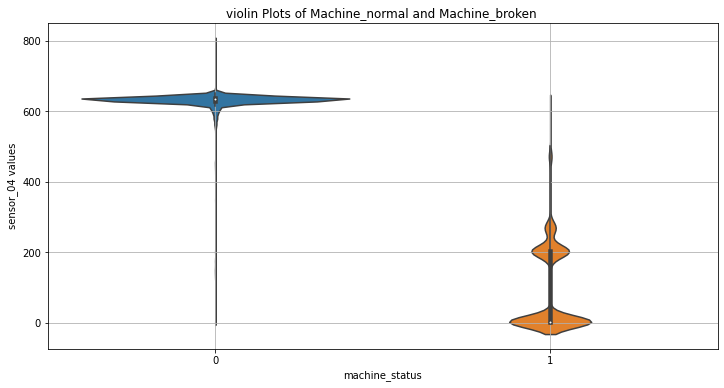

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


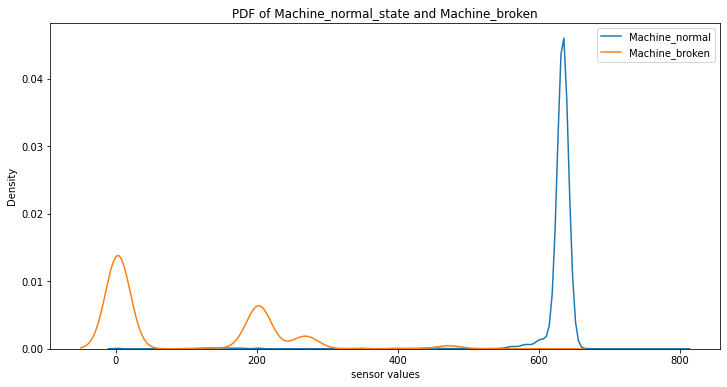

In [ ]:
print("violin plot and PDF Of sensor_04 feature")
Machine_normal= data[data['machine_status']==0]['sensor_04'].values
Machine_broken = data[data['machine_status']==1]['sensor_04'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_04', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_04') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
#https://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array
print('0-100 percentile values of sensor_04 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_04 during the machine_normal state
0 percentile value is 2.798032
5 percentile value is 602.8936
10 percentile value is 621.527770996094
15 percentile value is 624.7686
20 percentile value is 626.7361
25 percentile value is 628.2407
30 percentile value is 629.3981
35 percentile value is 630.4398193359381
40 percentile value is 631.4814
45 percentile value is 632.4074
50 percentile value is 633.3333740234381
55 percentile value is 634.25927734375
60 percentile value is 635.0695
65 percentile value is 635.9954
70 percentile value is 637.0369873046881
75 percentile value is 637.9630000000002
80 percentile value is 639.1204
85 percentile value is 640.50927734375
90 percentile value is 642.129638671875
95 percentile value is 644.7916
100 percentile value is 800.0


In [ ]:
print('0-100 percentile values of sensor_04 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_04 during the machine_broken state
0 percentile value is 2.798032
5 percentile value is 3.0295138359069806
10 percentile value is 3.1047452688217203
15 percentile value is 3.1452543735504204
20 percentile value is 3.2609952688217203
25 percentile value is 3.3362269401550297
30 percentile value is 3.33622694015503
35 percentile value is 3.3362269401550297
40 percentile value is 3.45196747779846
45 percentile value is 3.45196747779846
50 percentile value is 3.56770825386047
55 percentile value is 3.60821747779846
60 percentile value is 3.60821747779846
65 percentile value is 201.02140808105497
70 percentile value is 202.103576660156
75 percentile value is 203.029495239258
80 percentile value is 203.68342590332
85 percentile value is 204.60935974121102
90 percentile value is 259.66086730957005
95 percentile value is 272.008101940155
100 percentile value is 612.1528


###observations of sensor_04

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_04 values are well saperated, also it is seen in the pdf plot that, during the machine is operating in the normal condition, most of the sensor_04 values lies above 600 and during the machine broken state, most of the sensor_04 values lies below 200. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:  
* if the sensor_04 values lies in the range of (621.52, 800.0), then we can conclude that the machine is normal with 90 percent probability.
* if the sensor_04 values lies in the range of (2.79, 3.60), then we can conclude that the machine is broken with 60 percent probability.

Conclusion:
since the probability values are very high, sensor_04 is a very useful feature for classification


## Analysis of the feature 'sensor_38'




violin plot and PDF Of sensor_38 feature


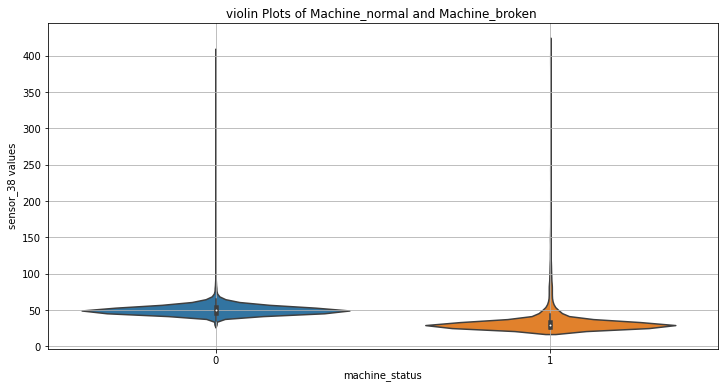

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


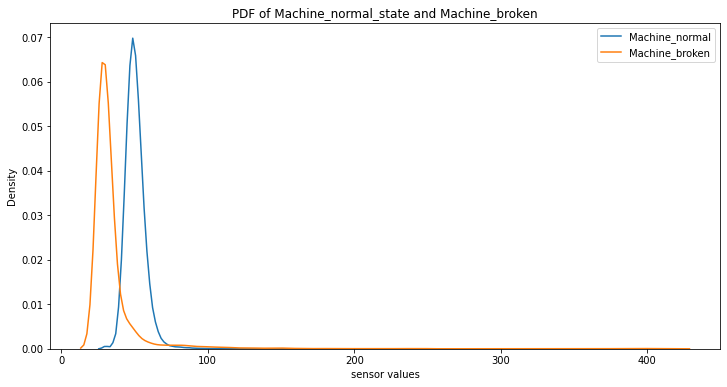

In [ ]:
print("violin plot and PDF Of sensor_38 feature")
Machine_normal= data[data['machine_status']==0]['sensor_38'].values
Machine_broken = data[data['machine_status']==1]['sensor_38'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_38', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_38') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_38 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_38 during the machine_normal state
0 percentile value is 27.6041660308838
5 percentile value is 41.40625
10 percentile value is 42.96875
15 percentile value is 44.27083
20 percentile value is 45.3125
25 percentile value is 46.09375
30 percentile value is 46.875
35 percentile value is 47.91666
40 percentile value is 48.4375
45 percentile value is 49.21875
50 percentile value is 49.73958
55 percentile value is 50.78125
60 percentile value is 51.30208
65 percentile value is 52.34375
70 percentile value is 53.125
75 percentile value is 53.90625
80 percentile value is 55.20832999999999
85 percentile value is 56.51041
90 percentile value is 58.59375
95 percentile value is 61.71875
100 percentile value is 408.5937


In [ ]:
print('0-100 percentile values of sensor_38 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_38 during the machine_broken state
0 percentile value is 24.4791660308838
5 percentile value is 24.739582061767607
10 percentile value is 25.0
15 percentile value is 25.26042
20 percentile value is 26.302082061767607
25 percentile value is 27.3437480926514
30 percentile value is 27.864582061767607
35 percentile value is 28.385416030883803
40 percentile value is 28.645832061767607
45 percentile value is 28.90625
50 percentile value is 29.9479160308838
55 percentile value is 30.4687480926514
60 percentile value is 31.5104160308838
65 percentile value is 32.29166
70 percentile value is 33.0729141235352
75 percentile value is 34.1145820617676
80 percentile value is 35.15625
85 percentile value is 38.28125
90 percentile value is 44.79166
95 percentile value is 59.11458
100 percentile value is 417.7083


###observations of sensor_38

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_38 values are well saperated, also it is seen in the pdf plot that, most of the sensor_38 values are less during the broken state compared to normal state. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state :  
* if the sensor_38 values lies in the range of (41.40, 61.71), then we can conclude that the machine is normal with 90 percent probability.
* if the sensor_38 values lies in the range of (24.47, 59.11), then we can conclude that the machine is broken with 95 percent probability.

Conclusion:
since the probability values are very high, sensor_38 is a very useful feature for classification


## Analysis of the feature 'sensor_00'

violin plot and PDF Of sensor_00 feature


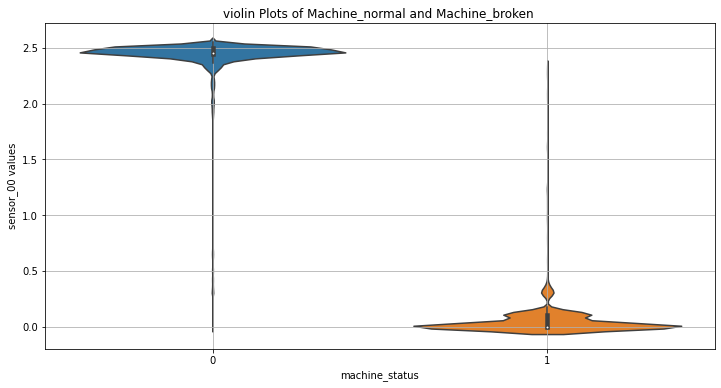

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


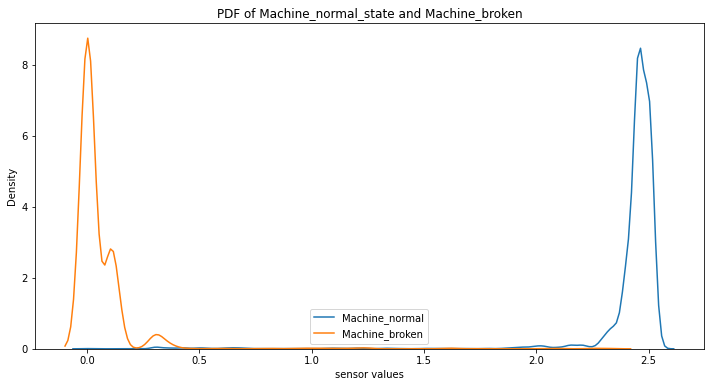

In [ ]:
print("violin plot and PDF Of sensor_00 feature")
Machine_normal= data[data['machine_status']==0]['sensor_00'].values
Machine_broken = data[data['machine_status']==1]['sensor_00'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_00', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_00') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_00 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_00 during the machine_normal state
0 percentile value is 0.0
5 percentile value is 2.3011
10 percentile value is 2.392593
15 percentile value is 2.402431
20 percentile value is 2.421123
25 percentile value is 2.444734
30 percentile value is 2.449653
35 percentile value is 2.45162
40 percentile value is 2.453588
45 percentile value is 2.455556
50 percentile value is 2.456539
55 percentile value is 2.459491
60 percentile value is 2.468345
65 percentile value is 2.481134
70 percentile value is 2.495891
75 percentile value is 2.499826
80 percentile value is 2.503762
85 percentile value is 2.504745
90 percentile value is 2.508681
95 percentile value is 2.510648
100 percentile value is 2.549016


In [ ]:
print('0-100 percentile values of sensor_00 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_00 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0019675926305353602
10 percentile value is 0.0019675926305353602
15 percentile value is 0.0019675926305353602
20 percentile value is 0.0019675926305353602
25 percentile value is 0.0019675926305353602
30 percentile value is 0.0019675926305353602
35 percentile value is 0.0019675926305353602
40 percentile value is 0.001967593
45 percentile value is 0.001967593
50 percentile value is 0.001967593
55 percentile value is 0.003935185
60 percentile value is 0.003935185
65 percentile value is 0.00393518526107073
70 percentile value is 0.00393518526107073
75 percentile value is 0.109201394021511
80 percentile value is 0.1092014
85 percentile value is 0.11018519103527097
90 percentile value is 0.112152777612209
95 percentile value is 0.3039931
100 percentile value is 2.321759


###observations of sensor_00

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_00 values are well saperated, also it is seen in the pdf plot that, both the distributions are well saperated. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_00 values lies in the range of (2.30, 2.54), then we can conclude that the machine is normal with 95 percent probability.
* if the sensor_00 values lies in the range of (0.00, 0.30), then we can conclude that the machine is broken with 95 percent probability.

Conclusion:
since the probability values are very high, sensor_00 is a very useful feature for classification


## Analysis of the feature 'sensor_39'


violin plot and PDF Of sensor_39 feature


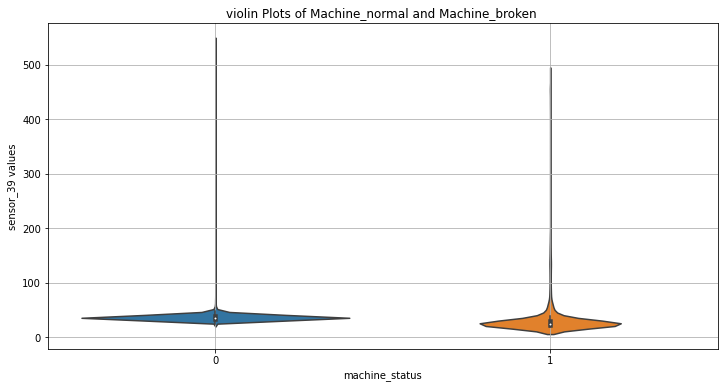

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


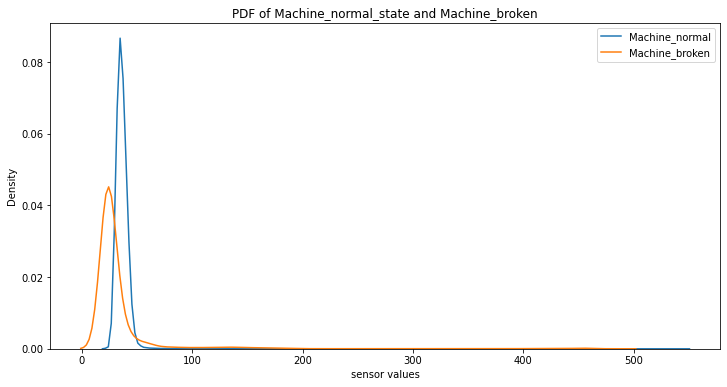

In [ ]:
print("violin plot and PDF Of sensor_39 feature")
Machine_normal= data[data['machine_status']==0]['sensor_39'].values
Machine_broken = data[data['machine_status']==1]['sensor_39'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_39', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_39') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_39 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_39 during the machine_normal state
0 percentile value is 21.3541660308838
5 percentile value is 29.166670000000003
10 percentile value is 30.46875
15 percentile value is 31.51042
20 percentile value is 32.29166
25 percentile value is 32.8125
30 percentile value is 33.59375
35 percentile value is 34.11458
40 percentile value is 34.375
45 percentile value is 35.15625
50 percentile value is 35.67708
55 percentile value is 36.45833
60 percentile value is 36.97916
65 percentile value is 37.76041
70 percentile value is 38.28125
75 percentile value is 39.0625
80 percentile value is 40.10416
85 percentile value is 40.88541
90 percentile value is 42.1875
95 percentile value is 44.53125
100 percentile value is 547.9166


In [ ]:
print('0-100 percentile values of sensor_39 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_39 during the machine_broken state
0 percentile value is 19.27083
5 percentile value is 19.7916660308838
10 percentile value is 20.572916030883803
15 percentile value is 21.09375
20 percentile value is 21.875
25 percentile value is 22.1354160308838
30 percentile value is 22.65625
35 percentile value is 23.177082061767607
40 percentile value is 23.4375
45 percentile value is 23.69792
50 percentile value is 24.4791660308838
55 percentile value is 25.0
60 percentile value is 25.781248092651403
65 percentile value is 26.302082061767607
70 percentile value is 27.083332061767607
75 percentile value is 28.9062480926514
80 percentile value is 30.46875
85 percentile value is 35.41666
90 percentile value is 44.01041
95 percentile value is 80.46875
100 percentile value is 481.7708


###observations of sensor_39

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_39 values are almost overlapping, also it is seen in the pdf plot that, most of the values from both the classes lies in the same range. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state :  
* if the sensor_39 values lies in the range of (21.35, 35.67), then we can conclude that the machine is normal with 50 percent probability.
* if the sensor_39 values lies in the range of (44.01, 481.77), then we can conclude that the machine is broken with 10 percent probability.

Conclusion:
since the probability values are very less, sensor_39 is not a very useful feature for classification


## Analysis of the feature 'sensor_06'




violin plot and PDF Of sensor_06 feature


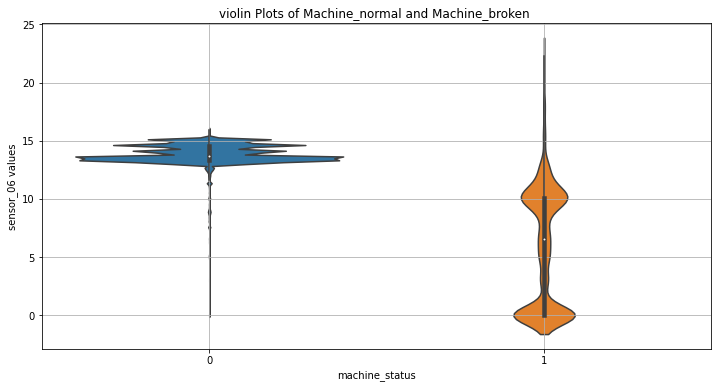

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


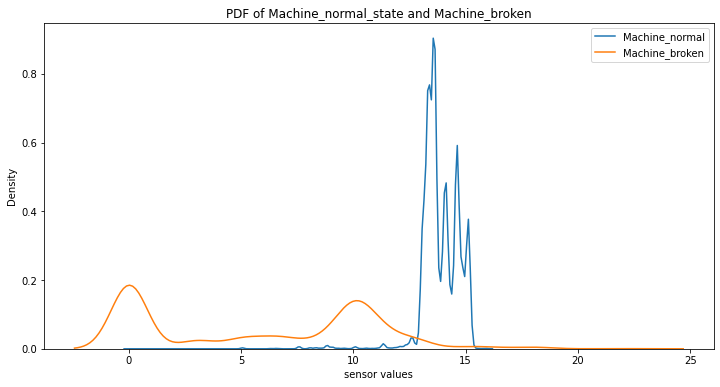

In [ ]:
print("violin plot and PDF Of sensor_06 feature")
Machine_normal= data[data['machine_status']==0]['sensor_06'].values
Machine_broken = data[data['machine_status']==1]['sensor_06'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_06', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_06') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_06 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_06 during the machine_normal state
0 percentile value is 0.01446759
5 percentile value is 13.057
10 percentile value is 13.14381
15 percentile value is 13.288479999999998
20 percentile value is 13.32465
25 percentile value is 13.38252
30 percentile value is 13.447629999999998
35 percentile value is 13.53443
40 percentile value is 13.592300000000002
45 percentile value is 13.628470000000002
50 percentile value is 13.67911
55 percentile value is 13.86719
60 percentile value is 14.0625
65 percentile value is 14.13484
70 percentile value is 14.32292
75 percentile value is 14.56887
80 percentile value is 14.60503
85 percentile value is 14.677370000000002
90 percentile value is 14.89439
95 percentile value is 15.0897
100 percentile value is 15.96499


In [ ]:
print('0-100 percentile values of sensor_06 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_06 during the machine_broken state
0 percentile value is 0.01446759
5 percentile value is 0.0144675923511386
10 percentile value is 0.02893518
15 percentile value is 0.028935184702277204
20 percentile value is 0.028935184702277197
25 percentile value is 0.0289351847022772
30 percentile value is 0.0289351847022772
35 percentile value is 0.028935184702277197
40 percentile value is 3.030961
45 percentile value is 5.063657
50 percentile value is 6.553819
55 percentile value is 7.5882520000000016
60 percentile value is 9.085648
65 percentile value is 10.06221
70 percentile value is 10.08391
75 percentile value is 10.09838
80 percentile value is 10.120080000000002
85 percentile value is 11.04601
90 percentile value is 11.32089
95 percentile value is 12.62297
100 percentile value is 22.25116


###observations of sensor_06

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_06 values are well saperated, also it is seen in the pdf plot that, the distributions of both the class points are well saperated. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_06 values lies in the range of (13.05, 15.96), then we can conclude that the machine is normal with 95 percent probability.
* if the sensor_06 values lies in the range of (0.01, 12.62), then we can conclude that the machine is broken with 95 percent probability.

Conclusion:
since the probability values are very high, sensor_06 is a  useful feature for classification


## Analysis of the feature 'sensor_41'





violin plot and PDF Of sensor_41 feature


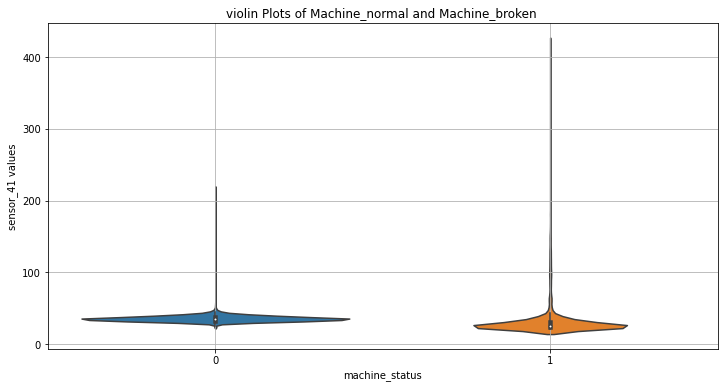

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


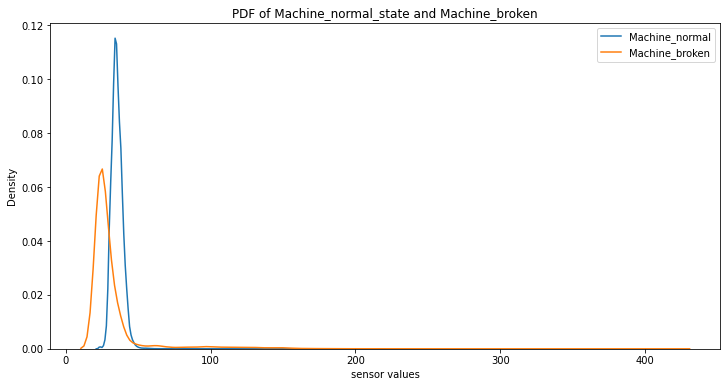

In [ ]:
print("violin plot and PDF Of sensor_41 feature")
Machine_normal= data[data['machine_status']==0]['sensor_41'].values
Machine_broken = data[data['machine_status']==1]['sensor_41'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_41', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_41') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_41 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_41 during the machine_normal state
0 percentile value is 22.39583
5 percentile value is 29.947920000000003
10 percentile value is 30.98958
15 percentile value is 31.51042
20 percentile value is 32.2916641235352
25 percentile value is 32.8125
30 percentile value is 33.59375
35 percentile value is 33.85416
40 percentile value is 34.1145820617676
45 percentile value is 34.89583
50 percentile value is 35.15625
55 percentile value is 35.416664123535206
60 percentile value is 36.19791
65 percentile value is 36.4583320617676
70 percentile value is 36.97916
75 percentile value is 37.76041
80 percentile value is 38.28125
85 percentile value is 39.32291
90 percentile value is 40.36458
95 percentile value is 41.92708
100 percentile value is 219.0104


In [ ]:
print('0-100 percentile values of sensor_41 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_41 during the machine_broken state
0 percentile value is 20.83333
5 percentile value is 21.09375
10 percentile value is 21.354166030883803
15 percentile value is 21.875
20 percentile value is 22.65625
25 percentile value is 23.4375
30 percentile value is 23.95833
35 percentile value is 24.4791660308838
40 percentile value is 24.739582061767607
45 percentile value is 25.0
50 percentile value is 25.7812480926514
55 percentile value is 26.302082061767607
60 percentile value is 27.6041660308838
65 percentile value is 28.385416030883803
70 percentile value is 29.6875
75 percentile value is 31.2499980926514
80 percentile value is 32.29166
85 percentile value is 36.45833
90 percentile value is 39.32291
95 percentile value is 72.18749399999923
100 percentile value is 420.3125


###observations of sensor_41

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_41 values are almost overlapping, also it is seen in the pdf plot that, the distributions are not well saperated. the exact numbers are shown by printing the percentiles.

Conclusion:
* Since there is a huge overlap in the machine_normal state and machine_broken state distributions of sensor_41 values, this feature is not useful for classification 


## Analysis of the feature 'sensor_07'





violin plot and PDF Of sensor_07 feature


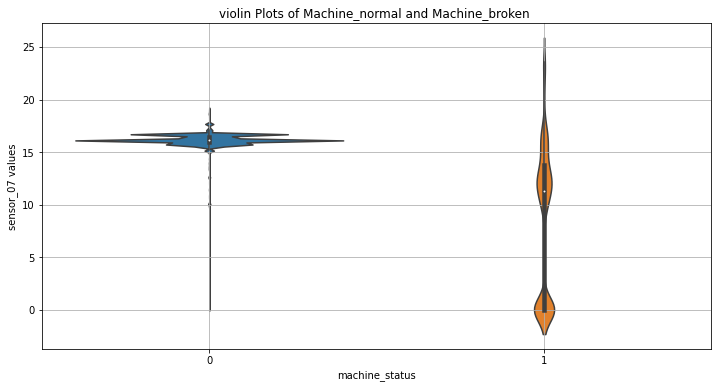

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


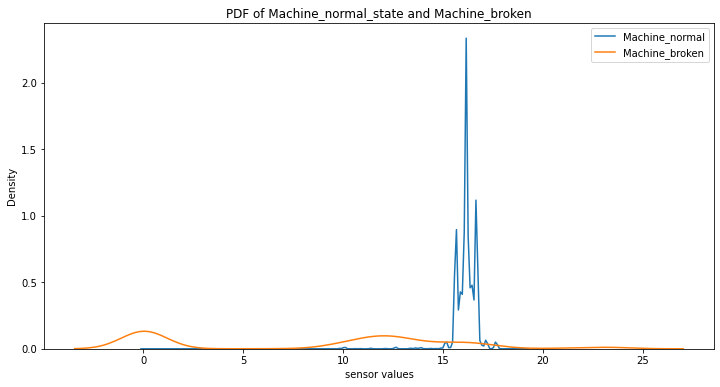

In [ ]:
print("violin plot and PDF Of sensor_07 feature")
Machine_normal= data[data['machine_status']==0]['sensor_07'].values
Machine_broken = data[data['machine_status']==1]['sensor_07'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_07', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_07') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_07 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_07 during the machine_normal state
0 percentile value is 0.02893518
5 percentile value is 15.625
10 percentile value is 15.661170000000002
15 percentile value is 15.668400000000002
20 percentile value is 15.85648
25 percentile value is 15.95052
30 percentile value is 16.0735
35 percentile value is 16.13136
40 percentile value is 16.13136
45 percentile value is 16.16753
50 percentile value is 16.16753
55 percentile value is 16.16753
60 percentile value is 16.21094
65 percentile value is 16.23987
70 percentile value is 16.391779999999994
75 percentile value is 16.42795
80 percentile value is 16.6088
85 percentile value is 16.6522
90 percentile value is 16.70284
95 percentile value is 16.70284
100 percentile value is 19.13339


In [ ]:
print('0-100 percentile values of sensor_07 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_07 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0361689813435078
10 percentile value is 0.0361689813435078
15 percentile value is 0.0361689813435078
20 percentile value is 0.0361689813435078
25 percentile value is 0.0361689813435078
30 percentile value is 0.0361689813435078
35 percentile value is 0.0361689813435078
40 percentile value is 9.85243
45 percentile value is 10.12731
50 percentile value is 11.34983
55 percentile value is 11.36429
60 percentile value is 12.57957
65 percentile value is 12.60127
70 percentile value is 12.62297
75 percentile value is 13.80932
80 percentile value is 15.08247
85 percentile value is 15.37905
90 percentile value is 16.42795
95 percentile value is 17.66493
100 percentile value is 23.59664


###observations of sensor_07

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_07 values are well saperated, also it is seen in the pdf plot that, both the distributions well saperated. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_07 values lies in the range of (16.13, 19.13), then we can conclude that the machine is normal with 65 percent probability.
* if the sensor_07 values lies in the range of (0.03, 15.37), then we can conclude that the machine is broken with 80 percent probability.

Conclusion:
since the probability values are high, sensor_07 is a  useful feature for classification


## Analysis of the feature 'sensor_09'




violin plot and PDF Of sensor_09 feature


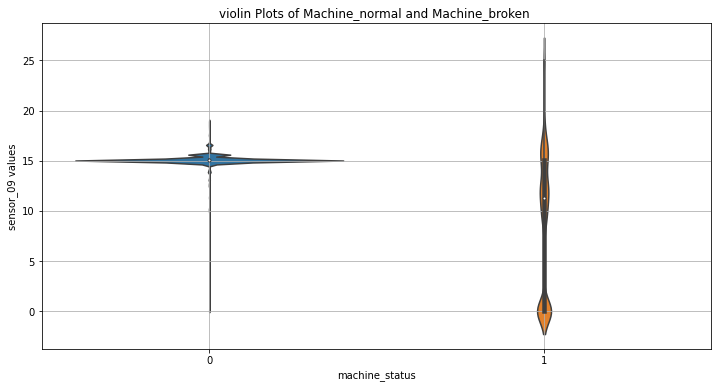

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


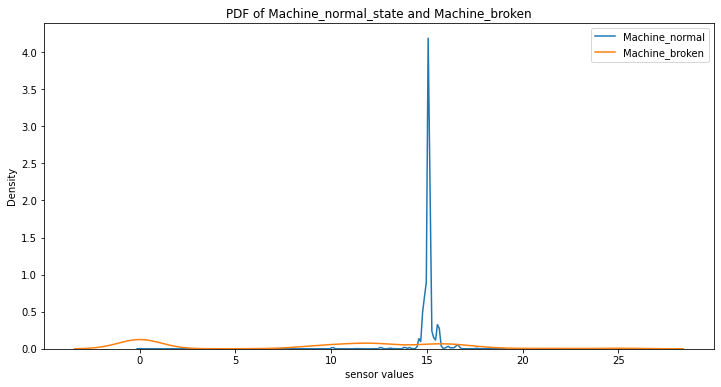

In [ ]:
print("violin plot and PDF Of sensor_09 feature")
Machine_normal= data[data['machine_status']==0]['sensor_09'].values
Machine_broken = data[data['machine_status']==1]['sensor_09'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_09', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_09') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_09 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_09 during the machine_normal state
0 percentile value is 0.007233796
5 percentile value is 14.79311
10 percentile value is 14.82205
15 percentile value is 14.901619999999998
20 percentile value is 15.010129999999998
25 percentile value is 15.05353
30 percentile value is 15.053530000000002
35 percentile value is 15.05353
40 percentile value is 15.08247
45 percentile value is 15.08247
50 percentile value is 15.08247
55 percentile value is 15.08247
60 percentile value is 15.0897
65 percentile value is 15.11863
70 percentile value is 15.11863
75 percentile value is 15.11863
80 percentile value is 15.16204
85 percentile value is 15.162040000000001
90 percentile value is 15.38628
95 percentile value is 15.59606
100 percentile value is 18.98871


In [ ]:
print('0-100 percentile values of sensor_09 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_09 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0072337961755693
10 percentile value is 0.0072337961755693
15 percentile value is 0.007233796175569299
20 percentile value is 0.007233796175569299
25 percentile value is 0.0072337961755693
30 percentile value is 0.007233796175569299
35 percentile value is 0.0072337961755693
40 percentile value is 8.839699000000003
45 percentile value is 10.09115
50 percentile value is 11.29196
55 percentile value is 11.53067
60 percentile value is 12.33362
65 percentile value is 12.58681
70 percentile value is 12.643227999999993
75 percentile value is 15.05353
80 percentile value is 15.11863
85 percentile value is 16.0952
90 percentile value is 16.39902
95 percentile value is 17.65046
100 percentile value is 25.0


###observations of sensor_09

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_09 values are partially well saperated, also it is seen in the pdf plot that, during the machine is operating in the normal condition, sensor_09 values variance is very less and during the machine broken state, sensor_09 values variance is very high. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_09 values lies in the range of (14.79, 15.59), then we can conclude that the machine is normal with 90 percent probability.
* if the sensor_09 values lies in the range of (0.00, 12.64), then we can conclude that the machine is broken with 70 percent probability.

Conclusion:
since the probability values are high, sensor_09 is a  useful feature for classification


## Analysis of the feature 'sensor_08'




violin plot and PDF Of sensor_08 feature


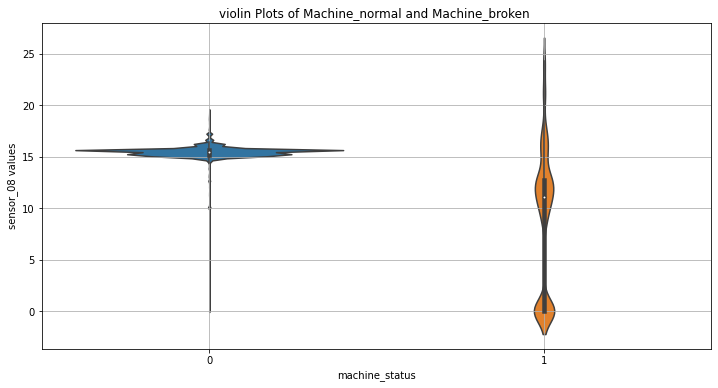

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


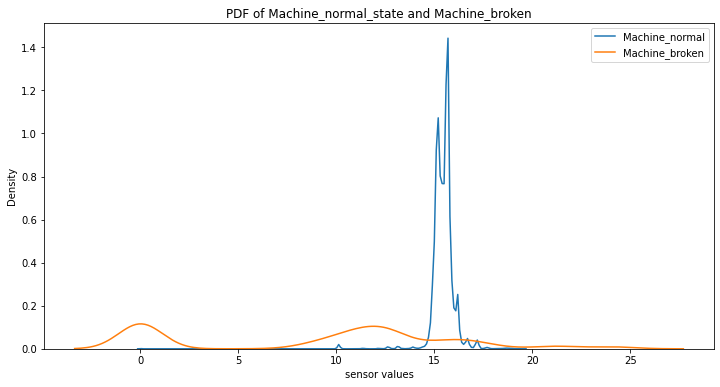

In [ ]:
print("violin plot and PDF Of sensor_08 feature")
Machine_normal= data[data['machine_status']==0]['sensor_08'].values
Machine_broken = data[data['machine_status']==1]['sensor_08'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_08', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_08') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_08 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_08 during the machine_normal state
0 percentile value is 0.02893518
5 percentile value is 14.91609
10 percentile value is 15.03906
15 percentile value is 15.11863
20 percentile value is 15.147570000000002
25 percentile value is 15.18374
30 percentile value is 15.26331
35 percentile value is 15.29224
40 percentile value is 15.37182
45 percentile value is 15.45139
50 percentile value is 15.49479
55 percentile value is 15.56713
60 percentile value is 15.617770000000004
65 percentile value is 15.653930000000003
70 percentile value is 15.69734
75 percentile value is 15.69734
80 percentile value is 15.73351
85 percentile value is 15.81308
90 percentile value is 15.94329
95 percentile value is 16.19647
100 percentile value is 19.53848


In [ ]:
print('0-100 percentile values of sensor_08 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_08 during the machine_broken state
0 percentile value is 0.02893518
5 percentile value is 0.0289351847022772
10 percentile value is 0.0289351847022772
15 percentile value is 0.0289351847022772
20 percentile value is 0.0289351847022772
25 percentile value is 0.0289351847022772
30 percentile value is 0.0289351847022772
35 percentile value is 8.890335
40 percentile value is 10.12008
45 percentile value is 11.04601
50 percentile value is 11.14005
55 percentile value is 11.40046
60 percentile value is 12.51447
65 percentile value is 12.61574
70 percentile value is 12.66638
75 percentile value is 12.74595
80 percentile value is 15.147570000000002
85 percentile value is 16.38455
90 percentile value is 16.74624
95 percentile value is 21.12268
100 percentile value is 24.34896


###observations of sensor_08

* From the above box plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_08 values well saperated, also it is seen in the pdf plot that, during the machine is operating in the normal condition, sensor_08 values variance is very less and during the machine broken state, sensor_08 values variance is very high. the exact numbers are shown by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_08 values lies in the range of (14.91, 19.53), then we can conclude that the machine is normal with 95 percent probability.
* if the sensor_08 values lies in the range of (0.02, 12.74), then we can conclude that the machine is broken with 75 percent probability.

Conclusion:
* Since the probability values are high, this feature is very useful for classification 


## Analysis of the feature 'sensor_05'





violin plot and PDF Of sensor_05 feature


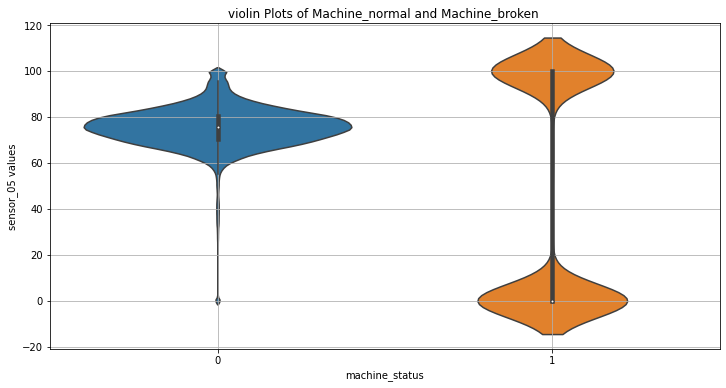

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


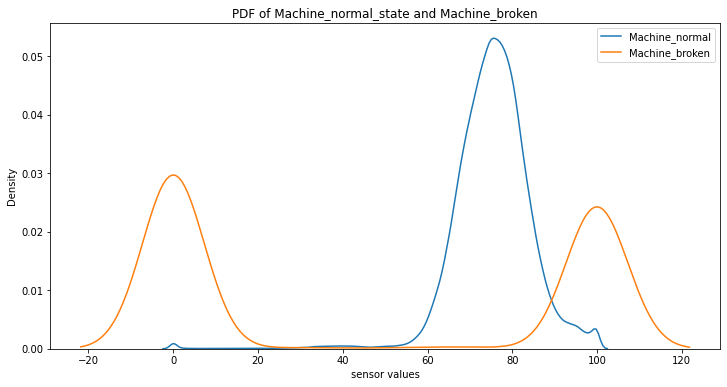

In [ ]:
print("violin plot and PDF Of sensor_05 feature")
Machine_normal= data[data['machine_status']==0]['sensor_05'].values
Machine_broken = data[data['machine_status']==1]['sensor_05'].values

plt.figure(figsize=(12, 6))
sns.violinplot(x='machine_status',y='sensor_05', data=data)
plt.title('violin Plots of Machine_normal and Machine_broken ')
#plt.xticks([1,2],('Machine_normal','Machine_will_fails_in_next_48hrs'))
temp=str('sensor_05') + str(' ')+str('values')
plt.ylabel(temp)
#plt.ylabel('sensor values')
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal")
sns.distplot(Machine_broken, hist=False, label="Machine_broken")
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values')
plt.legend()
plt.show()

In [ ]:
print('0-100 percentile values of sensor_05 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i))

0-100 percentile values of sensor_05 during the machine_normal state
0 percentile value is 0.0
5 percentile value is 62.9656435
10 percentile value is 65.944957
15 percentile value is 67.7776605
20 percentile value is 69.230364
25 percentile value is 70.50115749999999
30 percentile value is 71.66926099999998
35 percentile value is 72.739212
40 percentile value is 73.75045800000001
45 percentile value is 74.7078105
50 percentile value is 75.648
55 percentile value is 76.5904665
60 percentile value is 77.534328
65 percentile value is 78.51522299999999
70 percentile value is 79.52134799999999
75 percentile value is 80.60280250000001
80 percentile value is 81.82460999999998
85 percentile value is 83.32831
90 percentile value is 85.37124299999998
95 percentile value is 89.05558850000003
100 percentile value is 99.99988


In [ ]:
print('0-100 percentile values of sensor_05 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))]
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i))

0-100 percentile values of sensor_05 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0
10 percentile value is 0.0
15 percentile value is 0.0
20 percentile value is 0.0
25 percentile value is 0.0
30 percentile value is 0.0
35 percentile value is 0.0
40 percentile value is 0.0
45 percentile value is 0.0
50 percentile value is 0.0
55 percentile value is 58.39643900000028
60 percentile value is 99.9998779296875
65 percentile value is 99.9998779296875
70 percentile value is 99.9998779296875
75 percentile value is 99.9998779296875
80 percentile value is 99.9998779296875
85 percentile value is 99.9998779296875
90 percentile value is 99.9998779296875
95 percentile value is 99.9998779296875
100 percentile value is 99.99988


###observations of sensor_05

* From the above box plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_05 values are not well saperated, also it is seen in the pdf plot that, both the distributions are overlapping. the exact numbers are obtained by printing the percentiles.

Conclusion:
* since there is a huge overlap in both the distributions, this feature is not very useful for classification 


## Scatter plots

In [ ]:
imp_feature_pairs=data.corr().abs()
imp_feature_pairs.drop(imp_feature_pairs.tail(1).index, inplace = True)
imp_feature_pairs.drop('machine_status',axis=1,inplace=True)

In [ ]:
print(imp_feature_pairs.head())

           sensor_00  sensor_01  sensor_02  ...  sensor_49  sensor_50  sensor_51
sensor_00   1.000000   0.338561   0.641822  ...   0.163604   0.667737   0.427118
sensor_01   0.338561   1.000000   0.737403  ...   0.373514   0.622531   0.166365
sensor_02   0.641822   0.737403   1.000000  ...   0.339665   0.749069   0.089978
sensor_03   0.388877   0.693155   0.822339  ...   0.374166   0.618857   0.157912
sensor_04   0.942803   0.677455   0.820339  ...   0.295388   0.773714   0.085853

[5 rows x 51 columns]


### storing (row,column, correlation between row and column) in a single list 

In [ ]:
lst=[]
for row in imp_feature_pairs.index:
    for column in imp_feature_pairs:
        lst.append([row,column,imp_feature_pairs.loc[row][column]])
    

### Sorting the above list in the increasing order of the correlation values between features

In [ ]:
sorted_list=sorted(lst,key=lambda x:x[2])

In [ ]:
sorted_list[0:20] #printing the top 20 values of the sorted list

[['sensor_04', 'sensor_42', 3.488021662890639e-05],
 ['sensor_42', 'sensor_04', 3.488021662890639e-05],
 ['sensor_31', 'sensor_46', 0.0003311348188624738],
 ['sensor_46', 'sensor_31', 0.0003311348188624738],
 ['sensor_07', 'sensor_27', 0.00046348004991069635],
 ['sensor_27', 'sensor_07', 0.00046348004991069635],
 ['sensor_07', 'sensor_26', 0.000698852398590193],
 ['sensor_26', 'sensor_07', 0.000698852398590193],
 ['sensor_08', 'sensor_39', 0.00073504410269746],
 ['sensor_39', 'sensor_08', 0.00073504410269746],
 ['sensor_04', 'sensor_39', 0.0012965683877157153],
 ['sensor_39', 'sensor_04', 0.0012965683877157153],
 ['sensor_08', 'sensor_23', 0.0014594324970109876],
 ['sensor_23', 'sensor_08', 0.0014594324970109876],
 ['sensor_10', 'sensor_51', 0.001674295114966854],
 ['sensor_51', 'sensor_10', 0.001674295114966854],
 ['sensor_22', 'sensor_42', 0.0016865375439100365],
 ['sensor_42', 'sensor_22', 0.0016865375439100365],
 ['sensor_30', 'sensor_39', 0.0018770120091028712],
 ['sensor_39', 'se

## scatter plot of 'sensor_04' and 'sensor_42'

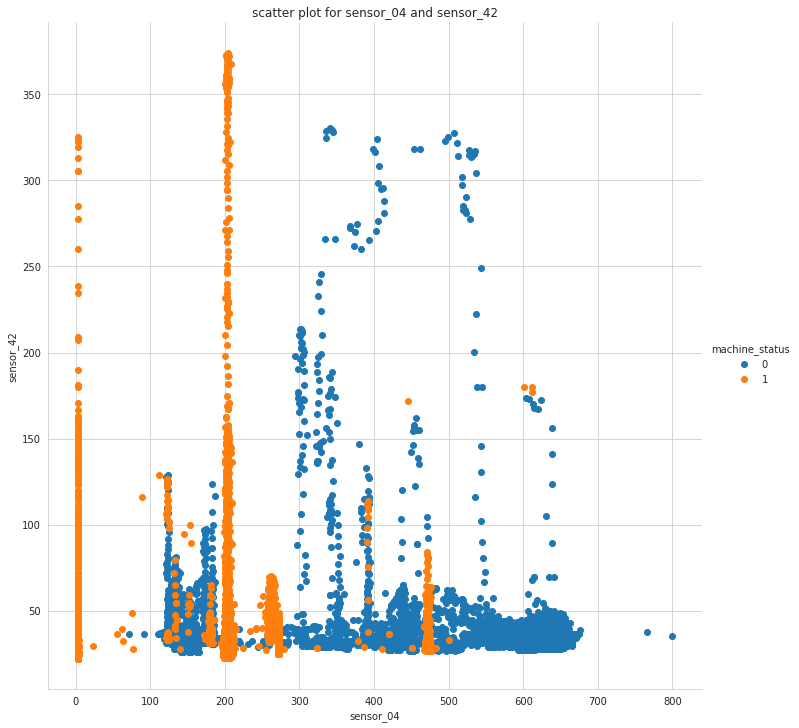

In [ ]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_04", "sensor_42") \
   .add_legend();
plt.title("scatter plot for sensor_04 and sensor_42")
plt.show();

### Observations from scatter plot of sensor_04 Vs sensor_42

* From the Scatter plots, we are observing both the class points are almost overlapping, so unable to classify using only this scatter plot

## scatter plot of 'sensor_31' and 'sensor_46'

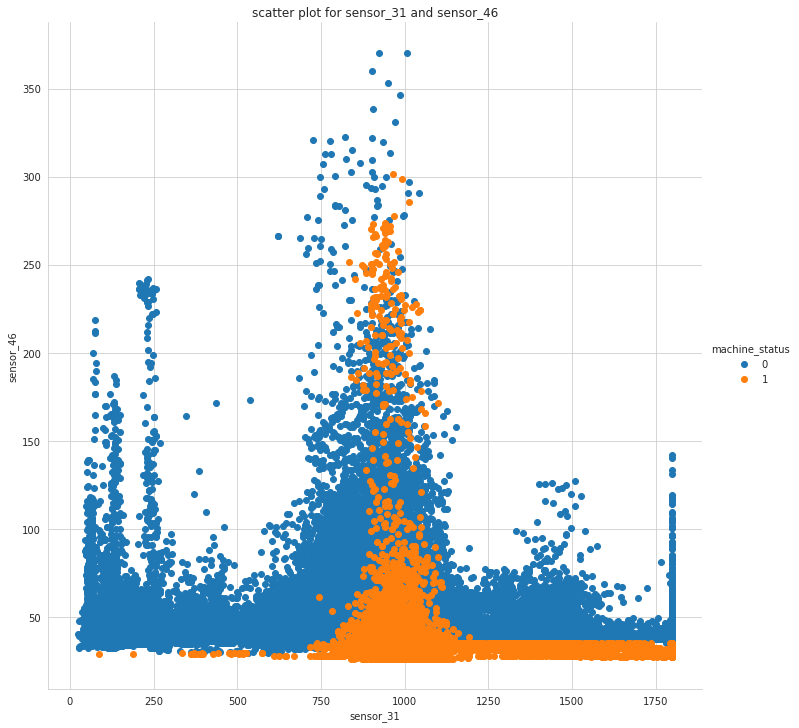

In [ ]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_31", "sensor_46") \
   .add_legend();
plt.title("scatter plot for sensor_31 and sensor_46")
plt.show();

### Observations from scatter plot of sensor_31 Vs sensor_46

* From the above Scatter plots, we are observing both the class points are overlapping, so unable to classify using this scatter plot

## scatter plot of 'sensor_07' and 'sensor_27'

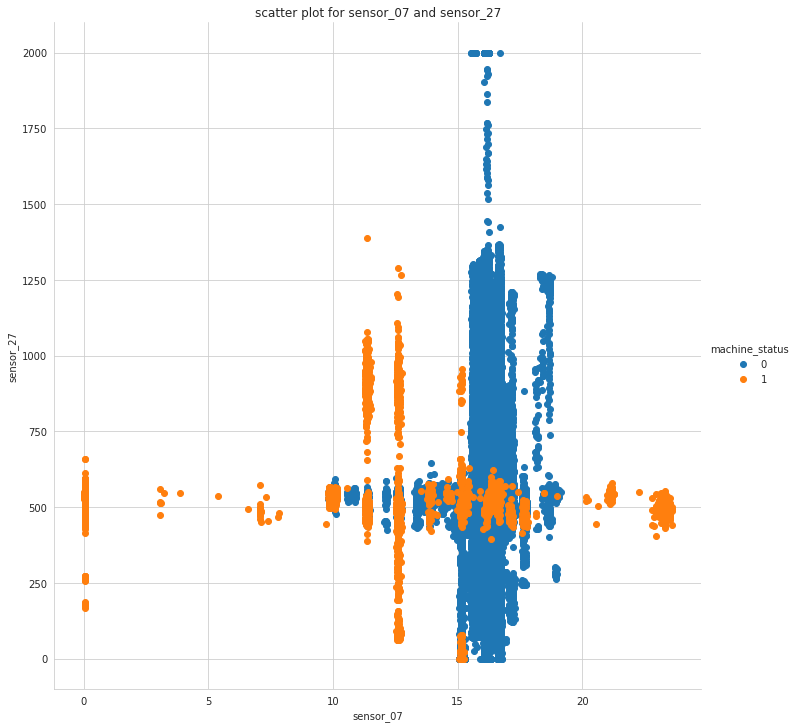

In [ ]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_07", "sensor_27") \
   .add_legend();
plt.title("scatter plot for sensor_07 and sensor_27")
plt.show();

### Observations from scatter plot of sensor_07 Vs sensor_27

* From the above Scatter plots, we are observing most of  the class points are overlapping, so unable to classify using the above scatter plot

## scatter plot of 'sensor_07' and 'sensor_26'

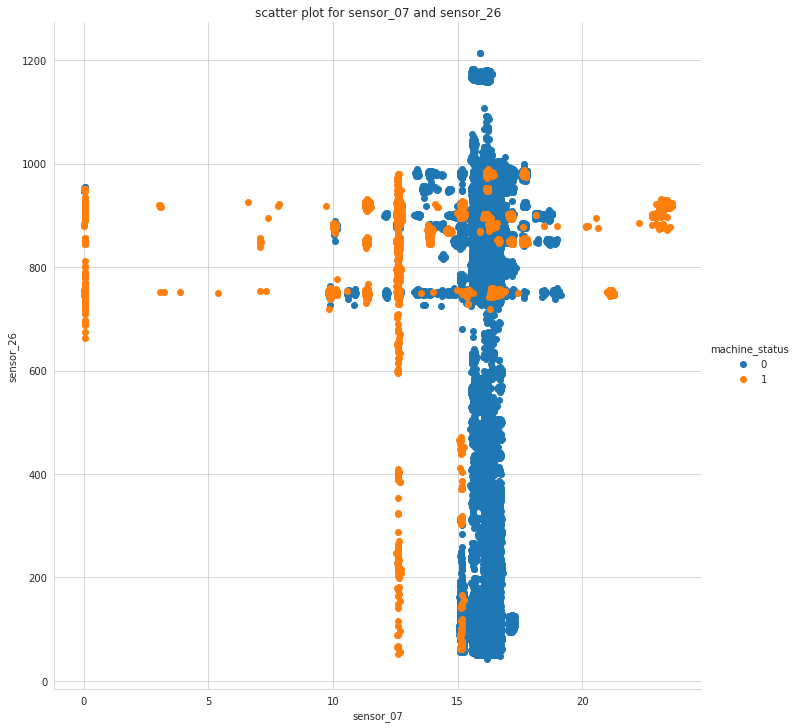

In [ ]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_07", "sensor_26") \
   .add_legend();
plt.title("scatter plot for sensor_07 and sensor_26")
plt.show();

### Observations from scatter plot of sensor_07 Vs sensor_26

* From the Scatter plots, we are observing both the class points are almost not overlapping, so this pair plot is useful to classify using scatter plot

## scatter plot of 'sensor_08' and 'sensor_39'

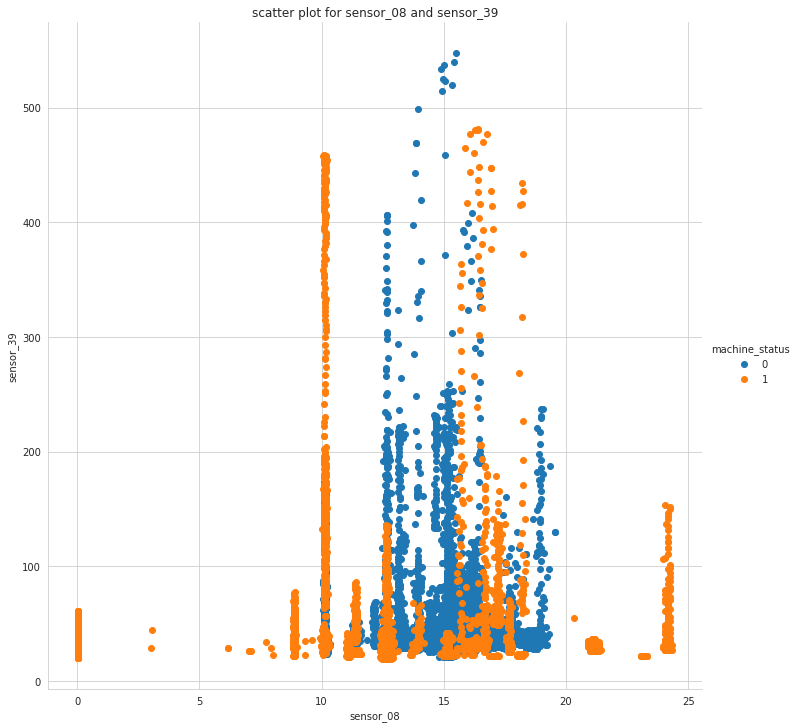

In [ ]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_08", "sensor_39") \
   .add_legend();
plt.title("scatter plot for sensor_08 and sensor_39")
plt.show();

### Observations from scatter plot of sensor_08 Vs sensor_39

* From the Scatter plots, we are observing both the class points are almost not overlapping, so this pair plot is useful to classify using scatter plot

## Normalising the features

In [ ]:
# Min Max normalization
for i in data.columns:
    if i != 'machine_status':
        data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())
        

In [ ]:
print(data.columns)

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status'],
      dtype='object')


## Filling the missing values with the median values of that column with same class label

In [ ]:
# https://stackoverflow.com/questions/18265930/pandas-filling-missing-values-within-a-group
for column in data.columns:
  if column != 'machine_status':
      data[column] = data[column].fillna(data.groupby('machine_status')[column].transform('median')) 

# Machine Learning models

## Utility function to plot confusion matrix

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing A in heatmap format
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [ ]:
Y_60 = data['machine_status'].values.copy()
Y_120 = data['machine_status'].values.copy()
Y_180 = data['machine_status'].values.copy()
Y_240 = data['machine_status'].values.copy()


for i,ele in enumerate(Y_60):
    if ele == 1:
        if i >= 60:
            Y_60[i-60 : i] = 1
        else:
            Y_60[0 : i] = 1

for i,ele in enumerate(Y_120):
    if ele == 1:
        if i >= 120:
            Y_120[i-120 : i]=1
        else:
            Y_120[0 : i] = 1

for i,ele in enumerate(Y_180):
    if ele == 1:
        if i >= 180:
            Y_180[i-180 : i]=1
        else:
            Y_180[0 : i] = 1
            
for i,ele in enumerate(Y_240):
    if ele == 1:
        if i >= 240:
            Y_240[i-240 : i]=1
        else:
            Y_240[0 : i] = 1

In [ ]:
X=data.drop('machine_status',axis=1)

In [ ]:
X_train_60, X_test_60, Y_train_60, Y_test_60 = train_test_split(X, Y_60, test_size=0.30, stratify=Y_60, random_state=42)
X_train_60, X_cv_60, Y_train_60, Y_cv_60 = train_test_split(X_train_60, Y_train_60, test_size=0.30, stratify=Y_train_60, random_state=42)
X_train_120, X_test_120, Y_train_120, Y_test_120 = train_test_split(X, Y_120, test_size=0.30, stratify=Y_120, random_state=42)
X_train_120, X_cv_120, Y_train_120, Y_cv_120 = train_test_split(X_train_120, Y_train_120, test_size=0.30, stratify=Y_train_120,random_state=42)
X_train_180, X_test_180, Y_train_180, Y_test_180 = train_test_split(X, Y_180, test_size=0.30, stratify=Y_180,random_state=42)
X_train_180, X_cv_180, Y_train_180, Y_cv_180 = train_test_split(X_train_180, Y_train_180, test_size=0.30, stratify=Y_train_180,random_state=42)
X_train_240, X_test_240, Y_train_240, Y_test_240 = train_test_split(X, Y_240, test_size=0.30, stratify=Y_240,random_state=42)
X_train_240, X_cv_240, Y_train_240, Y_cv_240 = train_test_split(X_train_240, Y_train_240, test_size=0.30, stratify=Y_train_240,random_state=42)

In [ ]:
from tqdm import tqdm
X_train=[X_train_60,X_train_120,X_train_180,X_train_240]
Y_train=[Y_train_60,Y_train_120,Y_train_180,Y_train_240]
X_cv=[X_cv_60,X_cv_120,X_cv_180,X_cv_240]
Y_cv=[Y_cv_60,Y_cv_120,Y_cv_180,Y_cv_240]
X_test=[X_test_60,X_test_120,X_test_180,X_test_240]
Y_test=[Y_test_60,Y_test_120,Y_test_180,Y_test_240]

m=[60,120,180,240]
y=[Y_60,Y_120,Y_180,Y_240]

## RBF Kernel SVM

  0%|          | 0/6 [00:00<?, ?it/s]

cv Log Loss for m=60 and alpha=0.001 is 0.03192098972054231:
train Log Loss for m=60 and alpha=0.001 is 0.03161571939465185:
-------------------- Confusion matrix --------------------


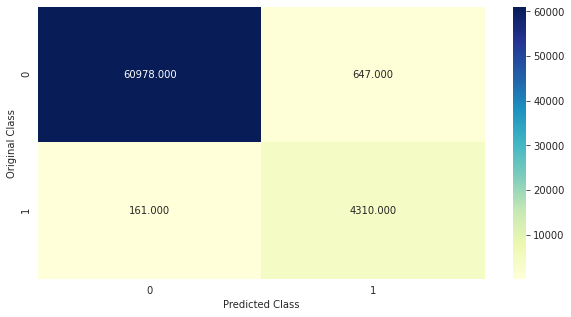

-------------------- Precision matrix (Columm Sum=1) --------------------


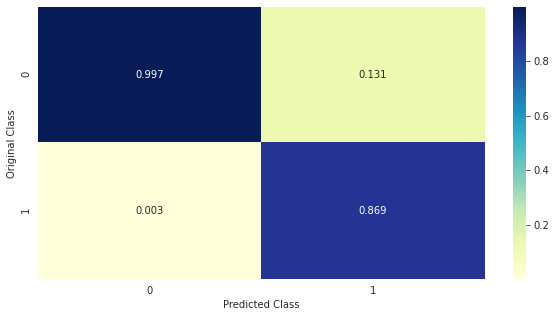

-------------------- Recall matrix (Row sum=1) --------------------


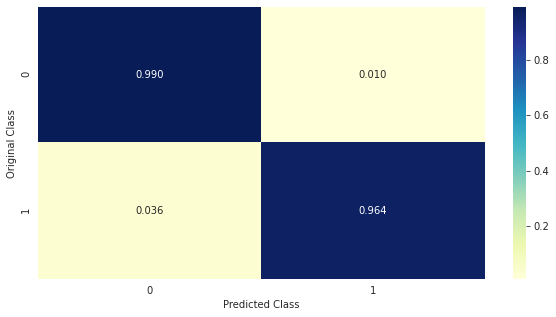

 17%|█▋        | 1/6 [21:32<1:47:40, 1292.19s/it]

macro average f1 score for m=60 and alpha=0.001 is 0.9538580510868273
cv Log Loss for m=60 and alpha=0.01 is 0.026981020003404646:
train Log Loss for m=60 and alpha=0.01 is 0.025665559524073376:
-------------------- Confusion matrix --------------------


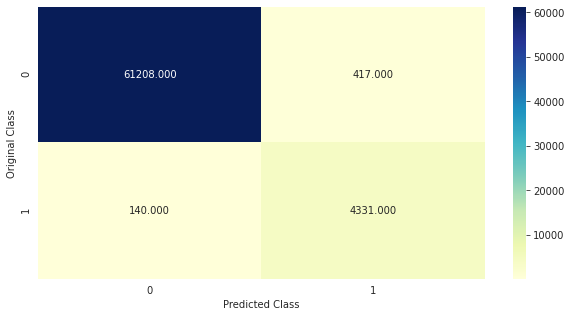

-------------------- Precision matrix (Columm Sum=1) --------------------


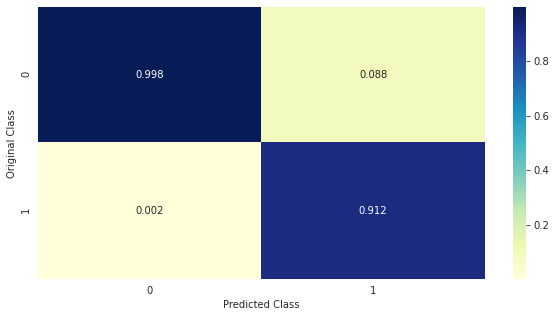

-------------------- Recall matrix (Row sum=1) --------------------


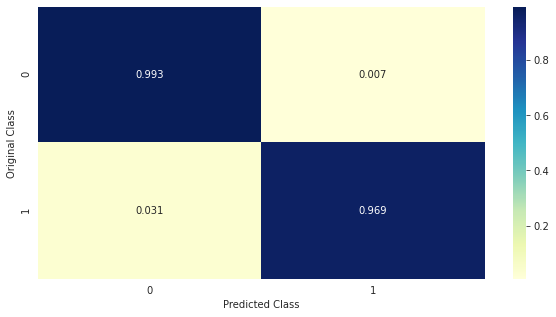

 33%|███▎      | 2/6 [30:42<1:11:18, 1069.65s/it]

macro average f1 score for m=60 and alpha=0.01 is 0.9675259249681081
cv Log Loss for m=60 and alpha=0.1 is 0.018911609412018963:
train Log Loss for m=60 and alpha=0.1 is 0.017515823420036974:
-------------------- Confusion matrix --------------------


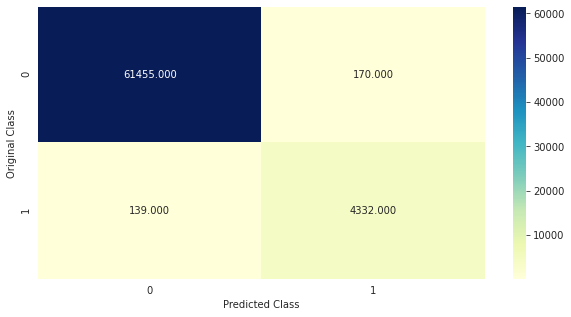

-------------------- Precision matrix (Columm Sum=1) --------------------


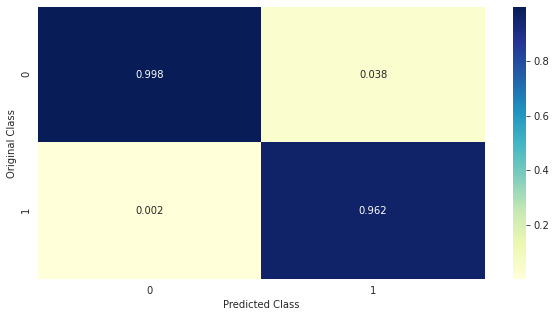

-------------------- Recall matrix (Row sum=1) --------------------


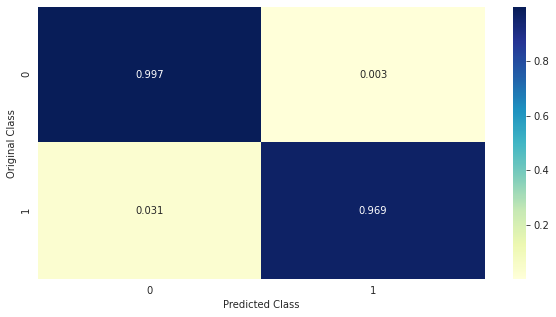

 50%|█████     | 3/6 [35:53<42:06, 842.06s/it]   

macro average f1 score for m=60 and alpha=0.1 is 0.9815278132989282
cv Log Loss for m=60 and alpha=1 is 0.013374591619988298:
train Log Loss for m=60 and alpha=1 is 0.01199046484128092:
-------------------- Confusion matrix --------------------


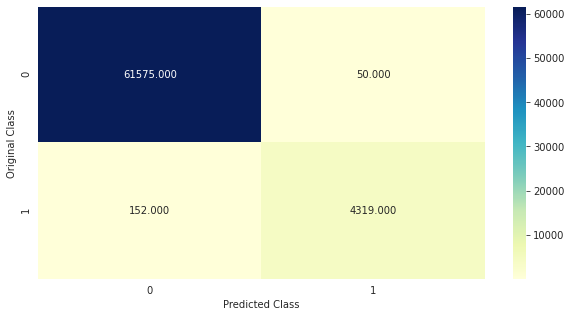

-------------------- Precision matrix (Columm Sum=1) --------------------


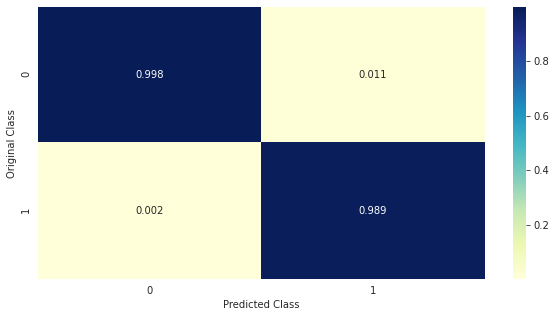

-------------------- Recall matrix (Row sum=1) --------------------


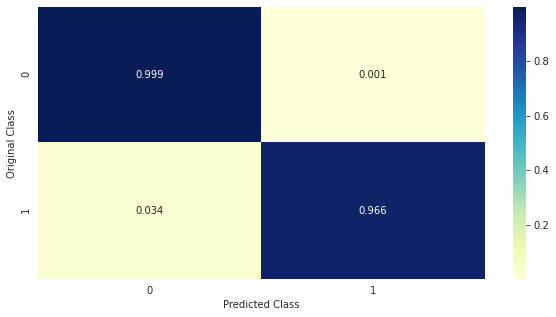

 67%|██████▋   | 4/6 [38:54<21:27, 643.82s/it]

macro average f1 score for m=60 and alpha=1 is 0.987755865640294
cv Log Loss for m=60 and alpha=10 is 0.009508366349717391:
train Log Loss for m=60 and alpha=10 is 0.007470514087246627:
-------------------- Confusion matrix --------------------


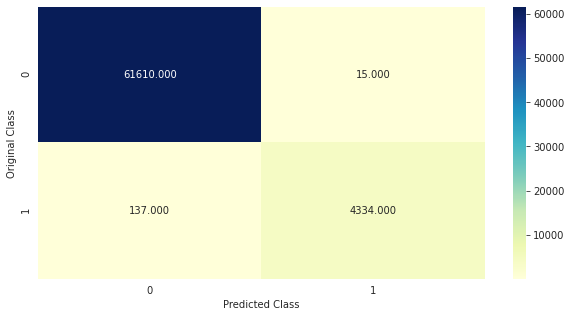

-------------------- Precision matrix (Columm Sum=1) --------------------


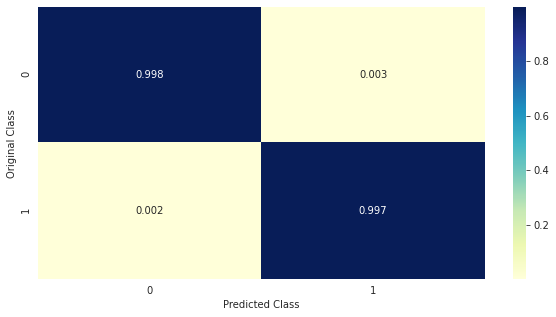

-------------------- Recall matrix (Row sum=1) --------------------


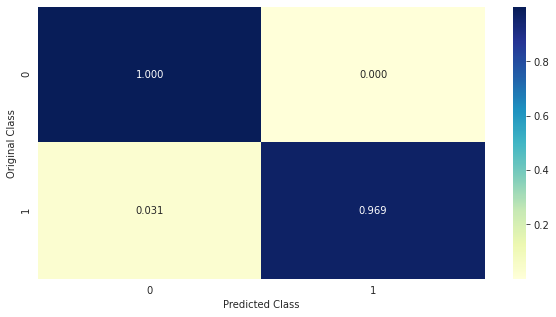

 83%|████████▎ | 5/6 [40:47<08:04, 484.34s/it]

macro average f1 score for m=60 and alpha=10 is 0.990767196869994
cv Log Loss for m=60 and alpha=100 is 0.003371356115912844:
train Log Loss for m=60 and alpha=100 is 0.0020725555839912367:
-------------------- Confusion matrix --------------------


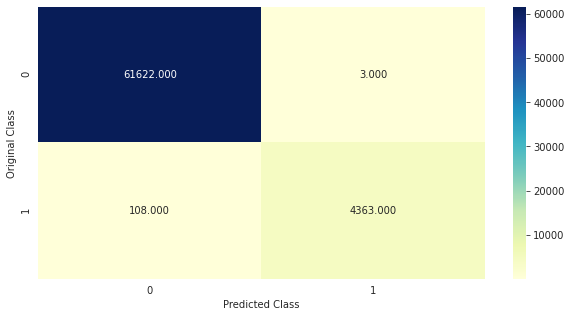

-------------------- Precision matrix (Columm Sum=1) --------------------


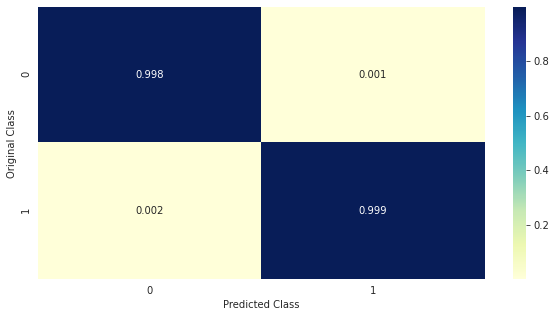

-------------------- Recall matrix (Row sum=1) --------------------


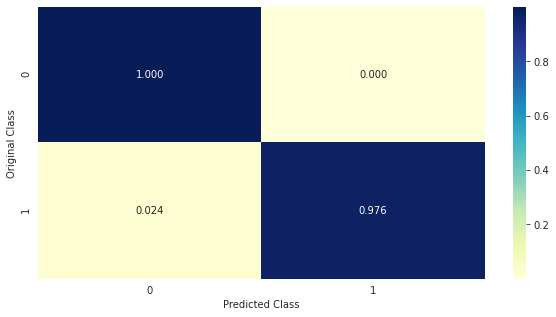

100%|██████████| 6/6 [42:17<00:00, 422.97s/it]

macro average f1 score for m=60 and alpha=100 is 0.9932696671356762


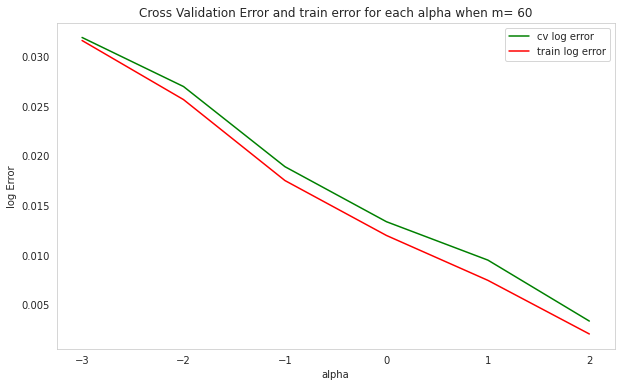

  0%|          | 0/6 [00:00<?, ?it/s]

cv Log Loss for m=120 and alpha=0.001 is 0.044522407107193:
train Log Loss for m=120 and alpha=0.001 is 0.04340147747083966:
-------------------- Confusion matrix --------------------


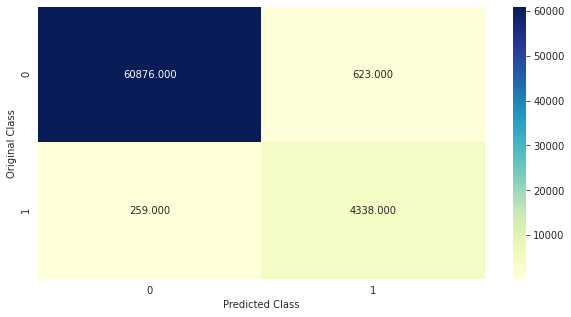

-------------------- Precision matrix (Columm Sum=1) --------------------


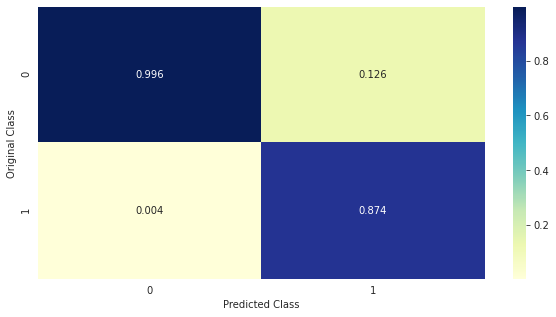

-------------------- Recall matrix (Row sum=1) --------------------


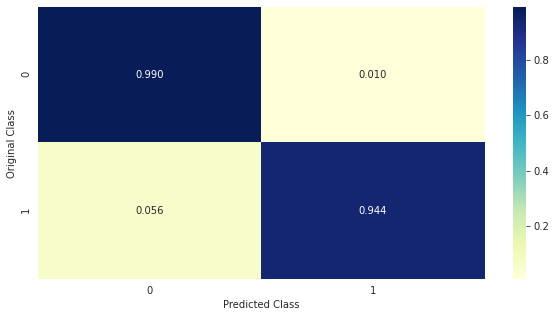

 17%|█▋        | 1/6 [22:57<1:54:47, 1377.44s/it]

macro average f1 score for m=120 and alpha=0.001 is 0.9502645739575638
cv Log Loss for m=120 and alpha=0.01 is 0.03813626537560592:
train Log Loss for m=120 and alpha=0.01 is 0.037256272142748716:
-------------------- Confusion matrix --------------------


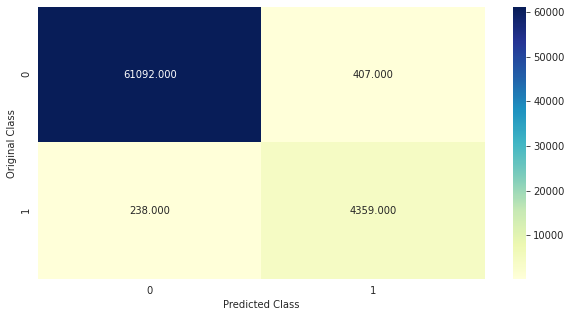

-------------------- Precision matrix (Columm Sum=1) --------------------


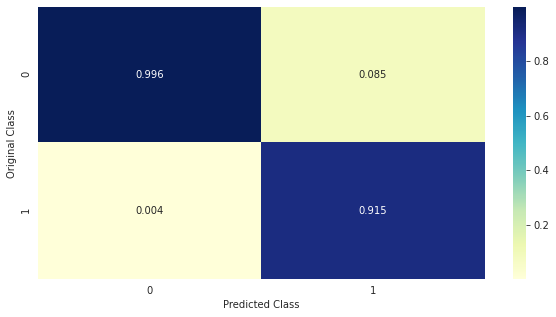

-------------------- Recall matrix (Row sum=1) --------------------


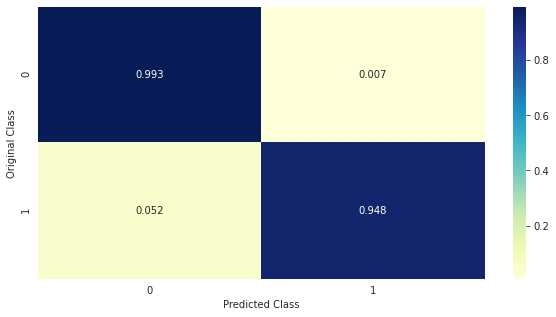

 33%|███▎      | 2/6 [1:00:06<1:48:51, 1632.88s/it]

macro average f1 score for m=120 and alpha=0.01 is 0.9629303101208929
cv Log Loss for m=120 and alpha=0.1 is 0.028884320671427533:
train Log Loss for m=120 and alpha=0.1 is 0.028528990392012978:
-------------------- Confusion matrix --------------------


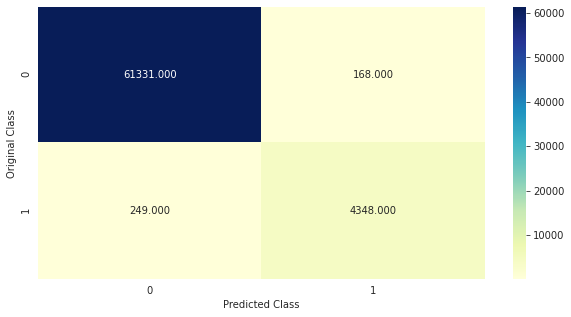

-------------------- Precision matrix (Columm Sum=1) --------------------


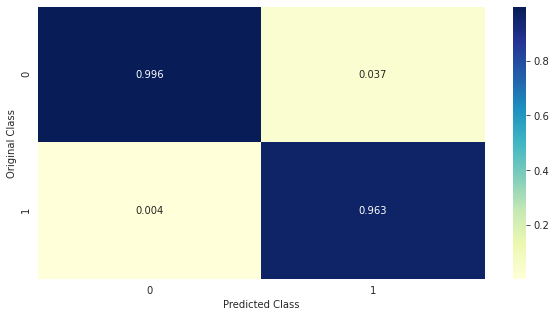

-------------------- Recall matrix (Row sum=1) --------------------


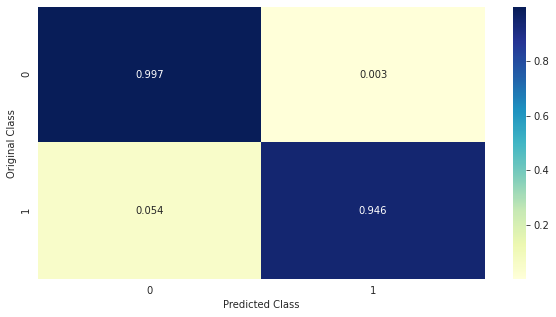

 50%|█████     | 3/6 [1:31:53<1:25:45, 1715.26s/it]

macro average f1 score for m=120 and alpha=0.1 is 0.9754265630362352
cv Log Loss for m=120 and alpha=1 is 0.021893992700894295:
train Log Loss for m=120 and alpha=1 is 0.0214502220321296:
-------------------- Confusion matrix --------------------


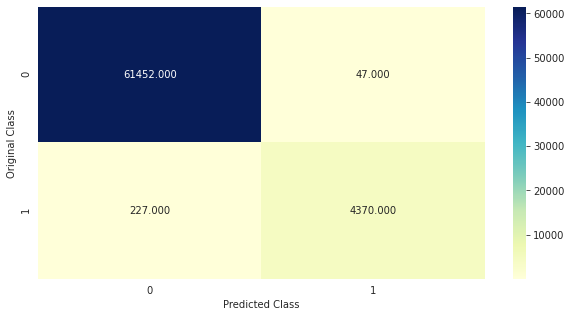

-------------------- Precision matrix (Columm Sum=1) --------------------


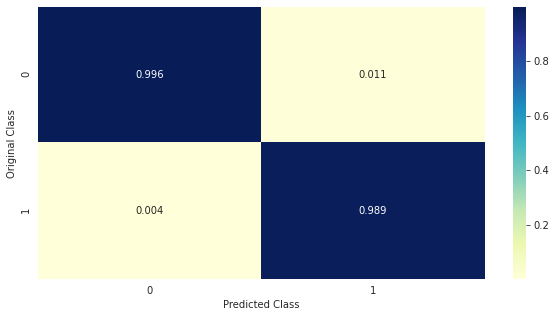

-------------------- Recall matrix (Row sum=1) --------------------


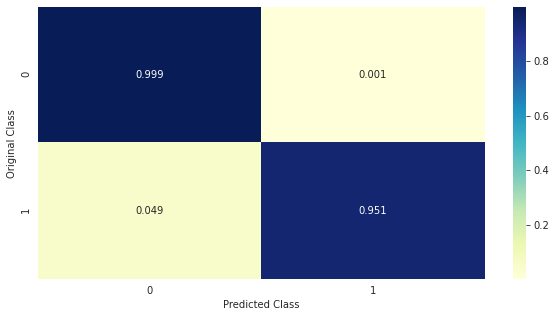

 67%|██████▋   | 4/6 [1:39:57<44:51, 1345.66s/it]  

macro average f1 score for m=120 and alpha=1 is 0.9836892084170861
cv Log Loss for m=120 and alpha=10 is 0.0158531551287102:
train Log Loss for m=120 and alpha=10 is 0.013943176017288684:
-------------------- Confusion matrix --------------------


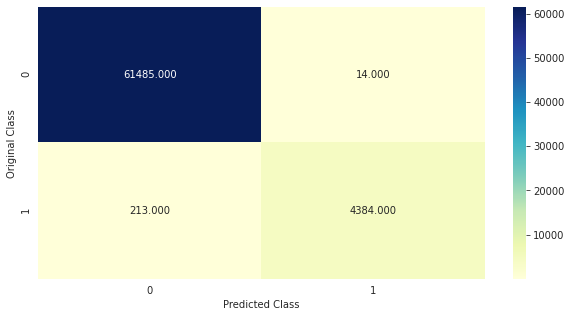

-------------------- Precision matrix (Columm Sum=1) --------------------


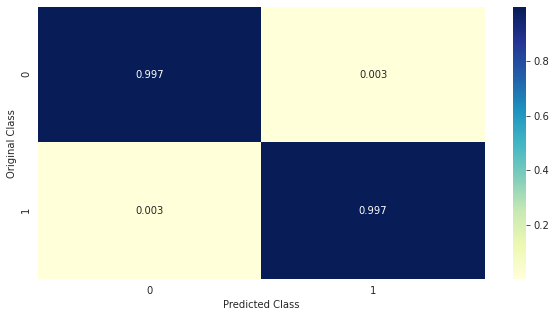

-------------------- Recall matrix (Row sum=1) --------------------


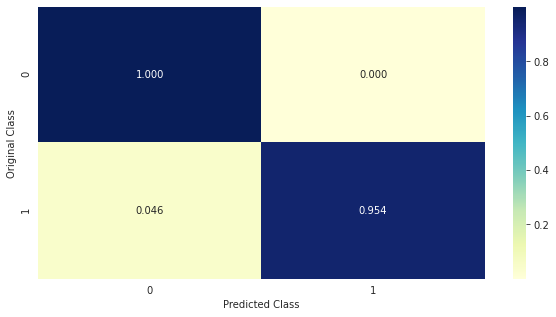

 83%|████████▎ | 5/6 [1:43:04<16:38, 998.11s/it] 

macro average f1 score for m=120 and alpha=10 is 0.9864605901538239
cv Log Loss for m=120 and alpha=100 is 0.005388561303265887:
train Log Loss for m=120 and alpha=100 is 0.0045592166997669645:
-------------------- Confusion matrix --------------------


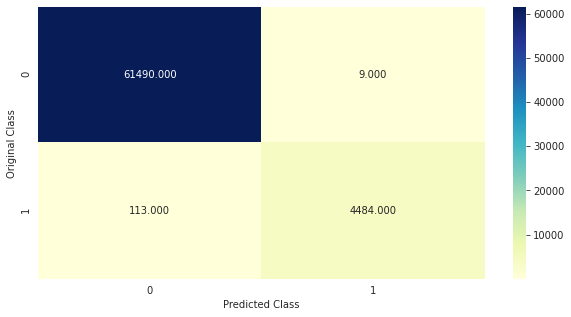

-------------------- Precision matrix (Columm Sum=1) --------------------


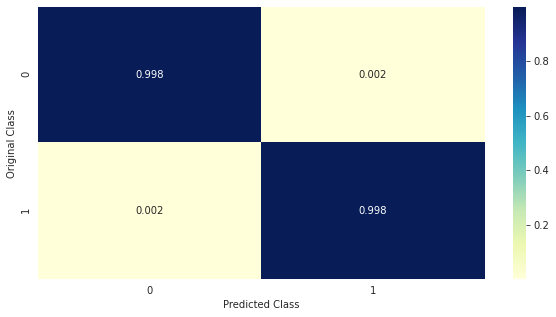

-------------------- Recall matrix (Row sum=1) --------------------


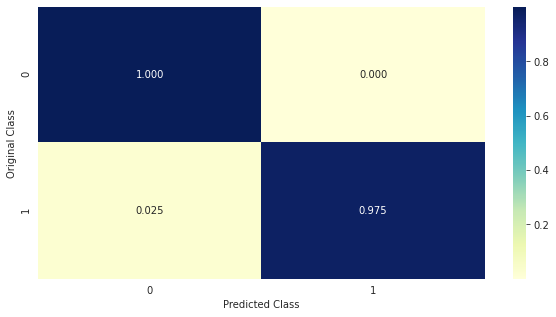

100%|██████████| 6/6 [1:45:40<00:00, 1056.83s/it]

macro average f1 score for m=120 and alpha=100 is 0.9927938048959158


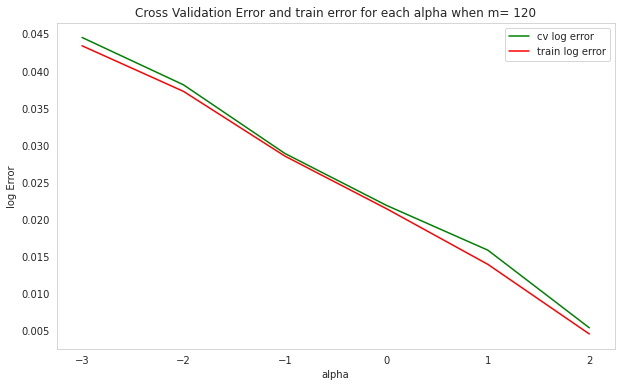

  0%|          | 0/6 [00:00<?, ?it/s]

cv Log Loss for m=180 and alpha=0.001 is 0.05106829656071269:
train Log Loss for m=180 and alpha=0.001 is 0.05322150953701339:
-------------------- Confusion matrix --------------------


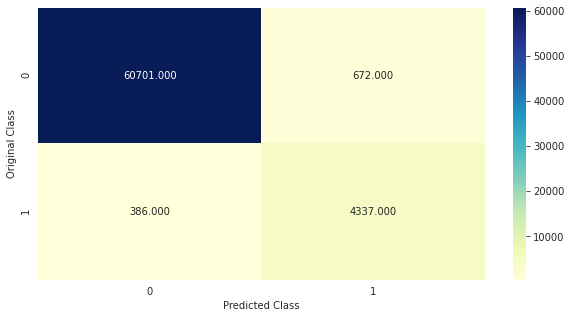

-------------------- Precision matrix (Columm Sum=1) --------------------


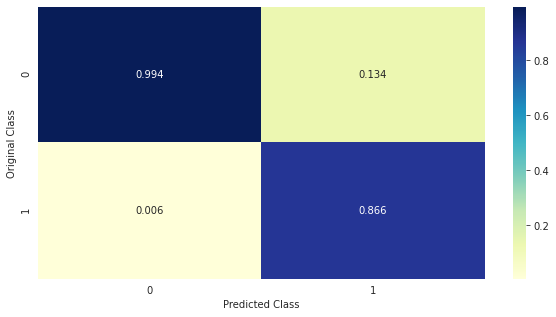

-------------------- Recall matrix (Row sum=1) --------------------


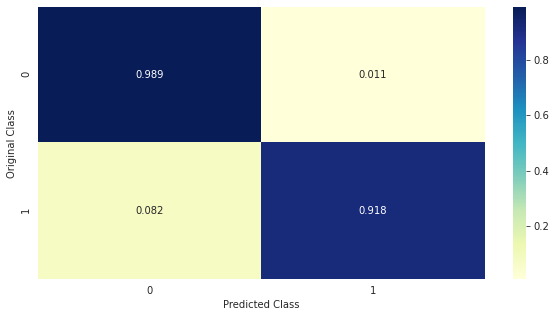

 17%|█▋        | 1/6 [37:40<3:08:20, 2260.08s/it]

macro average f1 score for m=180 and alpha=0.001 is 0.9413234609131788
cv Log Loss for m=180 and alpha=0.01 is 0.044454654436528476:
train Log Loss for m=180 and alpha=0.01 is 0.04638993227012042:
-------------------- Confusion matrix --------------------


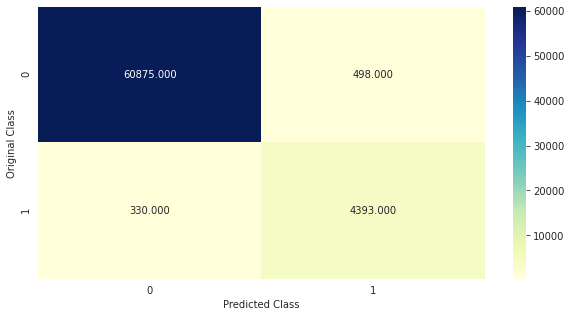

-------------------- Precision matrix (Columm Sum=1) --------------------


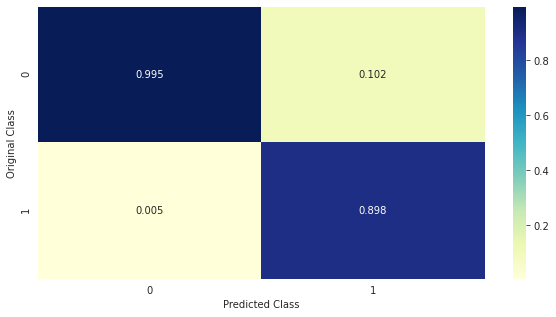

-------------------- Recall matrix (Row sum=1) --------------------


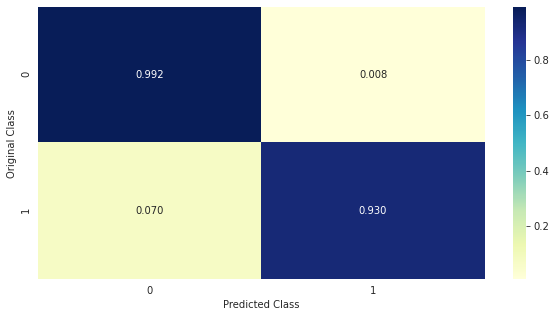

 33%|███▎      | 2/6 [1:12:37<2:27:24, 2211.17s/it]

macro average f1 score for m=180 and alpha=0.01 is 0.9535603577403815
cv Log Loss for m=180 and alpha=0.1 is 0.035133169655556754:
train Log Loss for m=180 and alpha=0.1 is 0.03632575935310739:
-------------------- Confusion matrix --------------------


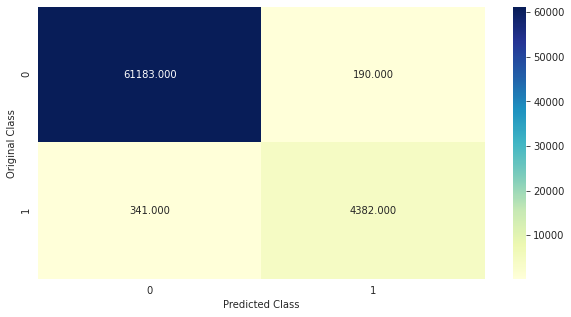

-------------------- Precision matrix (Columm Sum=1) --------------------


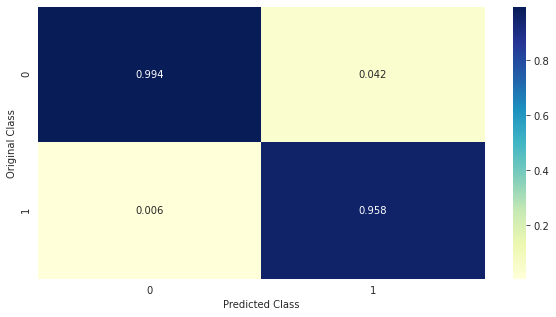

-------------------- Recall matrix (Row sum=1) --------------------


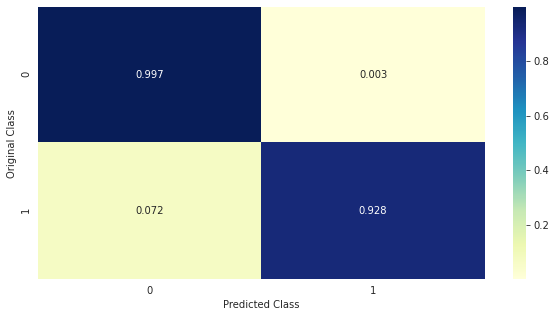

 50%|█████     | 3/6 [1:24:27<1:28:02, 1760.81s/it]

macro average f1 score for m=180 and alpha=0.1 is 0.9692759103963358
cv Log Loss for m=180 and alpha=1 is 0.028000536154094945:
train Log Loss for m=180 and alpha=1 is 0.028581280491822614:
-------------------- Confusion matrix --------------------


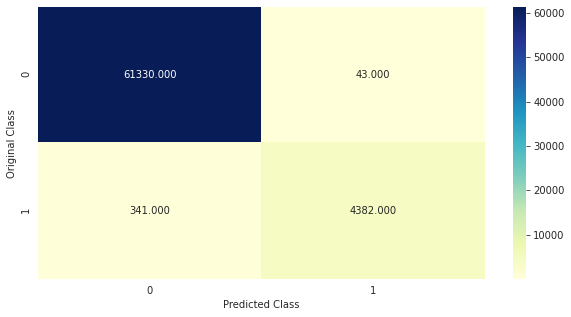

-------------------- Precision matrix (Columm Sum=1) --------------------


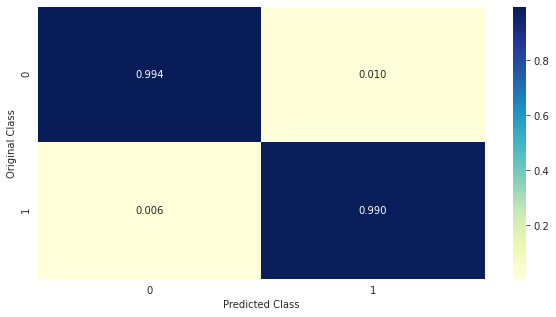

-------------------- Recall matrix (Row sum=1) --------------------


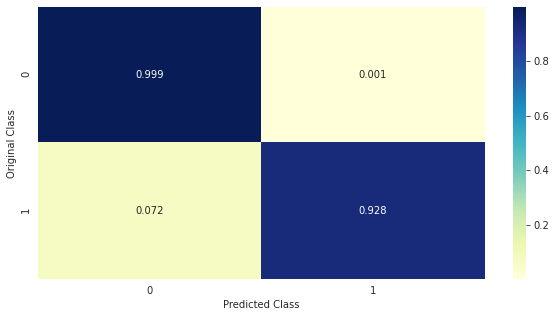

 67%|██████▋   | 4/6 [1:43:23<52:26, 1573.41s/it]  

macro average f1 score for m=180 and alpha=1 is 0.9774513884475466
cv Log Loss for m=180 and alpha=10 is 0.015657869452679787:
train Log Loss for m=180 and alpha=10 is 0.015006207252404665:
-------------------- Confusion matrix --------------------


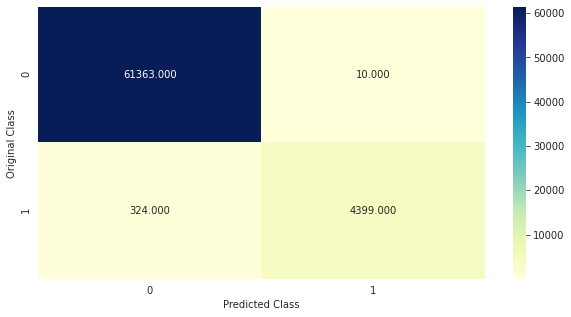

-------------------- Precision matrix (Columm Sum=1) --------------------


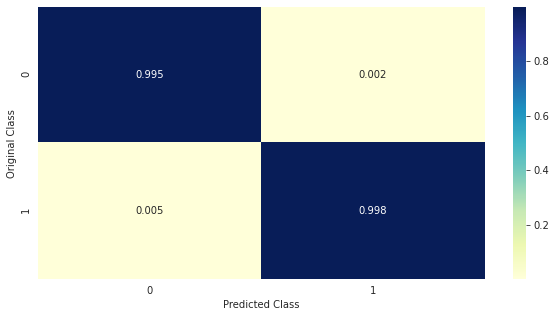

-------------------- Recall matrix (Row sum=1) --------------------


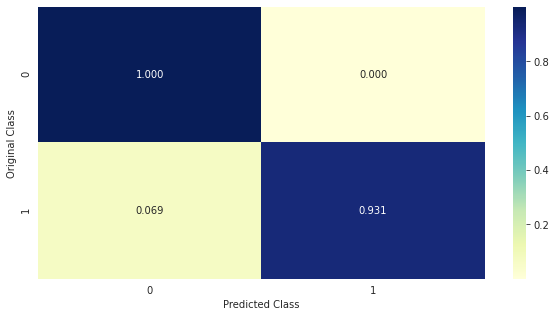

 83%|████████▎ | 5/6 [1:47:23<19:33, 1173.34s/it]

macro average f1 score for m=180 and alpha=10 is 0.9803555971863345
cv Log Loss for m=180 and alpha=100 is 0.006147627399653144:
train Log Loss for m=180 and alpha=100 is 0.005369793289665466:
-------------------- Confusion matrix --------------------


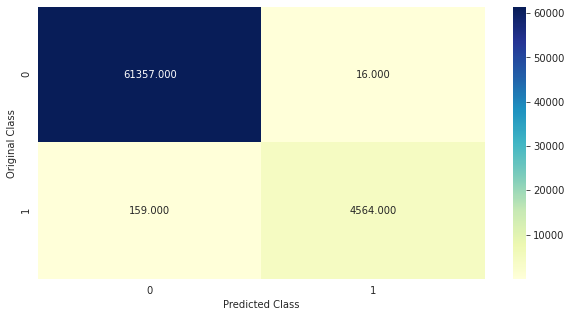

-------------------- Precision matrix (Columm Sum=1) --------------------


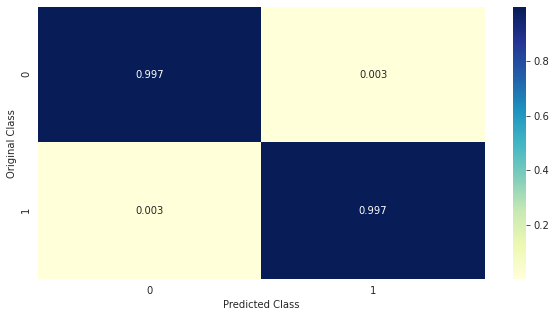

-------------------- Recall matrix (Row sum=1) --------------------


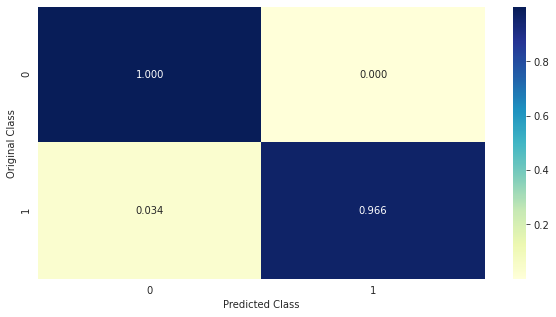

100%|██████████| 6/6 [1:50:33<00:00, 1105.63s/it]

macro average f1 score for m=180 and alpha=100 is 0.9898824072310148


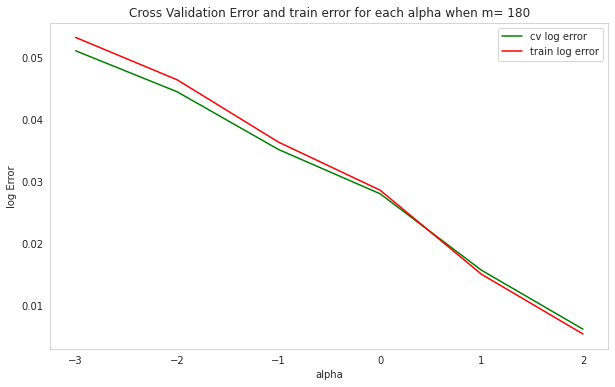

  0%|          | 0/6 [00:00<?, ?it/s]

cv Log Loss for m=240 and alpha=0.001 is 0.06304495677741052:
train Log Loss for m=240 and alpha=0.001 is 0.060432967662819644:
-------------------- Confusion matrix --------------------


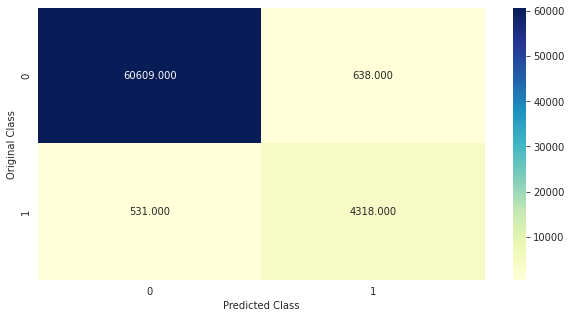

-------------------- Precision matrix (Columm Sum=1) --------------------


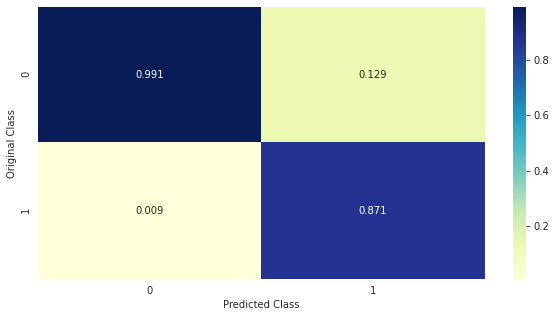

-------------------- Recall matrix (Row sum=1) --------------------


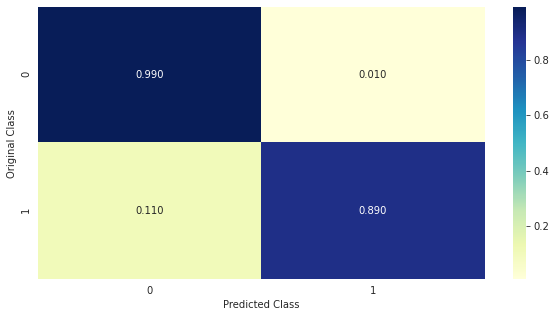

 17%|█▋        | 1/6 [50:28<4:12:23, 3028.66s/it]

macro average f1 score for m=240 and alpha=0.001 is 0.9356117233340289
cv Log Loss for m=240 and alpha=0.01 is 0.054858602434077516:
train Log Loss for m=240 and alpha=0.01 is 0.05282701859931738:
-------------------- Confusion matrix --------------------


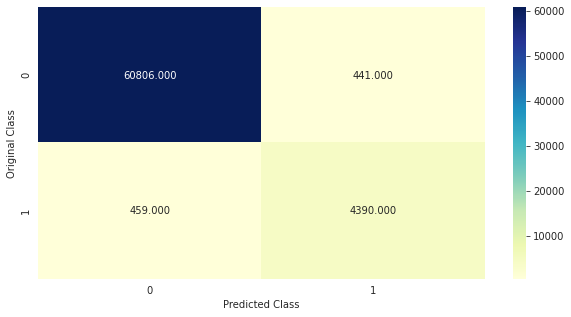

-------------------- Precision matrix (Columm Sum=1) --------------------


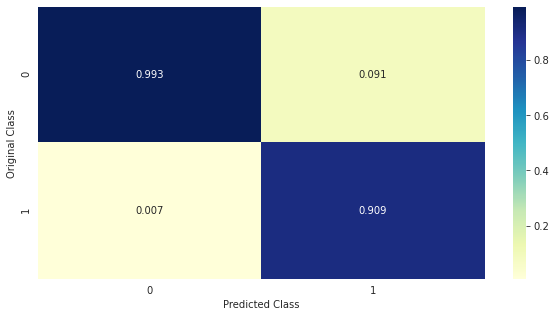

-------------------- Recall matrix (Row sum=1) --------------------


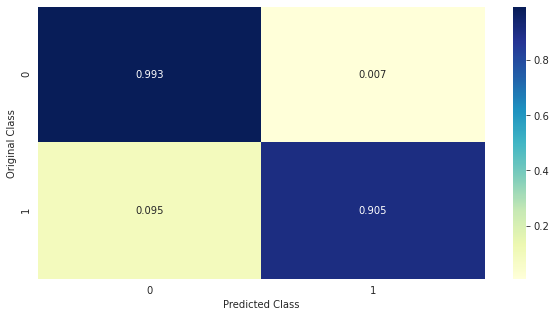

 33%|███▎      | 2/6 [1:11:02<2:46:01, 2490.33s/it]

macro average f1 score for m=240 and alpha=0.01 is 0.9498392871212751
cv Log Loss for m=240 and alpha=0.1 is 0.04417298114259424:
train Log Loss for m=240 and alpha=0.1 is 0.04306474912797237:
-------------------- Confusion matrix --------------------


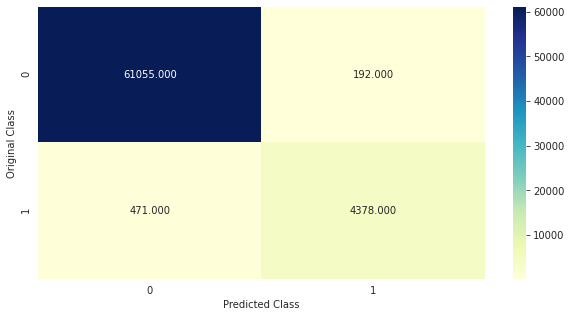

-------------------- Precision matrix (Columm Sum=1) --------------------


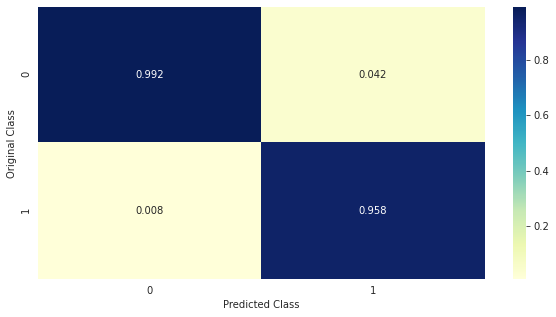

-------------------- Recall matrix (Row sum=1) --------------------


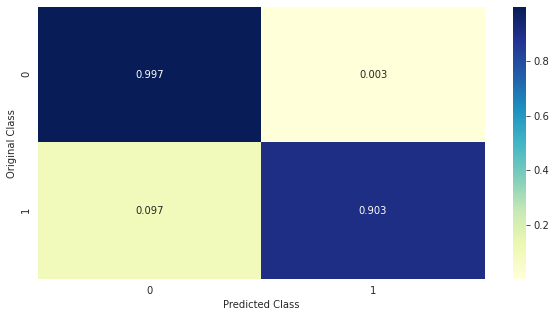

 50%|█████     | 3/6 [1:20:15<1:35:27, 1909.15s/it]

macro average f1 score for m=240 and alpha=0.1 is 0.9621050759451311
cv Log Loss for m=240 and alpha=1 is 0.033657169644558144:
train Log Loss for m=240 and alpha=1 is 0.032770636070545124:
-------------------- Confusion matrix --------------------


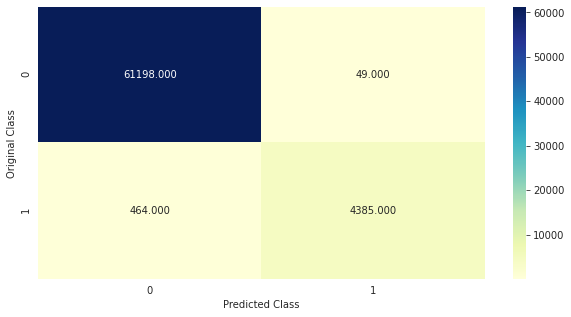

-------------------- Precision matrix (Columm Sum=1) --------------------


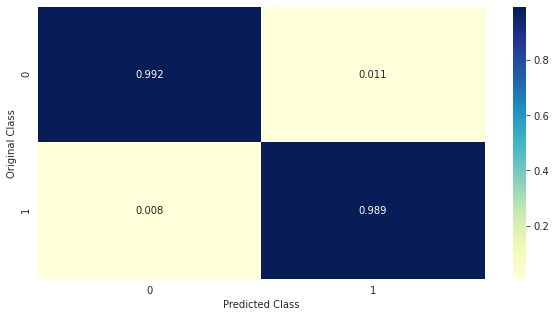

-------------------- Recall matrix (Row sum=1) --------------------


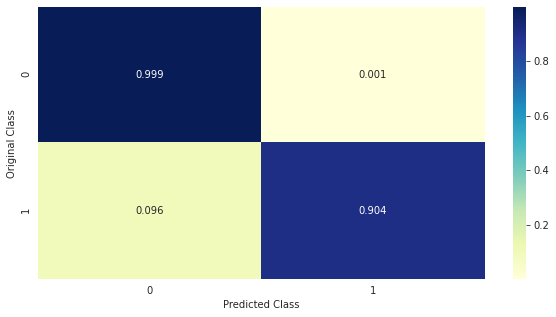

 67%|██████▋   | 4/6 [1:26:52<48:30, 1455.39s/it]  

macro average f1 score for m=240 and alpha=1 is 0.9702819364505468
cv Log Loss for m=240 and alpha=10 is 0.016424511181755756:
train Log Loss for m=240 and alpha=10 is 0.01646714496228813:
-------------------- Confusion matrix --------------------


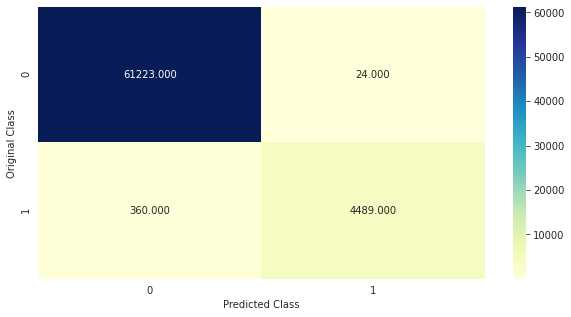

-------------------- Precision matrix (Columm Sum=1) --------------------


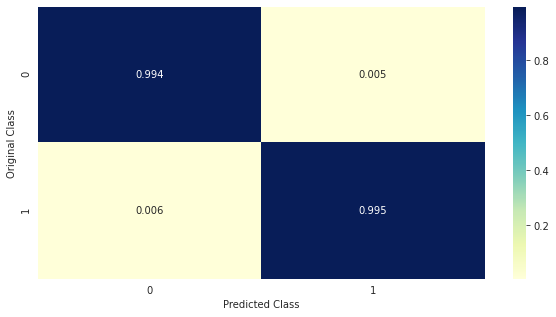

-------------------- Recall matrix (Row sum=1) --------------------


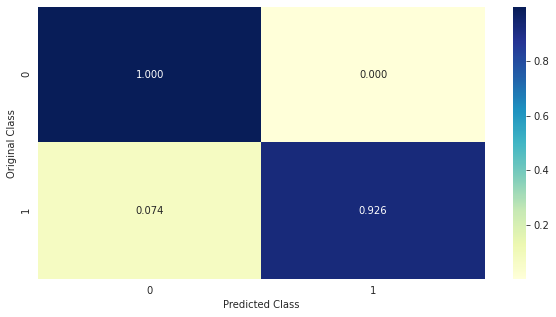

 83%|████████▎ | 5/6 [1:31:35<18:23, 1103.54s/it]

macro average f1 score for m=240 and alpha=10 is 0.9779284255904462
cv Log Loss for m=240 and alpha=100 is 0.006347379416451953:
train Log Loss for m=240 and alpha=100 is 0.005456106031968872:
-------------------- Confusion matrix --------------------


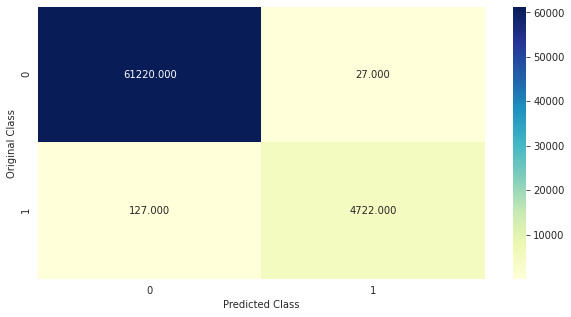

-------------------- Precision matrix (Columm Sum=1) --------------------


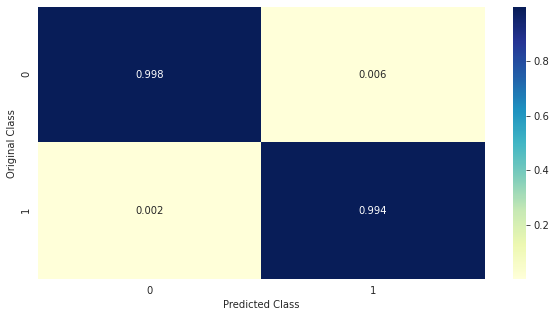

-------------------- Recall matrix (Row sum=1) --------------------


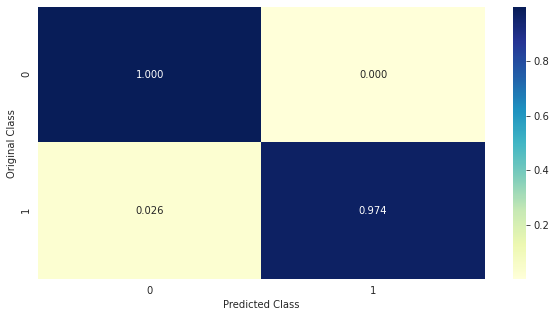

100%|██████████| 6/6 [1:35:11<00:00, 951.90s/it]

macro average f1 score for m=240 and alpha=100 is 0.9913494058454808


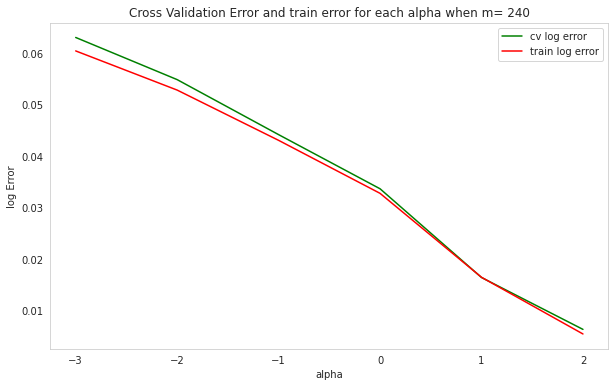

In [ ]:
rbf_svm_res=[]
for index,ele in enumerate(y):
    alpha = [10 ** x for x in range(-3, 3)]

    
    cv_log_error_array = []
    train_log_error_array = []
    
    for i in tqdm(alpha):
   
        clf = SVC(kernel='rbf',C=i,probability=True)
        clf.fit(X_train[index], Y_train[index])
        
       
        clf_probs_cv=clf.predict_proba(X_cv[index])
        clf_probs_train=clf.predict_proba(X_train[index])
        cv_log_error_array.append(log_loss(Y_cv[index], clf_probs_cv, labels=clf.classes_, eps=1e-15))
        train_log_error_array.append(log_loss(Y_train[index], clf_probs_train, labels=clf.classes_, eps=1e-15))
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
        print("cv Log Loss for m={} and alpha={} is {}:".format(m[index],i,log_loss(Y_cv[index], clf_probs_cv))) 
        print("train Log Loss for m={} and alpha={} is {}:".format(m[index],i,log_loss(Y_train[index], clf_probs_train))) 
        
        predict_y_test=clf.predict(X_test[index])
        plot_confusion_matrix(Y_test[index],predict_y_test)
        f1=f1_score(Y_test[index], predict_y_test, average='macro')
        print('macro average f1 score for m={} and alpha={} is {}'.format(m[index],i,f1))
        rbf_svm_res.append([m[index],i,log_loss(Y_cv[index], clf_probs_cv),log_loss(Y_train[index], clf_probs_train),f1])

    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(np.log10(alpha), cv_log_error_array,c='g',label='cv log error')
    ax.plot(np.log10(alpha), train_log_error_array,c='r',label='train log error')
    plt.legend()
    
    plt.grid()
    plt.title("Cross Validation Error and train error for each alpha when m= " + str(m[index]))
    plt.xlabel("alpha")
    plt.ylabel("log Error")
    plt.show()  


## Random Forest classifier

  0%|          | 0/6 [00:00<?, ?it/s]

cv Log Loss for m=60 and n_estimators_max_depth=[100, 5] is 0.013899383309586476:
train Log Loss for m=60 and n_estimators_max_depth=[100, 5] is 0.012968591881108804:
-------------------- Confusion matrix --------------------


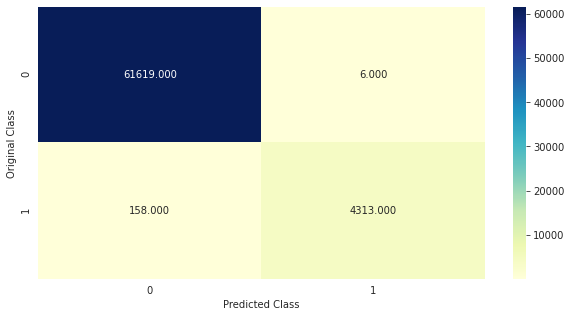

-------------------- Precision matrix (Columm Sum=1) --------------------


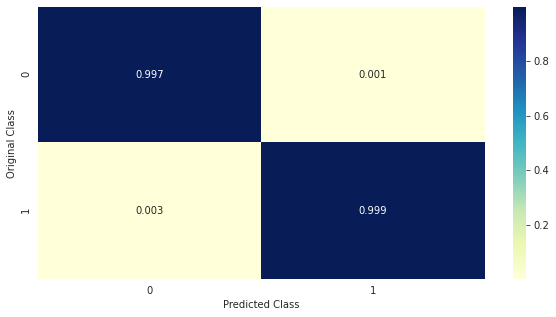

-------------------- Recall matrix (Row sum=1) --------------------


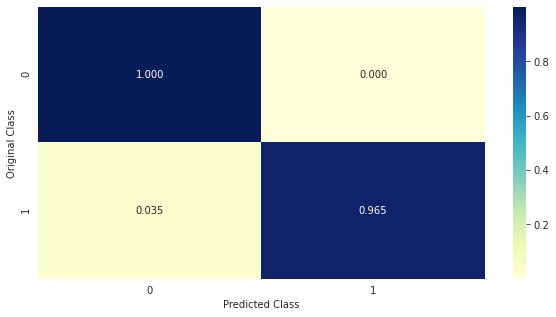

 17%|█▋        | 1/6 [00:22<01:50, 22.04s/it]

macro average f1 score for m=60 and n_estimators_max_depth=[100, 5] is 0.9900067223895399
cv Log Loss for m=60 and n_estimators_max_depth=[100, 10] is 0.006900816928985573:
train Log Loss for m=60 and n_estimators_max_depth=[100, 10] is 0.0053820500962998875:
-------------------- Confusion matrix --------------------


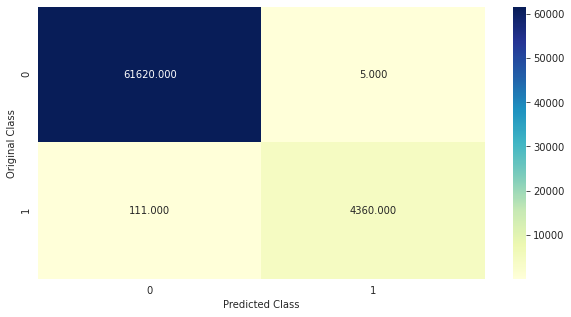

-------------------- Precision matrix (Columm Sum=1) --------------------


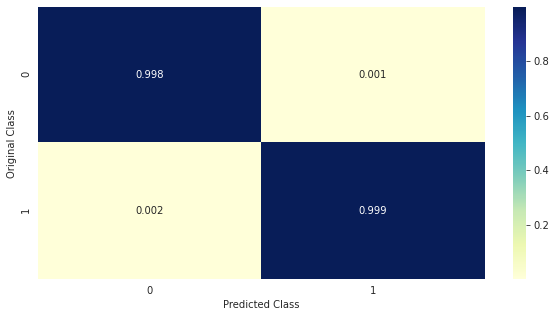

-------------------- Recall matrix (Row sum=1) --------------------


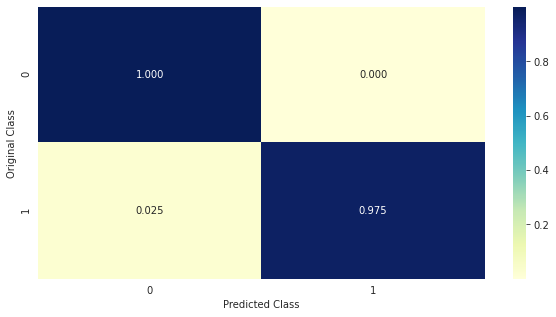

 33%|███▎      | 2/6 [01:01<01:48, 27.16s/it]

macro average f1 score for m=60 and n_estimators_max_depth=[100, 10] is 0.9929657600079009
cv Log Loss for m=60 and n_estimators_max_depth=[500, 5] is 0.013759921221394623:
train Log Loss for m=60 and n_estimators_max_depth=[500, 5] is 0.012613168393422008:
-------------------- Confusion matrix --------------------


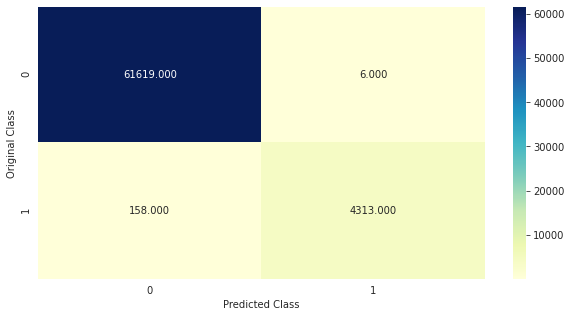

-------------------- Precision matrix (Columm Sum=1) --------------------


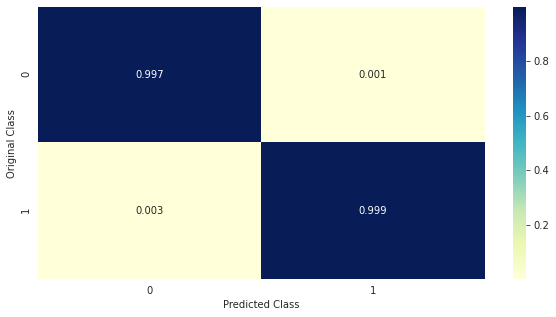

-------------------- Recall matrix (Row sum=1) --------------------


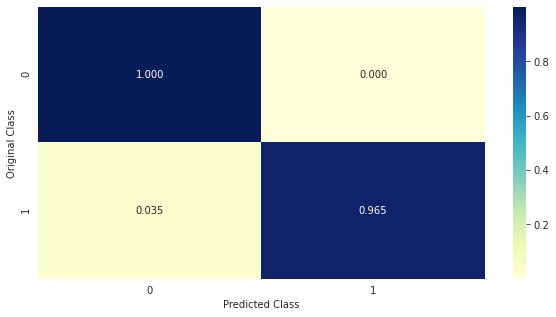

 50%|█████     | 3/6 [02:46<02:32, 50.72s/it]

macro average f1 score for m=60 and n_estimators_max_depth=[500, 5] is 0.9900067223895399
cv Log Loss for m=60 and n_estimators_max_depth=[500, 10] is 0.006719653941024863:
train Log Loss for m=60 and n_estimators_max_depth=[500, 10] is 0.00530001449699718:
-------------------- Confusion matrix --------------------


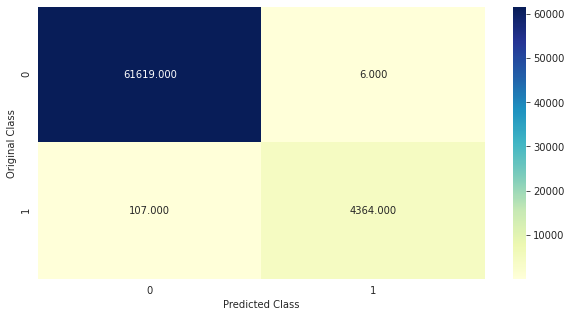

-------------------- Precision matrix (Columm Sum=1) --------------------


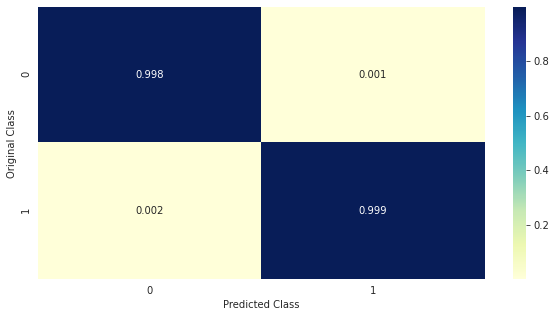

-------------------- Recall matrix (Row sum=1) --------------------


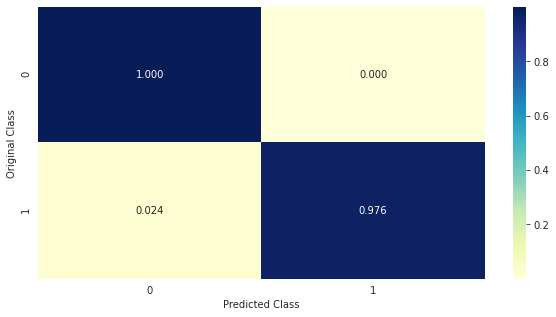

 67%|██████▋   | 4/6 [05:56<03:04, 92.49s/it]

macro average f1 score for m=60 and n_estimators_max_depth=[500, 10] is 0.9931512777160303
cv Log Loss for m=60 and n_estimators_max_depth=[1000, 5] is 0.013825934439230235:
train Log Loss for m=60 and n_estimators_max_depth=[1000, 5] is 0.012683788605135412:
-------------------- Confusion matrix --------------------


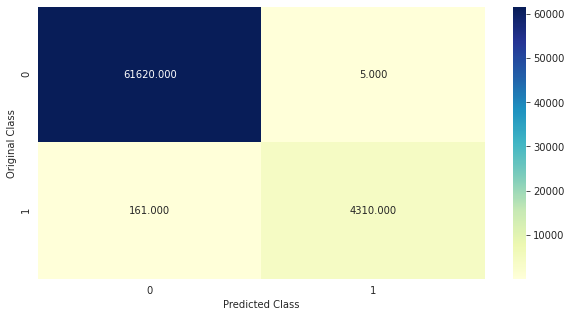

-------------------- Precision matrix (Columm Sum=1) --------------------


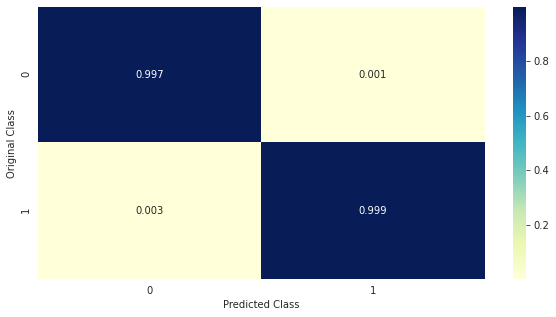

-------------------- Recall matrix (Row sum=1) --------------------


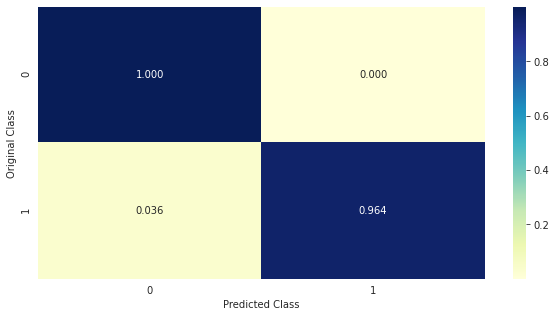

 83%|████████▎ | 5/6 [09:27<02:07, 127.94s/it]

macro average f1 score for m=60 and n_estimators_max_depth=[1000, 5] is 0.9898805760449467
cv Log Loss for m=60 and n_estimators_max_depth=[1000, 10] is 0.006803898615080936:
train Log Loss for m=60 and n_estimators_max_depth=[1000, 10] is 0.005385335685613466:
-------------------- Confusion matrix --------------------


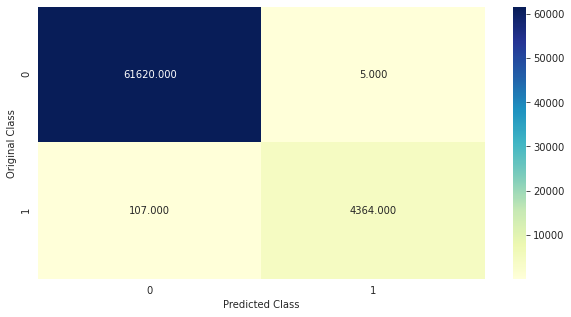

-------------------- Precision matrix (Columm Sum=1) --------------------


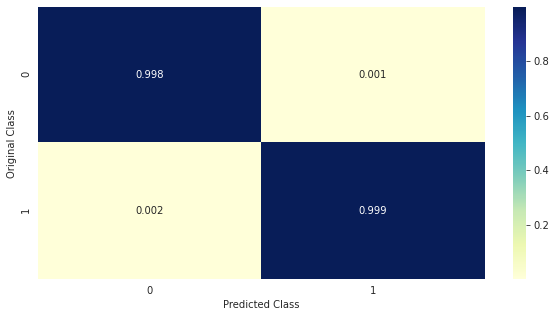

-------------------- Recall matrix (Row sum=1) --------------------


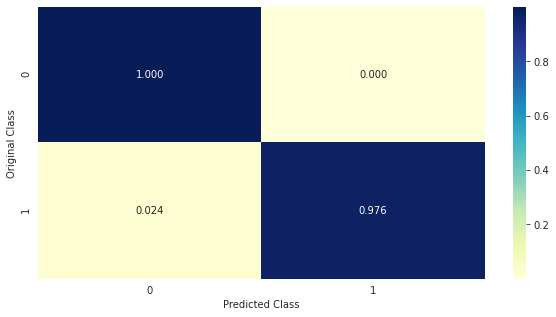

  0%|          | 0/6 [00:00<?, ?it/s]

macro average f1 score for m=60 and n_estimators_max_depth=[1000, 10] is 0.9932111730282818
cv Log Loss for m=120 and n_estimators_max_depth=[100, 5] is 0.022874215945457153:
train Log Loss for m=120 and n_estimators_max_depth=[100, 5] is 0.02242805418281393:
-------------------- Confusion matrix --------------------


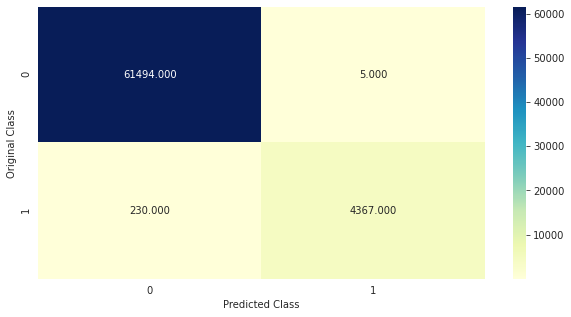

-------------------- Precision matrix (Columm Sum=1) --------------------


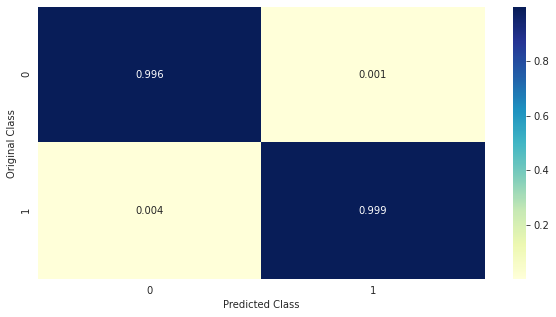

-------------------- Recall matrix (Row sum=1) --------------------


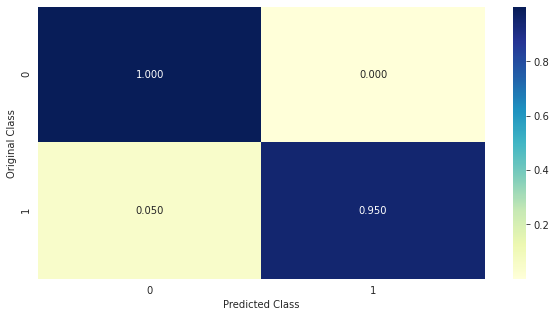

 17%|█▋        | 1/6 [00:21<01:49, 21.86s/it]

macro average f1 score for m=120 and n_estimators_max_depth=[100, 5] is 0.9859457641310643
cv Log Loss for m=120 and n_estimators_max_depth=[100, 10] is 0.011947179582820844:
train Log Loss for m=120 and n_estimators_max_depth=[100, 10] is 0.010987186844342951:
-------------------- Confusion matrix --------------------


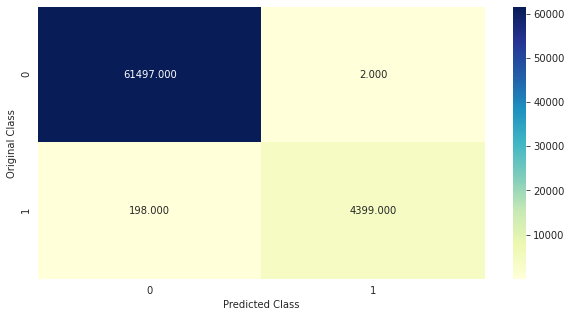

-------------------- Precision matrix (Columm Sum=1) --------------------


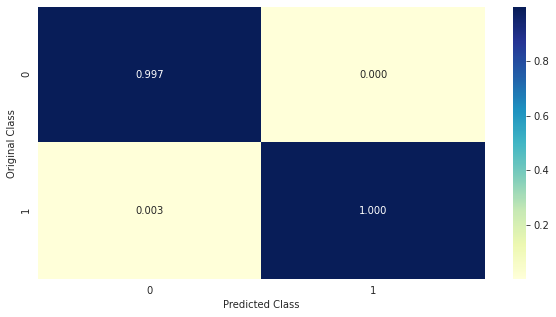

-------------------- Recall matrix (Row sum=1) --------------------


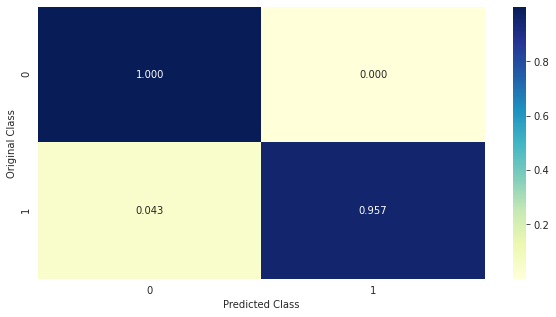

 33%|███▎      | 2/6 [01:00<01:47, 26.85s/it]

macro average f1 score for m=120 and n_estimators_max_depth=[100, 10] is 0.9880746913603791
cv Log Loss for m=120 and n_estimators_max_depth=[500, 5] is 0.022884644628733773:
train Log Loss for m=120 and n_estimators_max_depth=[500, 5] is 0.022334941091406327:
-------------------- Confusion matrix --------------------


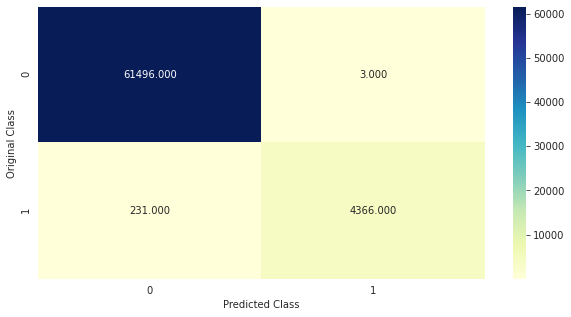

-------------------- Precision matrix (Columm Sum=1) --------------------


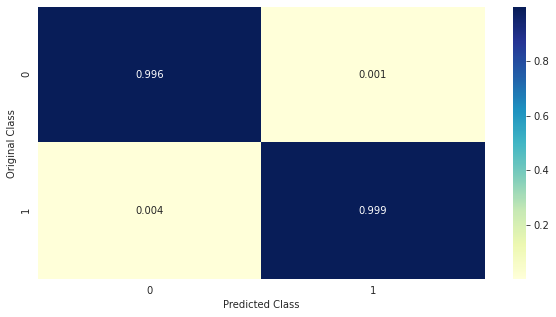

-------------------- Recall matrix (Row sum=1) --------------------


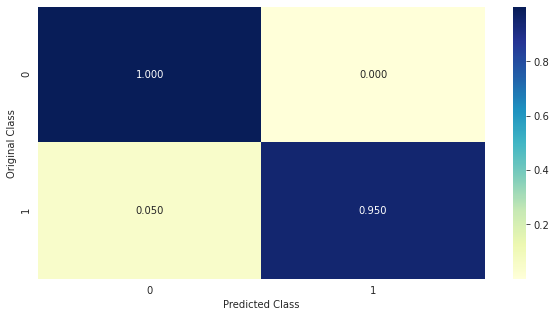

 50%|█████     | 3/6 [02:46<02:31, 50.57s/it]

macro average f1 score for m=120 and n_estimators_max_depth=[500, 5] is 0.9860012277060037
cv Log Loss for m=120 and n_estimators_max_depth=[500, 10] is 0.011288711117957135:
train Log Loss for m=120 and n_estimators_max_depth=[500, 10] is 0.010375698341767381:
-------------------- Confusion matrix --------------------


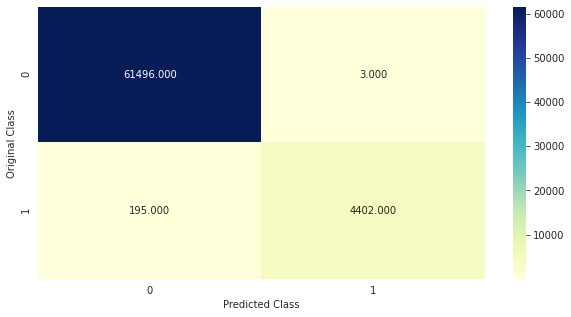

-------------------- Precision matrix (Columm Sum=1) --------------------


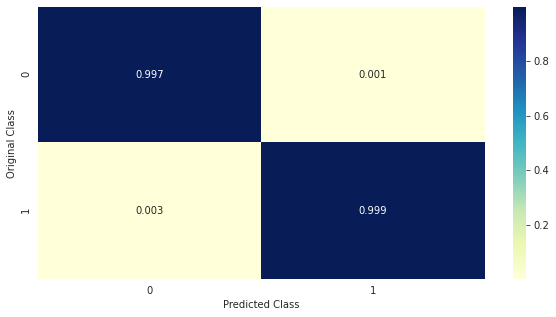

-------------------- Recall matrix (Row sum=1) --------------------


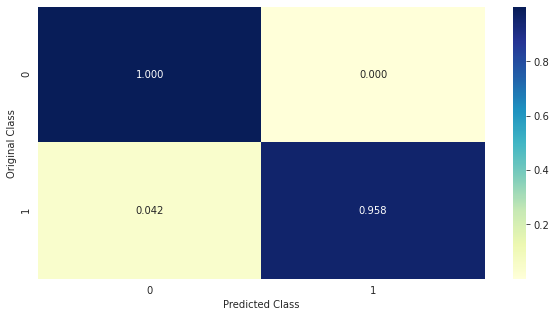

 67%|██████▋   | 4/6 [05:51<03:02, 91.02s/it]

macro average f1 score for m=120 and n_estimators_max_depth=[500, 10] is 0.9881988072425356
cv Log Loss for m=120 and n_estimators_max_depth=[1000, 5] is 0.022993229904806844:
train Log Loss for m=120 and n_estimators_max_depth=[1000, 5] is 0.022440818832059138:
-------------------- Confusion matrix --------------------


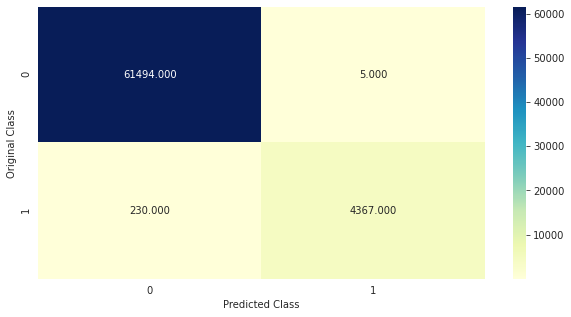

-------------------- Precision matrix (Columm Sum=1) --------------------


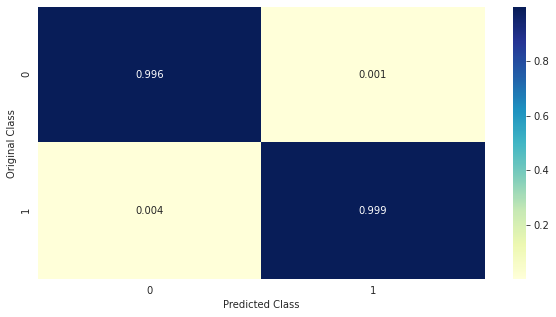

-------------------- Recall matrix (Row sum=1) --------------------


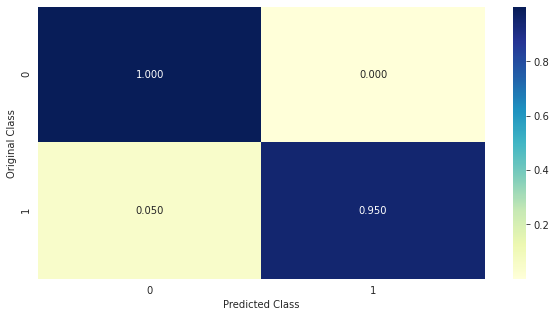

 83%|████████▎ | 5/6 [09:22<02:06, 126.92s/it]

macro average f1 score for m=120 and n_estimators_max_depth=[1000, 5] is 0.9859457641310643
cv Log Loss for m=120 and n_estimators_max_depth=[1000, 10] is 0.011218251000769:
train Log Loss for m=120 and n_estimators_max_depth=[1000, 10] is 0.010297415654042236:
-------------------- Confusion matrix --------------------


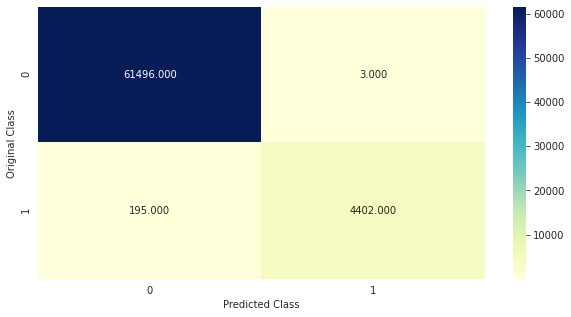

-------------------- Precision matrix (Columm Sum=1) --------------------


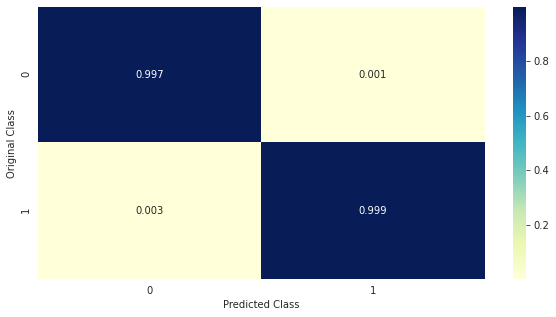

-------------------- Recall matrix (Row sum=1) --------------------


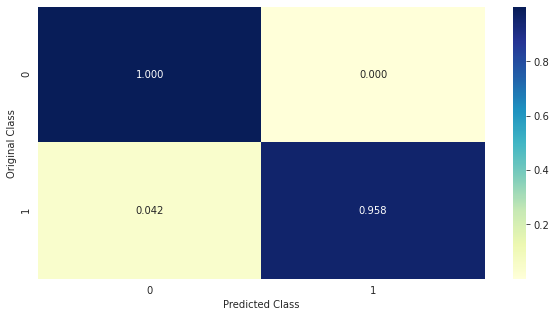

  0%|          | 0/6 [00:00<?, ?it/s]

macro average f1 score for m=120 and n_estimators_max_depth=[1000, 10] is 0.9881988072425356
cv Log Loss for m=180 and n_estimators_max_depth=[100, 5] is 0.029291757424219664:
train Log Loss for m=180 and n_estimators_max_depth=[100, 5] is 0.029630074823729206:
-------------------- Confusion matrix --------------------


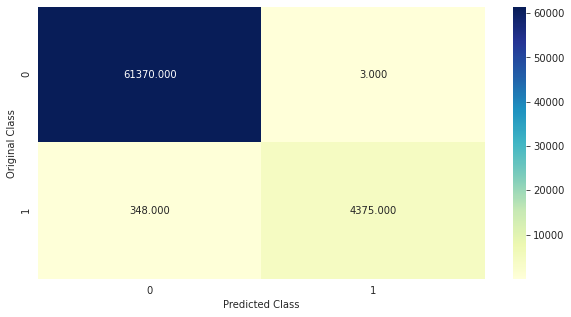

-------------------- Precision matrix (Columm Sum=1) --------------------


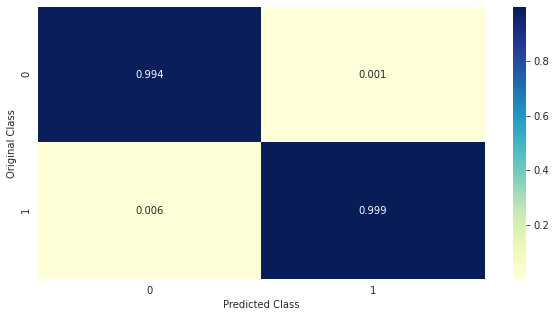

-------------------- Recall matrix (Row sum=1) --------------------


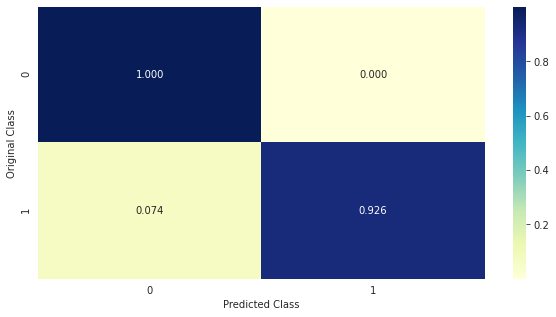

 17%|█▋        | 1/6 [00:22<01:50, 22.02s/it]

macro average f1 score for m=180 and n_estimators_max_depth=[100, 5] is 0.9792906303636324
cv Log Loss for m=180 and n_estimators_max_depth=[100, 10] is 0.013722749925047026:
train Log Loss for m=180 and n_estimators_max_depth=[100, 10] is 0.012872608243828732:
-------------------- Confusion matrix --------------------


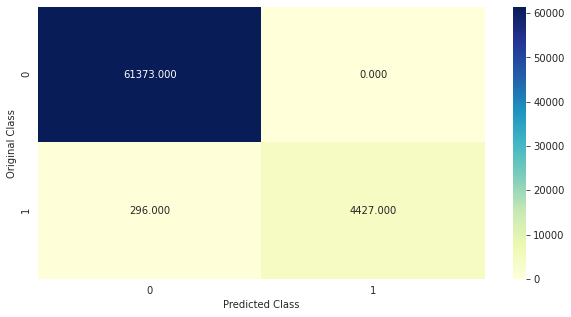

-------------------- Precision matrix (Columm Sum=1) --------------------


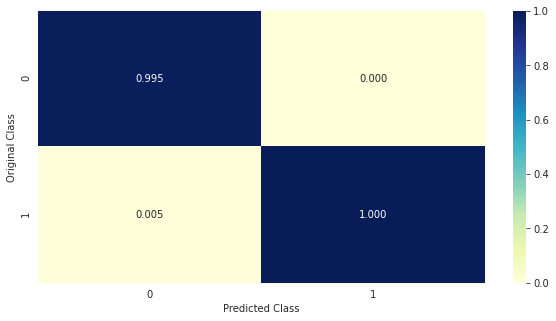

-------------------- Recall matrix (Row sum=1) --------------------


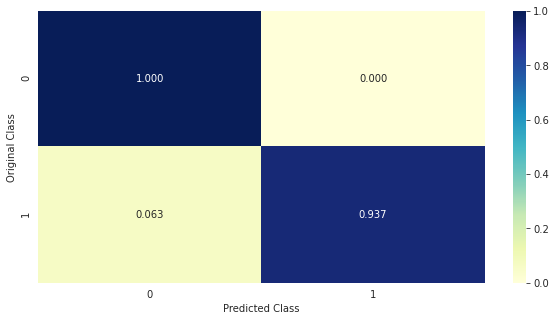

 33%|███▎      | 2/6 [01:00<01:47, 26.86s/it]

macro average f1 score for m=180 and n_estimators_max_depth=[100, 10] is 0.9826222953058013
cv Log Loss for m=180 and n_estimators_max_depth=[500, 5] is 0.029128587352777784:
train Log Loss for m=180 and n_estimators_max_depth=[500, 5] is 0.029415278113444694:
-------------------- Confusion matrix --------------------


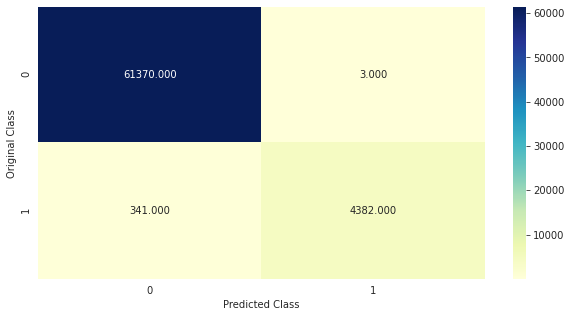

-------------------- Precision matrix (Columm Sum=1) --------------------


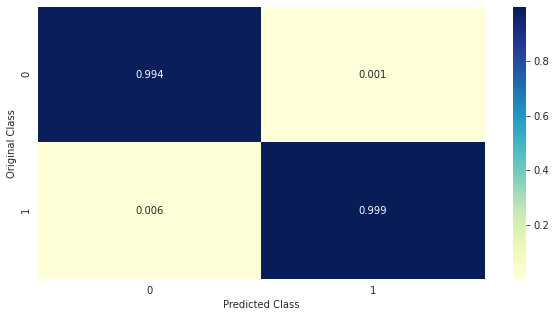

-------------------- Recall matrix (Row sum=1) --------------------


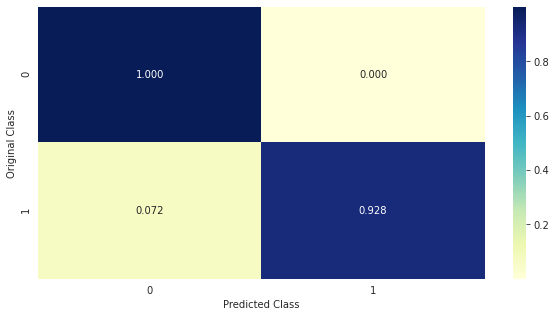

 50%|█████     | 3/6 [02:45<02:31, 50.52s/it]

macro average f1 score for m=180 and n_estimators_max_depth=[500, 5] is 0.9797180832062631
cv Log Loss for m=180 and n_estimators_max_depth=[500, 10] is 0.013354611498080671:
train Log Loss for m=180 and n_estimators_max_depth=[500, 10] is 0.012594789889025054:
-------------------- Confusion matrix --------------------


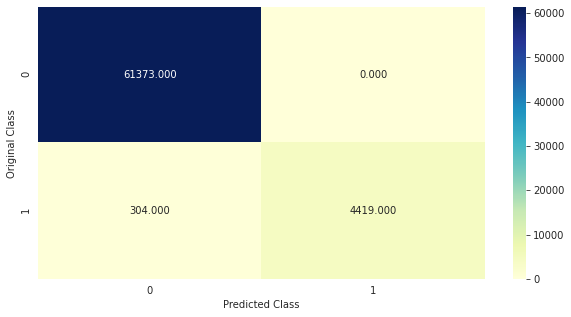

-------------------- Precision matrix (Columm Sum=1) --------------------


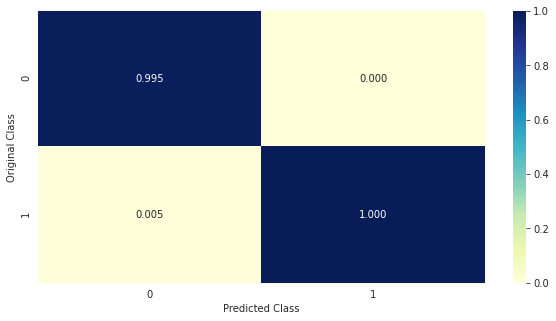

-------------------- Recall matrix (Row sum=1) --------------------


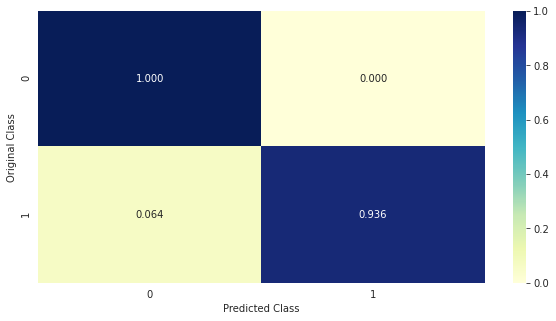

 67%|██████▋   | 4/6 [05:50<03:01, 90.60s/it]

macro average f1 score for m=180 and n_estimators_max_depth=[500, 10] is 0.9821381710447585
cv Log Loss for m=180 and n_estimators_max_depth=[1000, 5] is 0.029201878012536795:
train Log Loss for m=180 and n_estimators_max_depth=[1000, 5] is 0.029480729127592448:
-------------------- Confusion matrix --------------------


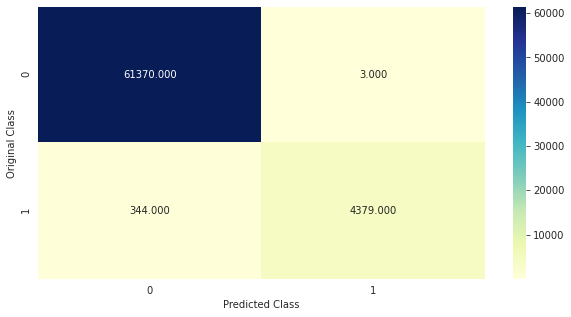

-------------------- Precision matrix (Columm Sum=1) --------------------


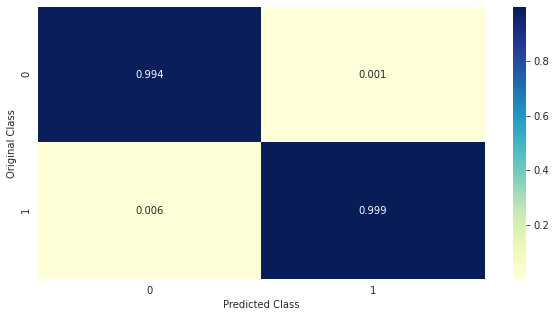

-------------------- Recall matrix (Row sum=1) --------------------


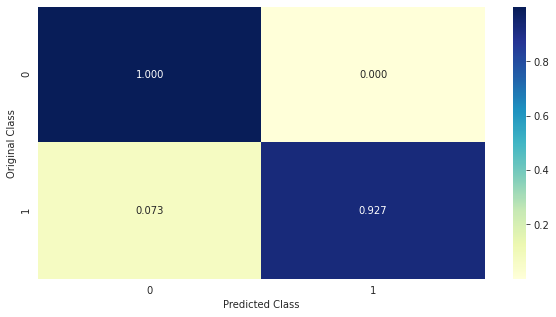

 83%|████████▎ | 5/6 [09:19<02:06, 126.13s/it]

macro average f1 score for m=180 and n_estimators_max_depth=[1000, 5] is 0.9795349638779626
cv Log Loss for m=180 and n_estimators_max_depth=[1000, 10] is 0.013282904404410429:
train Log Loss for m=180 and n_estimators_max_depth=[1000, 10] is 0.012528210399815448:
-------------------- Confusion matrix --------------------


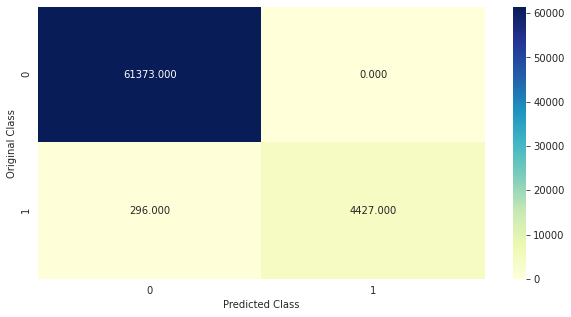

-------------------- Precision matrix (Columm Sum=1) --------------------


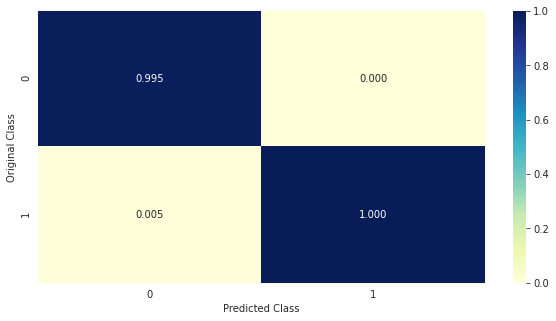

-------------------- Recall matrix (Row sum=1) --------------------


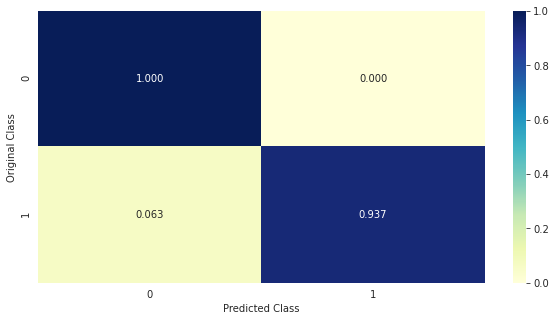

  0%|          | 0/6 [00:00<?, ?it/s]

macro average f1 score for m=180 and n_estimators_max_depth=[1000, 10] is 0.9826222953058013
cv Log Loss for m=240 and n_estimators_max_depth=[100, 5] is 0.03666870164814409:
train Log Loss for m=240 and n_estimators_max_depth=[100, 5] is 0.03450774502457255:
-------------------- Confusion matrix --------------------


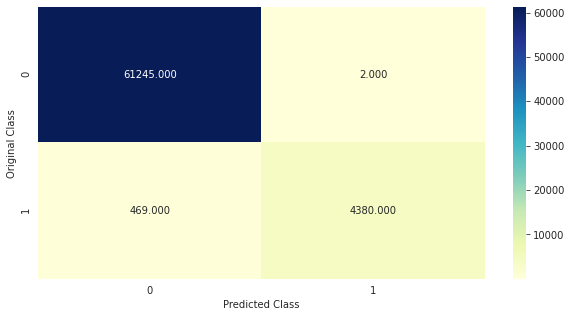

-------------------- Precision matrix (Columm Sum=1) --------------------


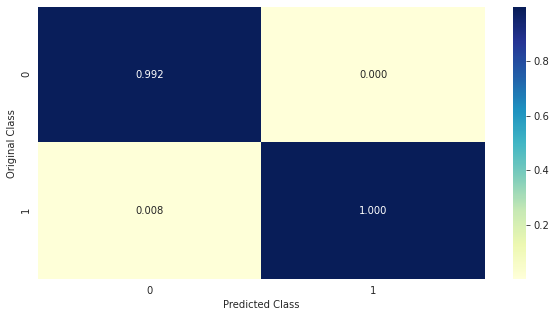

-------------------- Recall matrix (Row sum=1) --------------------


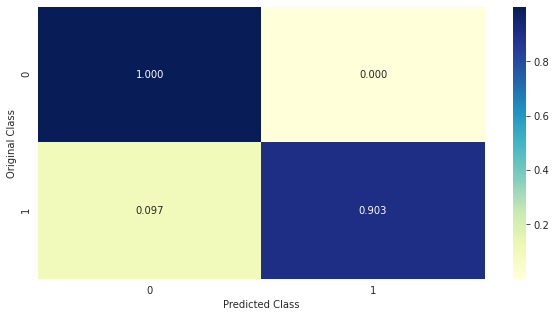

 17%|█▋        | 1/6 [00:22<01:51, 22.27s/it]

macro average f1 score for m=240 and n_estimators_max_depth=[100, 5] is 0.9725728963785445
cv Log Loss for m=240 and n_estimators_max_depth=[100, 10] is 0.015884295050927023:
train Log Loss for m=240 and n_estimators_max_depth=[100, 10] is 0.014286439912707465:
-------------------- Confusion matrix --------------------


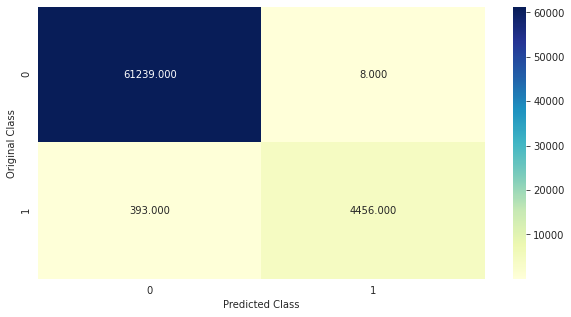

-------------------- Precision matrix (Columm Sum=1) --------------------


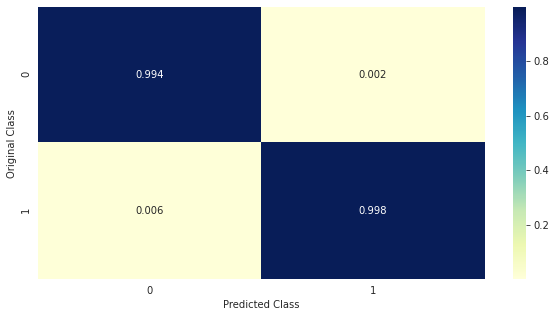

-------------------- Recall matrix (Row sum=1) --------------------


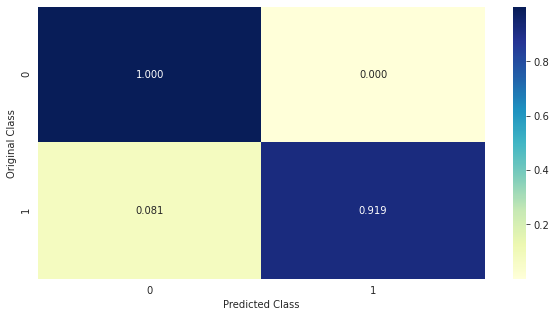

 33%|███▎      | 2/6 [00:59<01:46, 26.72s/it]

macro average f1 score for m=240 and n_estimators_max_depth=[100, 10] is 0.9768392681238383
cv Log Loss for m=240 and n_estimators_max_depth=[500, 5] is 0.035547679614189476:
train Log Loss for m=240 and n_estimators_max_depth=[500, 5] is 0.033384772769537066:
-------------------- Confusion matrix --------------------


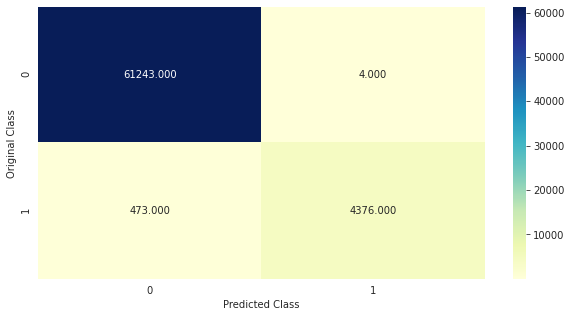

-------------------- Precision matrix (Columm Sum=1) --------------------


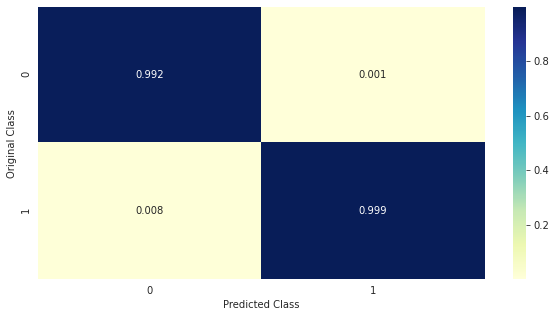

-------------------- Recall matrix (Row sum=1) --------------------


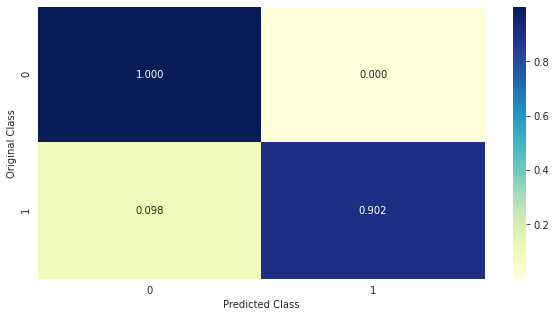

 50%|█████     | 3/6 [02:45<02:31, 50.43s/it]

macro average f1 score for m=240 and n_estimators_max_depth=[500, 5] is 0.972217939013633
cv Log Loss for m=240 and n_estimators_max_depth=[500, 10] is 0.015328229072124592:
train Log Loss for m=240 and n_estimators_max_depth=[500, 10] is 0.013669579442475828:
-------------------- Confusion matrix --------------------


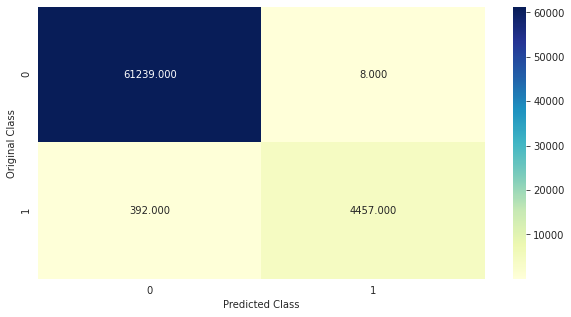

-------------------- Precision matrix (Columm Sum=1) --------------------


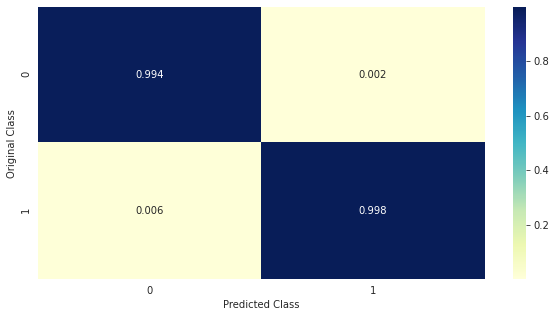

-------------------- Recall matrix (Row sum=1) --------------------


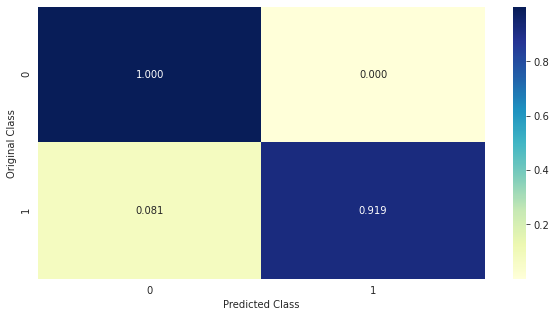

 67%|██████▋   | 4/6 [05:44<02:58, 89.15s/it]

macro average f1 score for m=240 and n_estimators_max_depth=[500, 10] is 0.9768993180213563
cv Log Loss for m=240 and n_estimators_max_depth=[1000, 5] is 0.035561336640248235:
train Log Loss for m=240 and n_estimators_max_depth=[1000, 5] is 0.033406279674936465:
-------------------- Confusion matrix --------------------


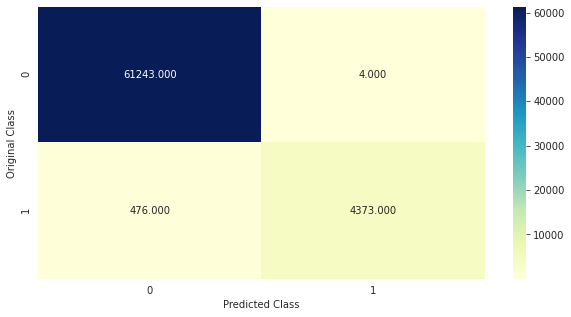

-------------------- Precision matrix (Columm Sum=1) --------------------


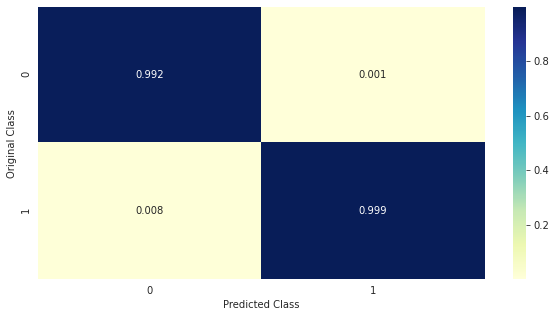

-------------------- Recall matrix (Row sum=1) --------------------


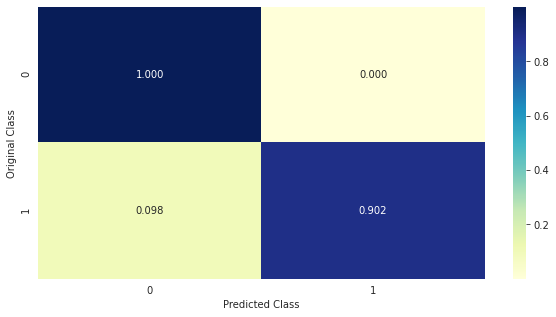

 83%|████████▎ | 5/6 [09:14<02:05, 125.33s/it]

macro average f1 score for m=240 and n_estimators_max_depth=[1000, 5] is 0.9720348006997039
cv Log Loss for m=240 and n_estimators_max_depth=[1000, 10] is 0.015268886121803186:
train Log Loss for m=240 and n_estimators_max_depth=[1000, 10] is 0.01360749384367788:
-------------------- Confusion matrix --------------------


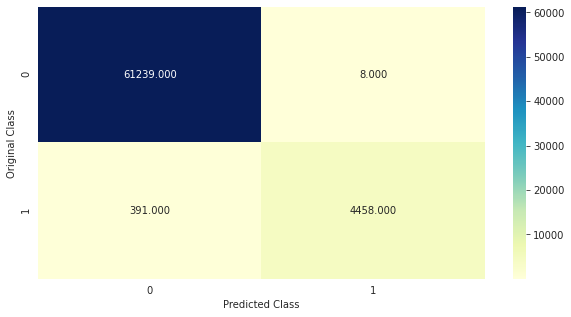

-------------------- Precision matrix (Columm Sum=1) --------------------


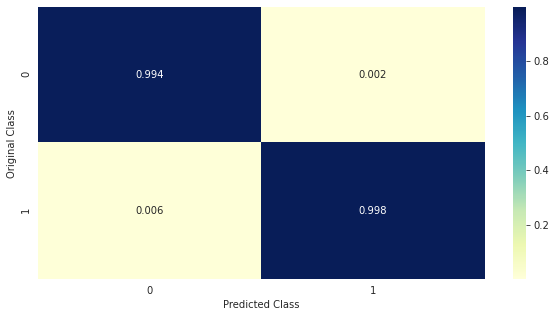

-------------------- Recall matrix (Row sum=1) --------------------


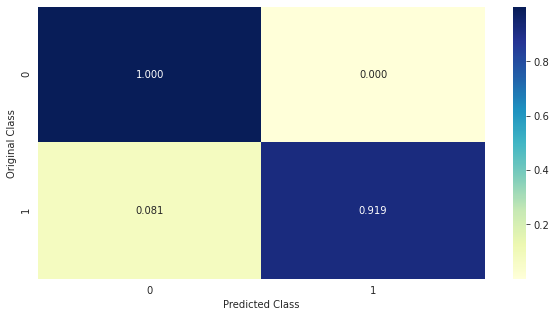

100%|██████████| 6/6 [15:10<00:00, 151.79s/it]

macro average f1 score for m=240 and n_estimators_max_depth=[1000, 10] is 0.9769593559625374


In [ ]:
random_forest_res=[]
for index,ele in enumerate(y):
    n_estimators_max_depth = [[100,5],[100,10],[500,5],[500,10],[1000,5],[1000,10]]

    
    cv_log_error_array = []
    train_log_error_array = []
    
    for i in tqdm(n_estimators_max_depth):
   
        clf = RandomForestClassifier(n_estimators=i[0], criterion='gini', max_depth=i[1], random_state=42, n_jobs=-1)
        clf.fit(X_train[index], Y_train[index])
        
       
        clf_probs_cv=clf.predict_proba(X_cv[index])
        clf_probs_train=clf.predict_proba(X_train[index])
        cv_log_error_array.append(log_loss(Y_cv[index], clf_probs_cv, labels=clf.classes_, eps=1e-15))
        train_log_error_array.append(log_loss(Y_train[index], clf_probs_train, labels=clf.classes_, eps=1e-15))
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
        print("cv Log Loss for m={} and n_estimators_max_depth={} is {}:".format(m[index],i,log_loss(Y_cv[index], clf_probs_cv))) 
        print("train Log Loss for m={} and n_estimators_max_depth={} is {}:".format(m[index],i,log_loss(Y_train[index], clf_probs_train))) 
        
        predict_y_test=clf.predict(X_test[index])
        plot_confusion_matrix(Y_test[index],predict_y_test)
        f1=f1_score(Y_test[index], predict_y_test, average='macro')
        print('macro average f1 score for m={} and n_estimators_max_depth={} is {}'.format(m[index],i,f1))
        random_forest_res.append([m[index],i,log_loss(Y_cv[index], clf_probs_cv),log_loss(Y_train[index], clf_probs_train),f1])
 


## XG Boost classifier

  0%|          | 0/9 [00:00<?, ?it/s]

cv Log Loss for m=60 and max_depth_n_estimators=[1, 5] is 0.35820311969808777:
train Log Loss for m=60 and max_depth_n_estimators=[1, 5] is 0.3579483788095128:
-------------------- Confusion matrix --------------------


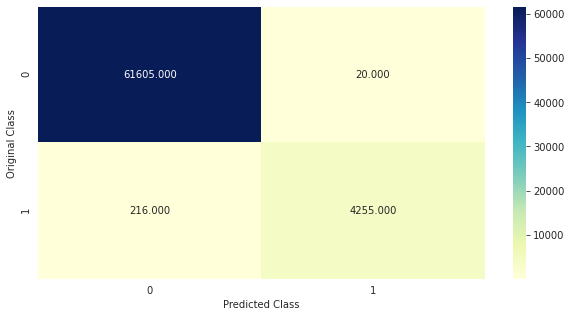

-------------------- Precision matrix (Columm Sum=1) --------------------


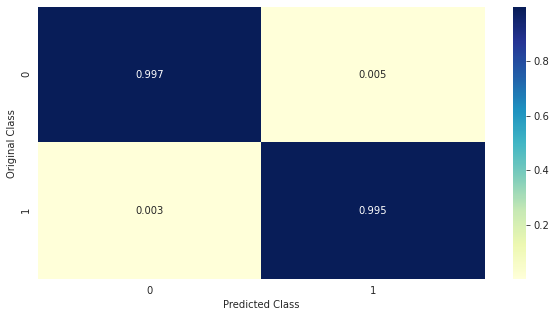

-------------------- Recall matrix (Row sum=1) --------------------


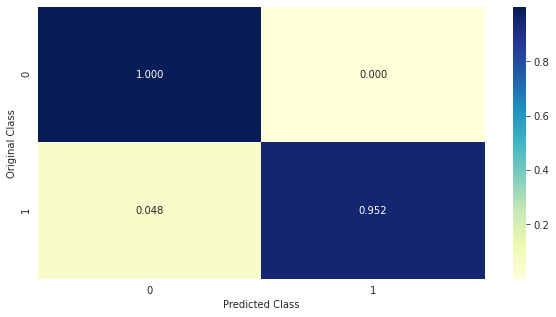

 11%|█         | 1/9 [00:02<00:17,  2.17s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[1, 5] is 0.9855522344525769
cv Log Loss for m=60 and max_depth_n_estimators=[1, 10] is 0.2046227402095561:
train Log Loss for m=60 and max_depth_n_estimators=[1, 10] is 0.20421546064528412:
-------------------- Confusion matrix --------------------


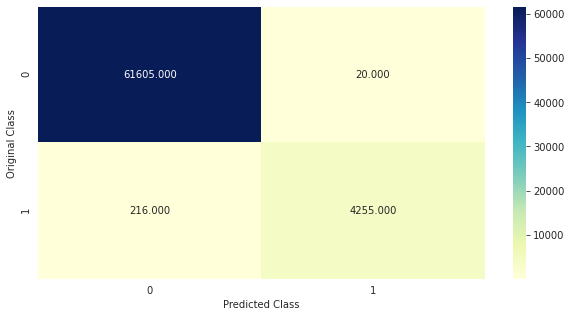

-------------------- Precision matrix (Columm Sum=1) --------------------


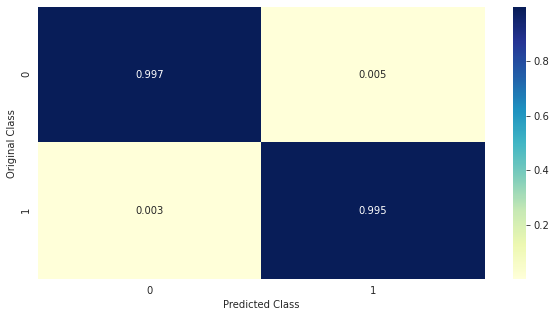

-------------------- Recall matrix (Row sum=1) --------------------


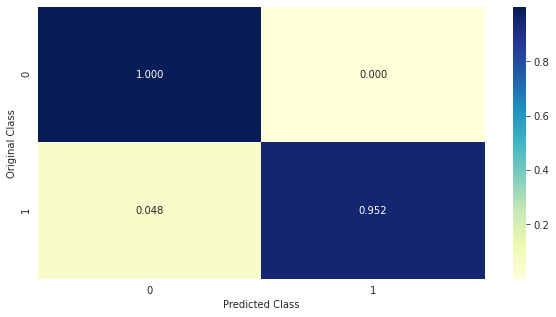

 22%|██▏       | 2/9 [00:04<00:16,  2.30s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[1, 10] is 0.9855522344525769
cv Log Loss for m=60 and max_depth_n_estimators=[1, 50] is 0.018166194655912758:
train Log Loss for m=60 and max_depth_n_estimators=[1, 50] is 0.017001428940256854:
-------------------- Confusion matrix --------------------


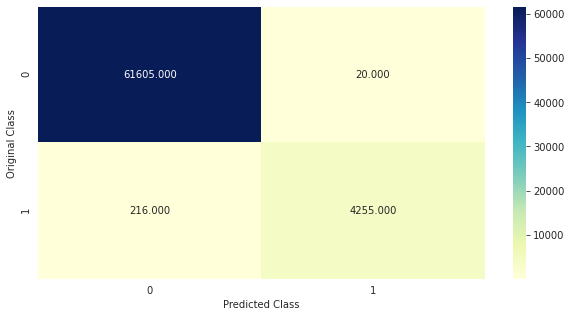

-------------------- Precision matrix (Columm Sum=1) --------------------


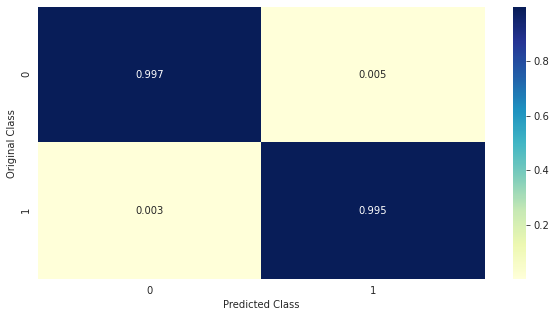

-------------------- Recall matrix (Row sum=1) --------------------


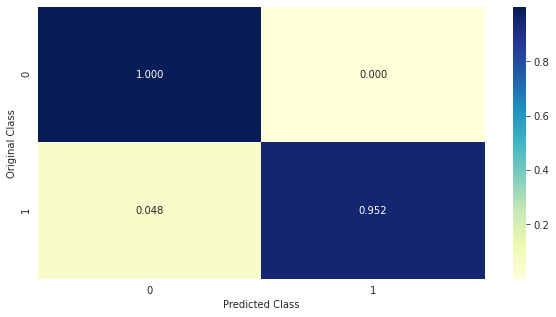

 33%|███▎      | 3/9 [00:10<00:20,  3.47s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[1, 50] is 0.9855522344525769
cv Log Loss for m=60 and max_depth_n_estimators=[10, 5] is 0.3561731998182996:
train Log Loss for m=60 and max_depth_n_estimators=[10, 5] is 0.3557577039555757:
-------------------- Confusion matrix --------------------


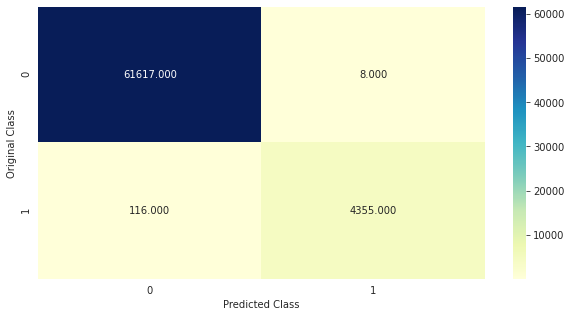

-------------------- Precision matrix (Columm Sum=1) --------------------


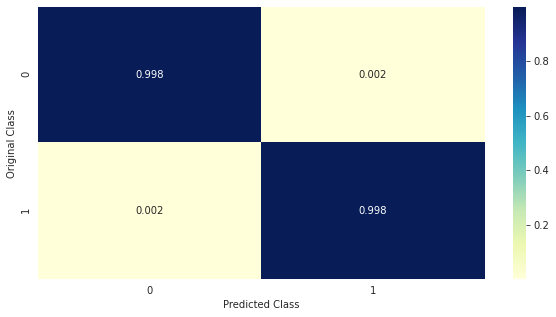

-------------------- Recall matrix (Row sum=1) --------------------


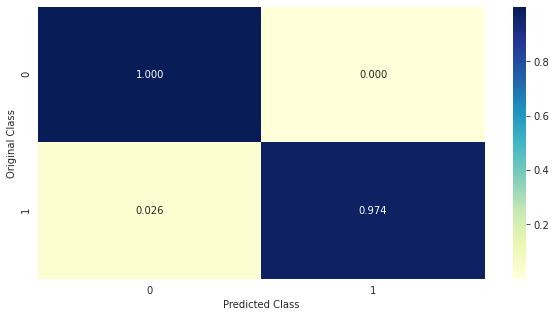

 44%|████▍     | 4/9 [00:15<00:18,  3.79s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[10, 5] is 0.9924790595791103
cv Log Loss for m=60 and max_depth_n_estimators=[10, 10] is 0.20068891354957055:
train Log Loss for m=60 and max_depth_n_estimators=[10, 10] is 0.19999199333279125:
-------------------- Confusion matrix --------------------


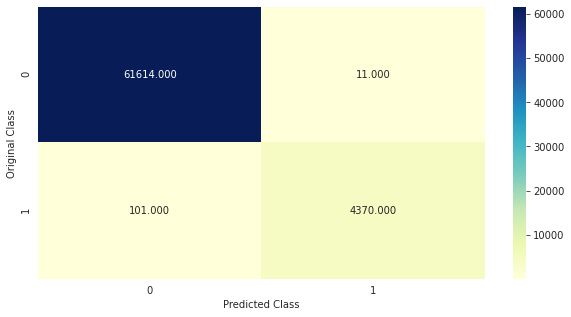

-------------------- Precision matrix (Columm Sum=1) --------------------


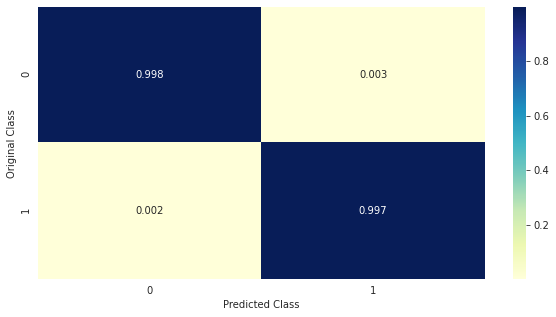

-------------------- Recall matrix (Row sum=1) --------------------


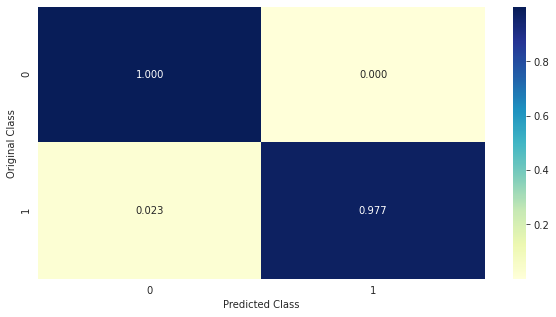

 56%|█████▌    | 5/9 [00:23<00:19,  4.96s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[10, 10] is 0.9932197165341731
cv Log Loss for m=60 and max_depth_n_estimators=[10, 50] is 0.004657857854262787:
train Log Loss for m=60 and max_depth_n_estimators=[10, 50] is 0.0037685652930656184:
-------------------- Confusion matrix --------------------


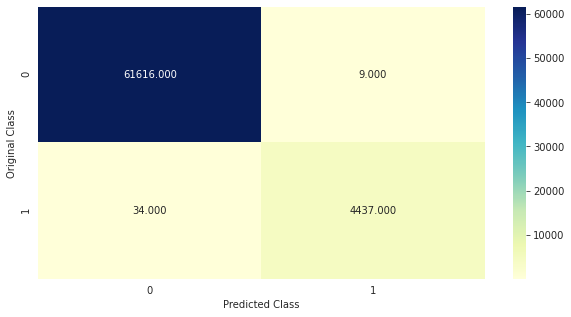

-------------------- Precision matrix (Columm Sum=1) --------------------


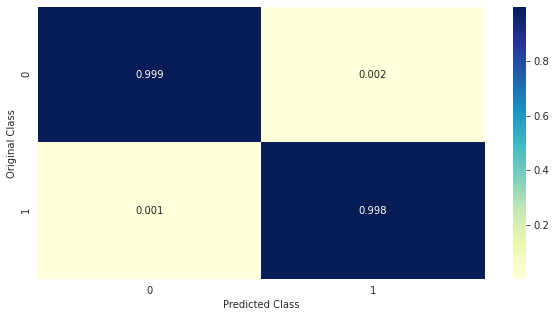

-------------------- Recall matrix (Row sum=1) --------------------


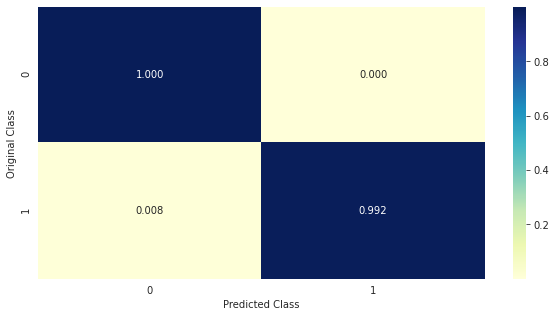

 67%|██████▋   | 6/9 [00:56<00:40, 13.40s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[10, 50] is 0.9974144683682025
cv Log Loss for m=60 and max_depth_n_estimators=[50, 5] is 0.3561649603160969:
train Log Loss for m=60 and max_depth_n_estimators=[50, 5] is 0.35574909025898654:
-------------------- Confusion matrix --------------------


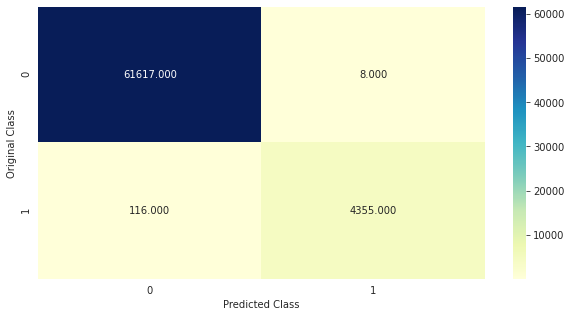

-------------------- Precision matrix (Columm Sum=1) --------------------


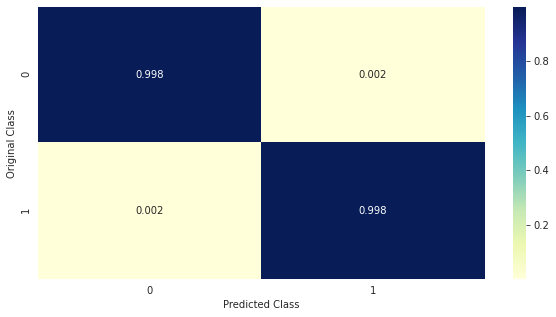

-------------------- Recall matrix (Row sum=1) --------------------


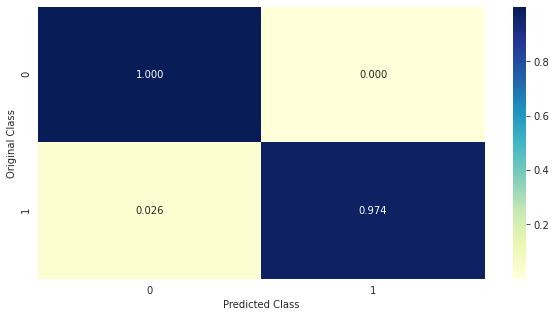

 78%|███████▊  | 7/9 [01:01<00:21, 10.82s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[50, 5] is 0.9924790595791103
cv Log Loss for m=60 and max_depth_n_estimators=[50, 10] is 0.20003817598128923:
train Log Loss for m=60 and max_depth_n_estimators=[50, 10] is 0.1994301970381294:
-------------------- Confusion matrix --------------------


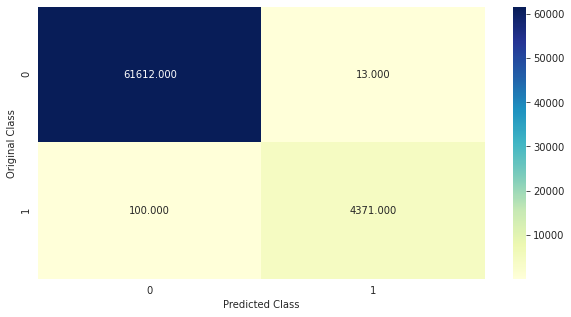

-------------------- Precision matrix (Columm Sum=1) --------------------


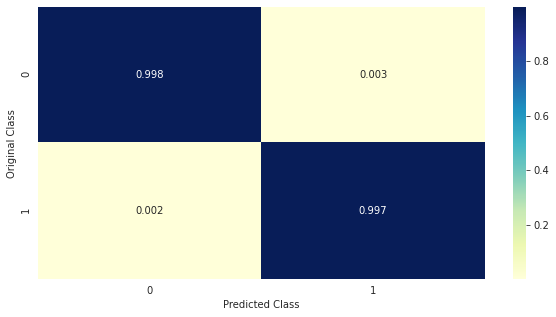

-------------------- Recall matrix (Row sum=1) --------------------


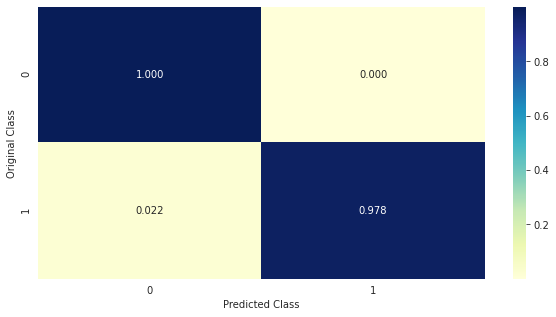

 89%|████████▉ | 8/9 [01:09<00:10, 10.12s/it]

macro average f1 score for m=60 and max_depth_n_estimators=[50, 10] is 0.9931613295651238
cv Log Loss for m=60 and max_depth_n_estimators=[50, 50] is 0.004588338182665832:
train Log Loss for m=60 and max_depth_n_estimators=[50, 50] is 0.0037240127989206853:
-------------------- Confusion matrix --------------------


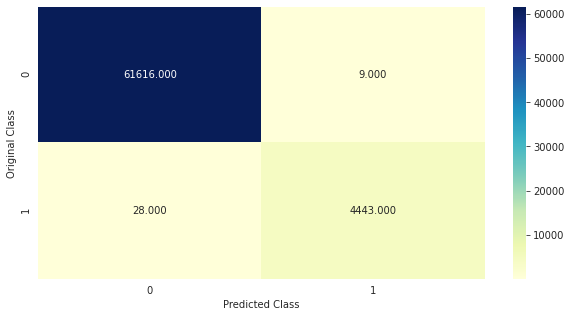

-------------------- Precision matrix (Columm Sum=1) --------------------


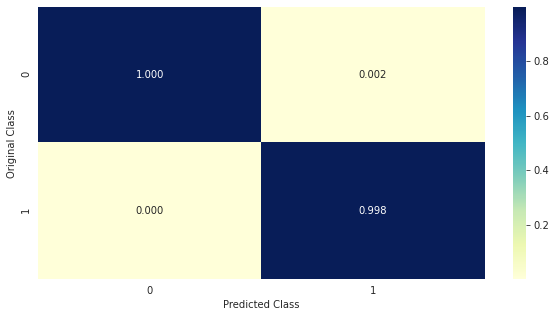

-------------------- Recall matrix (Row sum=1) --------------------


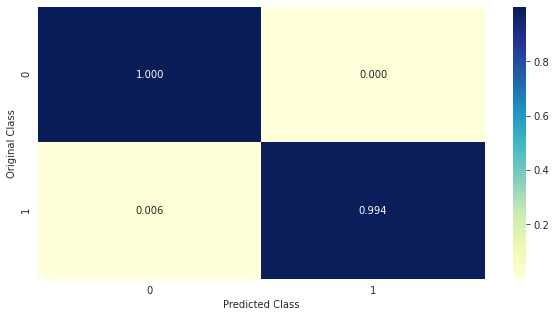

  0%|          | 0/9 [00:00<?, ?it/s]

macro average f1 score for m=60 and max_depth_n_estimators=[50, 50] is 0.9977766279806313
cv Log Loss for m=120 and max_depth_n_estimators=[1, 5] is 0.36115165491964984:
train Log Loss for m=120 and max_depth_n_estimators=[1, 5] is 0.3612354809820747:
-------------------- Confusion matrix --------------------


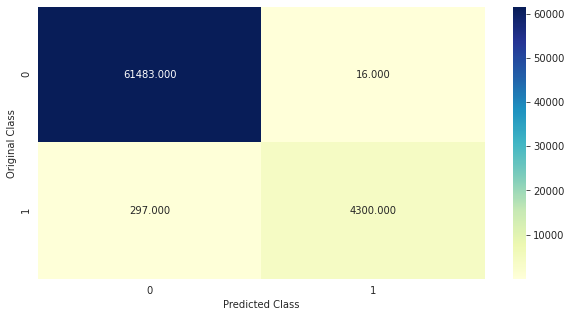

-------------------- Precision matrix (Columm Sum=1) --------------------


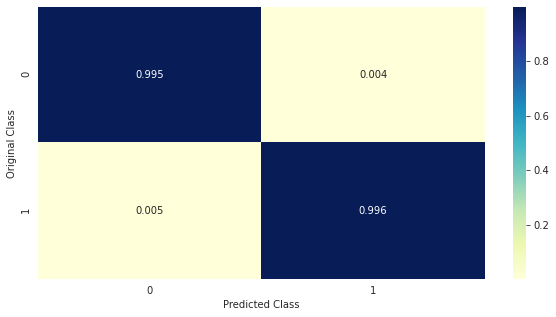

-------------------- Recall matrix (Row sum=1) --------------------


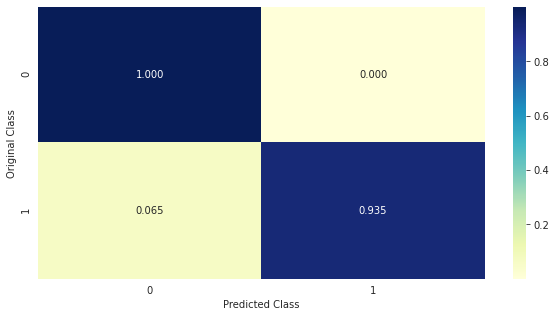

 11%|█         | 1/9 [00:02<00:17,  2.17s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[1, 5] is 0.9811718995872978
cv Log Loss for m=120 and max_depth_n_estimators=[1, 10] is 0.2092383622307064:
train Log Loss for m=120 and max_depth_n_estimators=[1, 10] is 0.20925809086686467:
-------------------- Confusion matrix --------------------


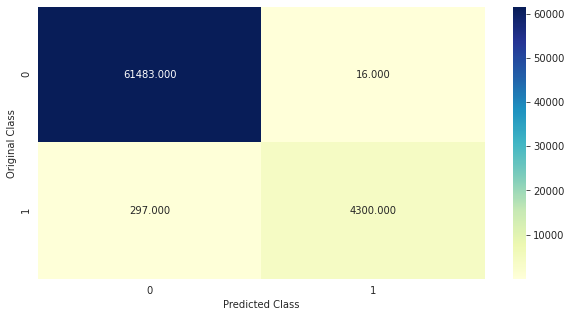

-------------------- Precision matrix (Columm Sum=1) --------------------


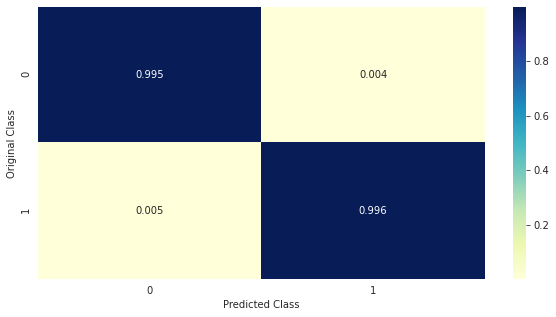

-------------------- Recall matrix (Row sum=1) --------------------


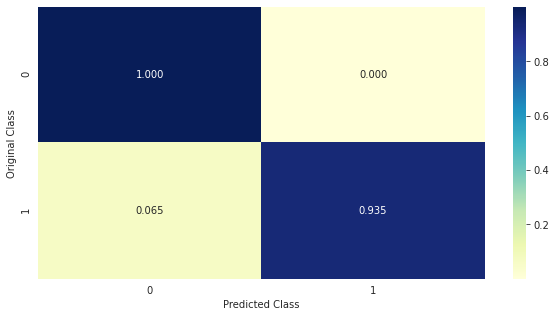

 22%|██▏       | 2/9 [00:04<00:15,  2.28s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[1, 10] is 0.9811718995872978
cv Log Loss for m=120 and max_depth_n_estimators=[1, 50] is 0.02740880309237481:
train Log Loss for m=120 and max_depth_n_estimators=[1, 50] is 0.027284755474080175:
-------------------- Confusion matrix --------------------


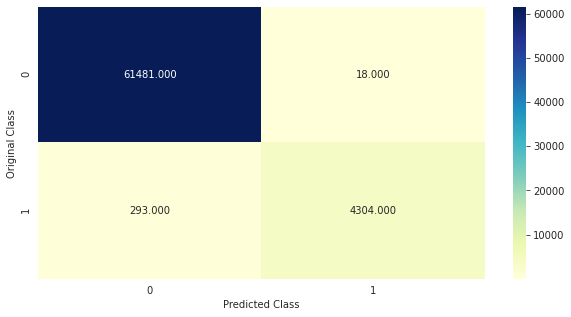

-------------------- Precision matrix (Columm Sum=1) --------------------


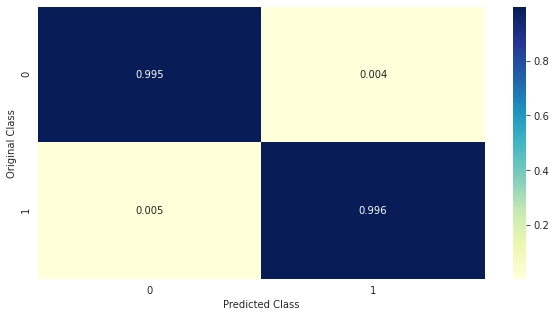

-------------------- Recall matrix (Row sum=1) --------------------


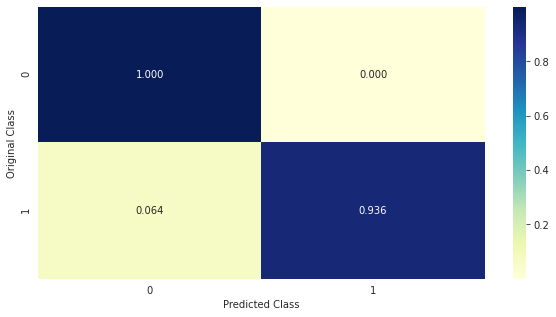

 33%|███▎      | 3/9 [00:11<00:20,  3.49s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[1, 50] is 0.9813038821246369
cv Log Loss for m=120 and max_depth_n_estimators=[10, 5] is 0.3570389263650731:
train Log Loss for m=120 and max_depth_n_estimators=[10, 5] is 0.35675849009631955:
-------------------- Confusion matrix --------------------


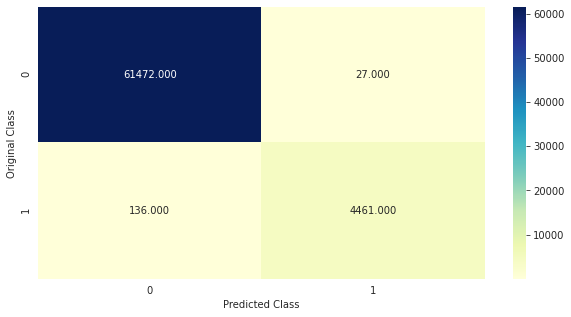

-------------------- Precision matrix (Columm Sum=1) --------------------


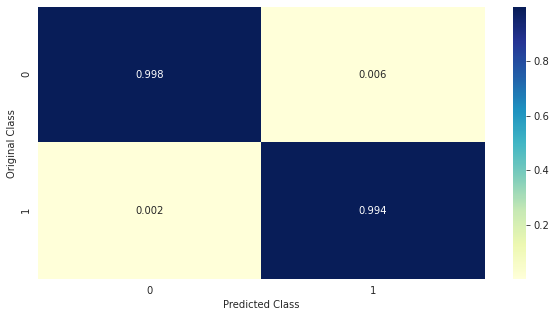

-------------------- Recall matrix (Row sum=1) --------------------


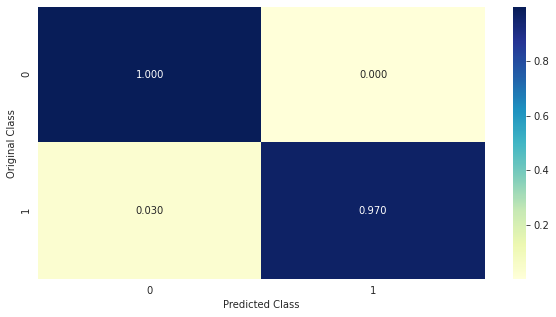

 44%|████▍     | 4/9 [00:16<00:20,  4.03s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[10, 5] is 0.9903671432423586
cv Log Loss for m=120 and max_depth_n_estimators=[10, 10] is 0.20126098519482774:
train Log Loss for m=120 and max_depth_n_estimators=[10, 10] is 0.20076475091072335:
-------------------- Confusion matrix --------------------


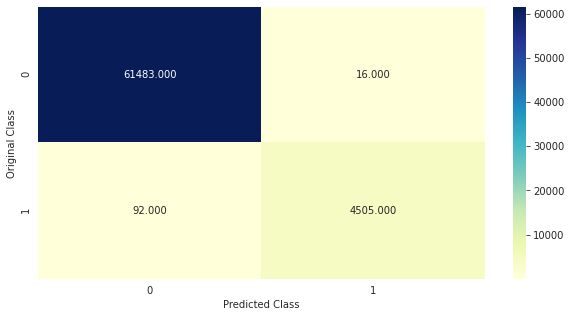

-------------------- Precision matrix (Columm Sum=1) --------------------


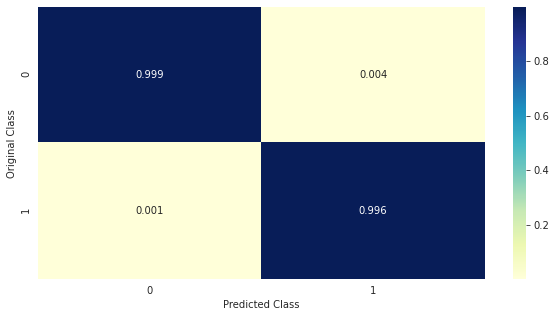

-------------------- Recall matrix (Row sum=1) --------------------


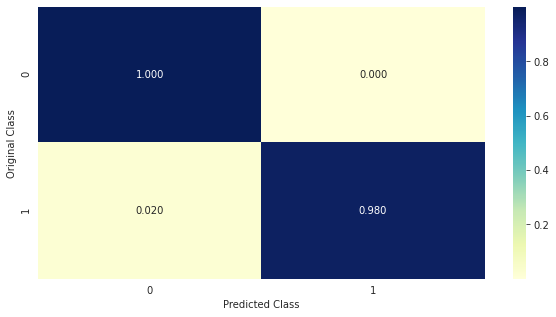

 56%|█████▌    | 5/9 [00:25<00:21,  5.43s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[10, 10] is 0.9936388881865907
cv Log Loss for m=120 and max_depth_n_estimators=[10, 50] is 0.004676235269956736:
train Log Loss for m=120 and max_depth_n_estimators=[10, 50] is 0.0038263934808134663:
-------------------- Confusion matrix --------------------


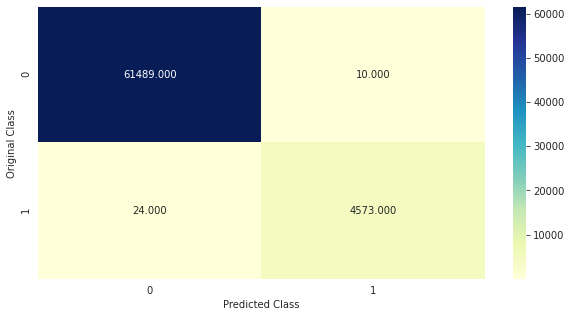

-------------------- Precision matrix (Columm Sum=1) --------------------


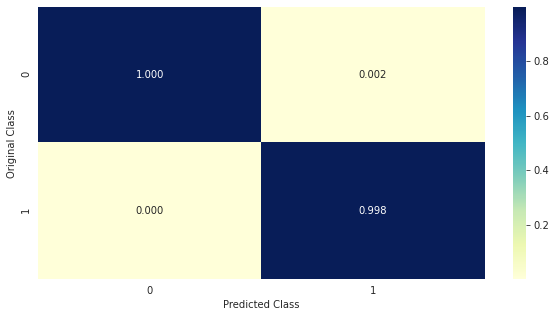

-------------------- Recall matrix (Row sum=1) --------------------


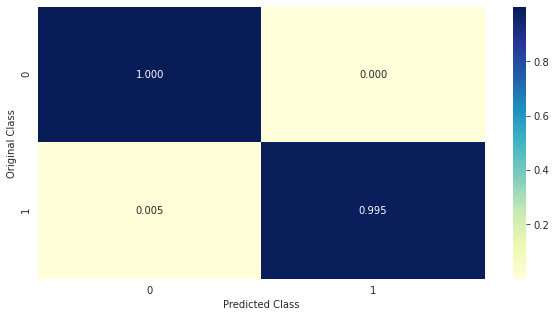

 67%|██████▋   | 6/9 [00:58<00:41, 13.87s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[10, 50] is 0.9980099502487562
cv Log Loss for m=120 and max_depth_n_estimators=[50, 5] is 0.3560097227621029:
train Log Loss for m=120 and max_depth_n_estimators=[50, 5] is 0.35549619604128335:
-------------------- Confusion matrix --------------------


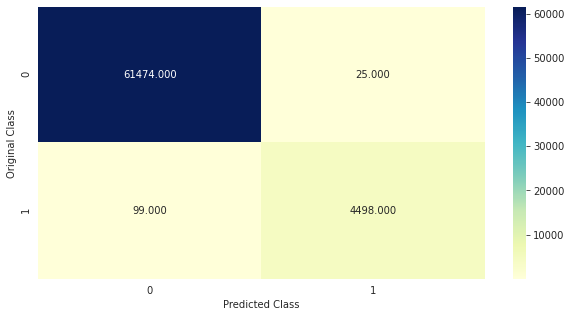

-------------------- Precision matrix (Columm Sum=1) --------------------


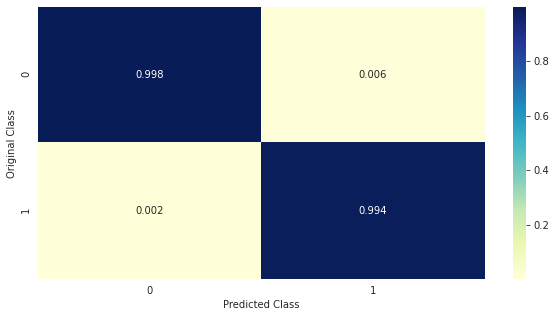

-------------------- Recall matrix (Row sum=1) --------------------


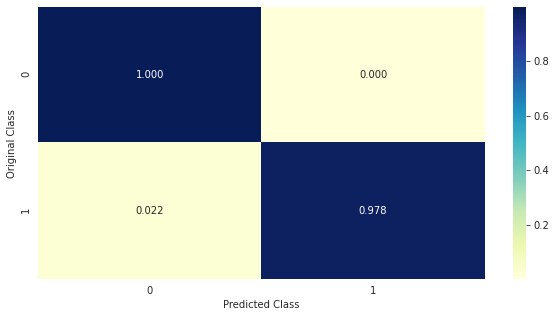

 78%|███████▊  | 7/9 [01:07<00:24, 12.46s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[50, 5] is 0.9926979842351589
cv Log Loss for m=120 and max_depth_n_estimators=[50, 10] is 0.20017046609680397:
train Log Loss for m=120 and max_depth_n_estimators=[50, 10] is 0.19927737999874062:
-------------------- Confusion matrix --------------------


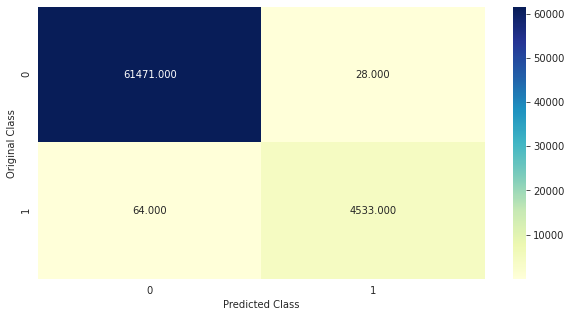

-------------------- Precision matrix (Columm Sum=1) --------------------


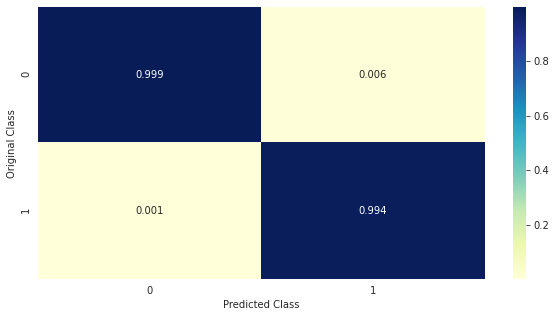

-------------------- Recall matrix (Row sum=1) --------------------


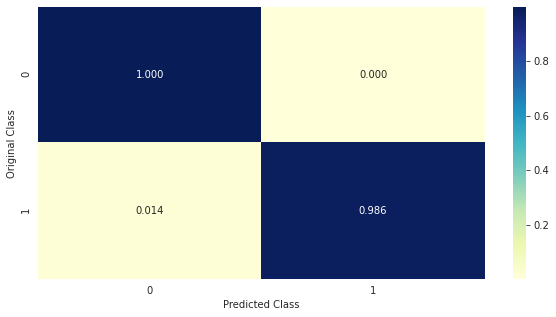

 89%|████████▉ | 8/9 [01:21<00:12, 12.89s/it]

macro average f1 score for m=120 and max_depth_n_estimators=[50, 10] is 0.994603188838303
cv Log Loss for m=120 and max_depth_n_estimators=[50, 50] is 0.00485873948876483:
train Log Loss for m=120 and max_depth_n_estimators=[50, 50] is 0.0037645247371935727:
-------------------- Confusion matrix --------------------


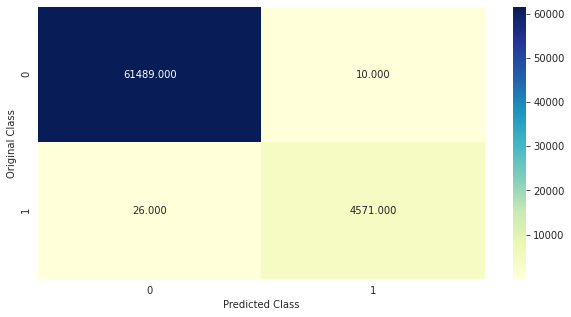

-------------------- Precision matrix (Columm Sum=1) --------------------


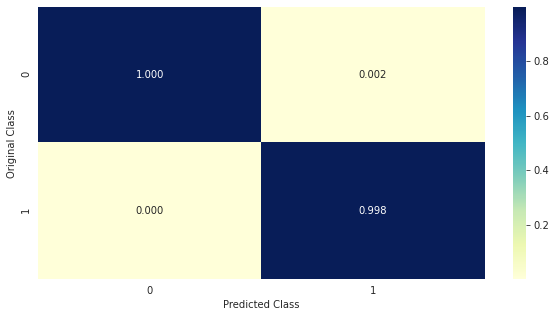

-------------------- Recall matrix (Row sum=1) --------------------


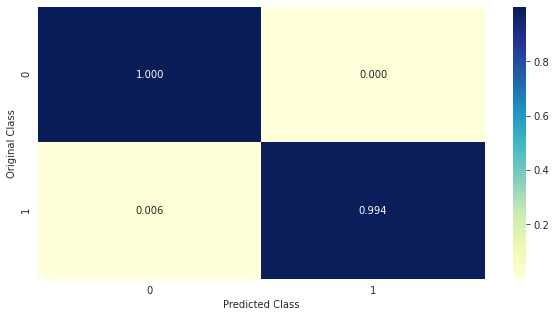

  0%|          | 0/9 [00:00<?, ?it/s]

macro average f1 score for m=120 and max_depth_n_estimators=[50, 50] is 0.997892463598502
cv Log Loss for m=180 and max_depth_n_estimators=[1, 5] is 0.3637339757814819:
train Log Loss for m=180 and max_depth_n_estimators=[1, 5] is 0.36384637264113906:
-------------------- Confusion matrix --------------------


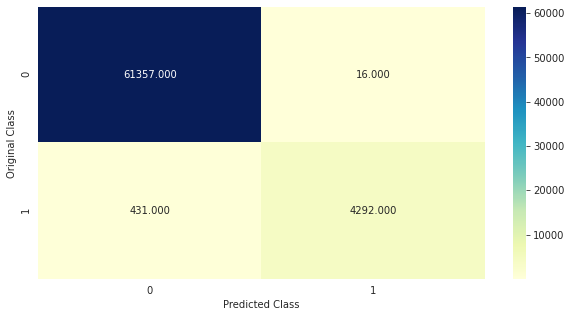

-------------------- Precision matrix (Columm Sum=1) --------------------


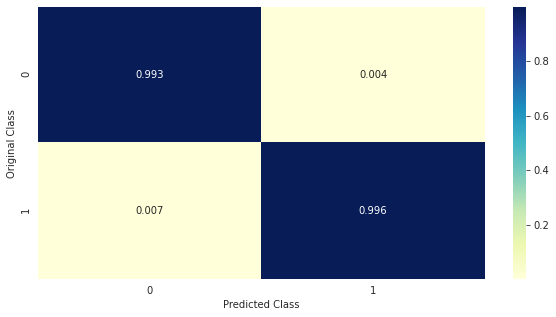

-------------------- Recall matrix (Row sum=1) --------------------


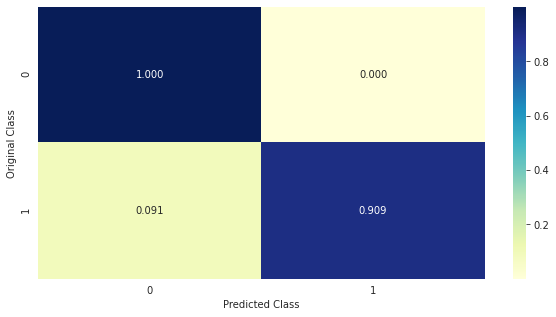

 11%|█         | 1/9 [00:02<00:16,  2.08s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[1, 5] is 0.9734372122529347
cv Log Loss for m=180 and max_depth_n_estimators=[1, 10] is 0.21313441657879342:
train Log Loss for m=180 and max_depth_n_estimators=[1, 10] is 0.2134264954464999:
-------------------- Confusion matrix --------------------


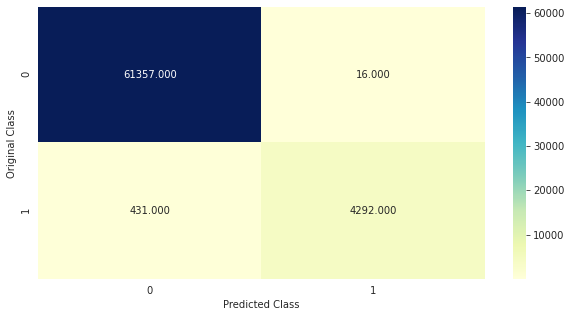

-------------------- Precision matrix (Columm Sum=1) --------------------


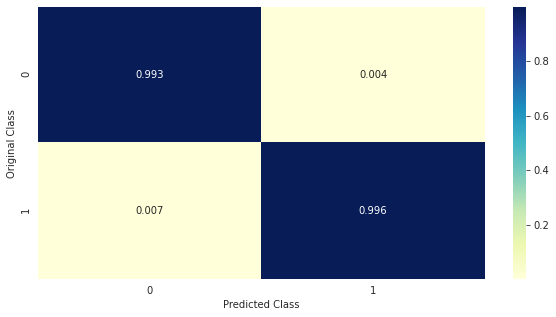

-------------------- Recall matrix (Row sum=1) --------------------


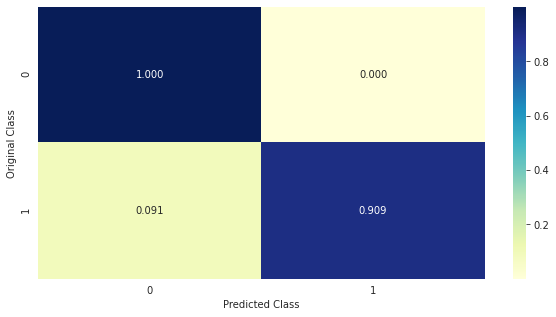

 22%|██▏       | 2/9 [00:04<00:15,  2.23s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[1, 10] is 0.9734372122529347
cv Log Loss for m=180 and max_depth_n_estimators=[1, 50] is 0.03431397074050056:
train Log Loss for m=180 and max_depth_n_estimators=[1, 50] is 0.03528036051670584:
-------------------- Confusion matrix --------------------


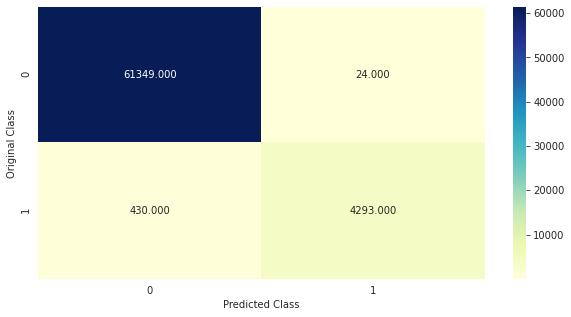

-------------------- Precision matrix (Columm Sum=1) --------------------


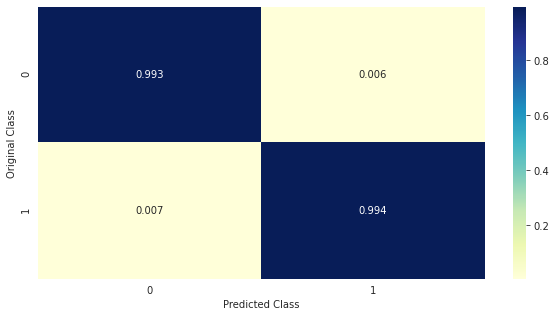

-------------------- Recall matrix (Row sum=1) --------------------


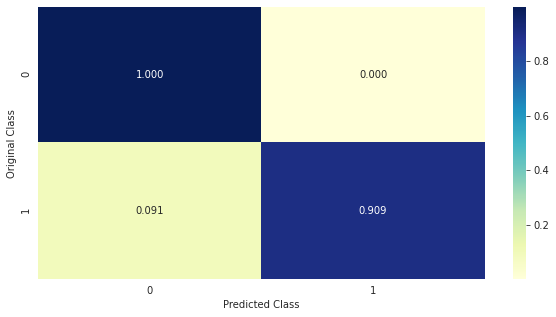

 33%|███▎      | 3/9 [00:10<00:20,  3.46s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[1, 50] is 0.97304612991385
cv Log Loss for m=180 and max_depth_n_estimators=[10, 5] is 0.3574871909202789:
train Log Loss for m=180 and max_depth_n_estimators=[10, 5] is 0.35741558426298126:
-------------------- Confusion matrix --------------------


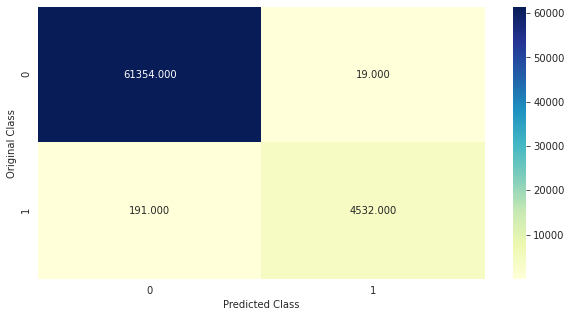

-------------------- Precision matrix (Columm Sum=1) --------------------


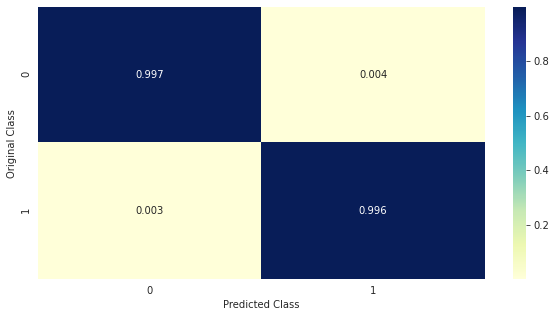

-------------------- Recall matrix (Row sum=1) --------------------


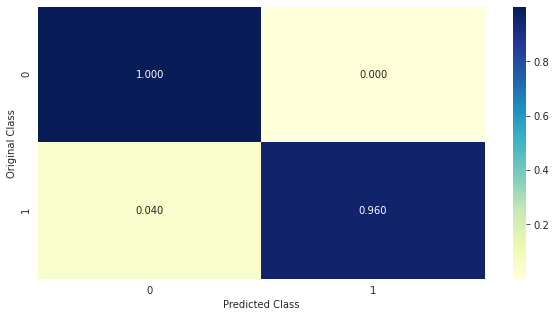

 44%|████▍     | 4/9 [00:16<00:20,  4.00s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[10, 5] is 0.9878237965629275
cv Log Loss for m=180 and max_depth_n_estimators=[10, 10] is 0.20167253912976693:
train Log Loss for m=180 and max_depth_n_estimators=[10, 10] is 0.2012333436111473:
-------------------- Confusion matrix --------------------


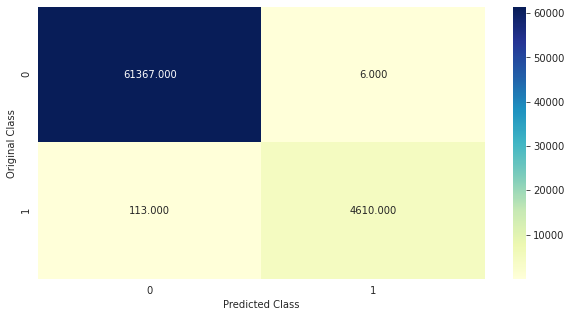

-------------------- Precision matrix (Columm Sum=1) --------------------


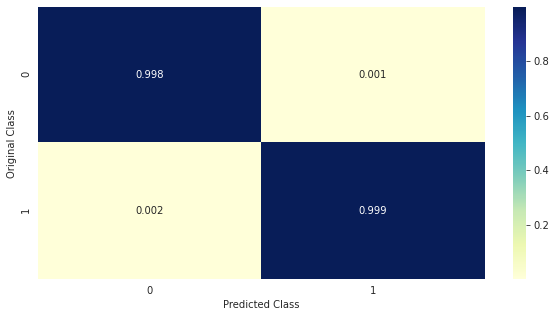

-------------------- Recall matrix (Row sum=1) --------------------


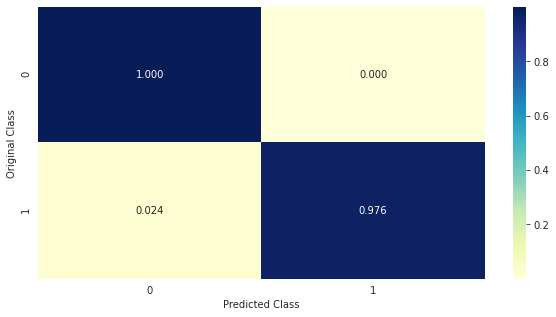

 56%|█████▌    | 5/9 [00:24<00:21,  5.36s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[10, 10] is 0.993144549529915
cv Log Loss for m=180 and max_depth_n_estimators=[10, 50] is 0.005036526471841195:
train Log Loss for m=180 and max_depth_n_estimators=[10, 50] is 0.0038141041955903686:
-------------------- Confusion matrix --------------------


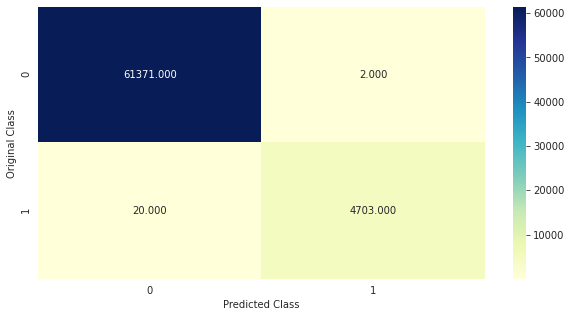

-------------------- Precision matrix (Columm Sum=1) --------------------


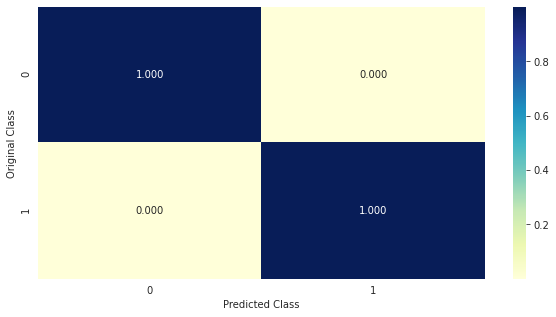

-------------------- Recall matrix (Row sum=1) --------------------


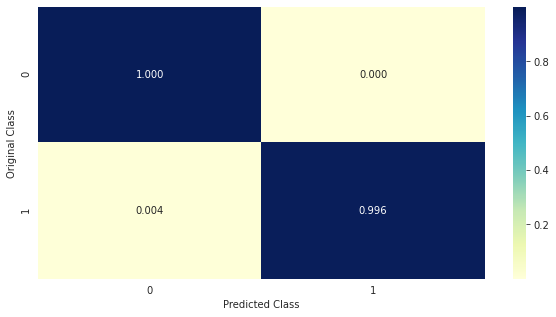

 67%|██████▋   | 6/9 [00:57<00:40, 13.52s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[10, 50] is 0.9987436598068196
cv Log Loss for m=180 and max_depth_n_estimators=[50, 5] is 0.35526766656368414:
train Log Loss for m=180 and max_depth_n_estimators=[50, 5] is 0.35485168856977994:
-------------------- Confusion matrix --------------------


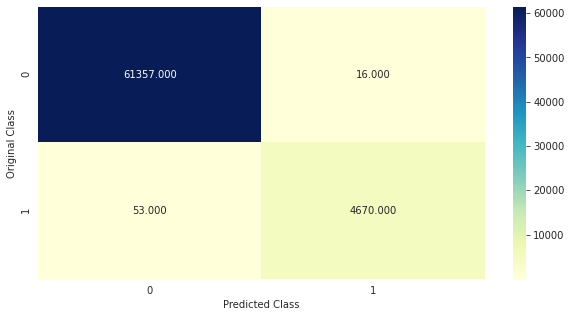

-------------------- Precision matrix (Columm Sum=1) --------------------


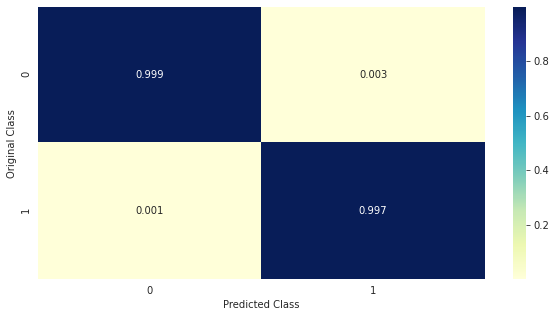

-------------------- Recall matrix (Row sum=1) --------------------


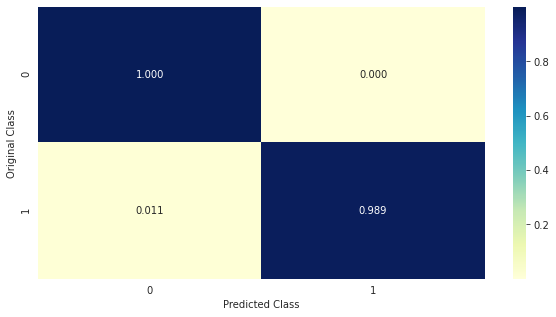

 78%|███████▊  | 7/9 [01:10<00:26, 13.43s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[50, 5] is 0.9960523143824822
cv Log Loss for m=180 and max_depth_n_estimators=[50, 10] is 0.19950372946659656:
train Log Loss for m=180 and max_depth_n_estimators=[50, 10] is 0.1987945233780568:
-------------------- Confusion matrix --------------------


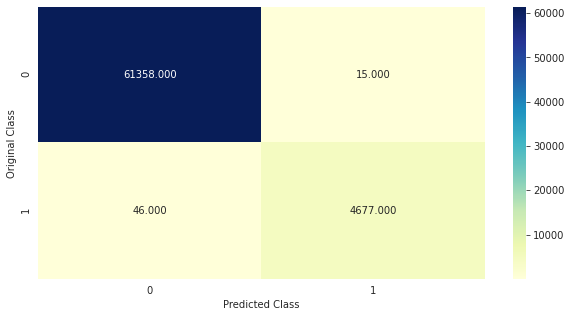

-------------------- Precision matrix (Columm Sum=1) --------------------


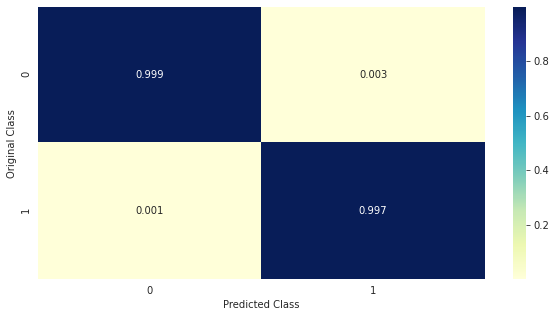

-------------------- Recall matrix (Row sum=1) --------------------


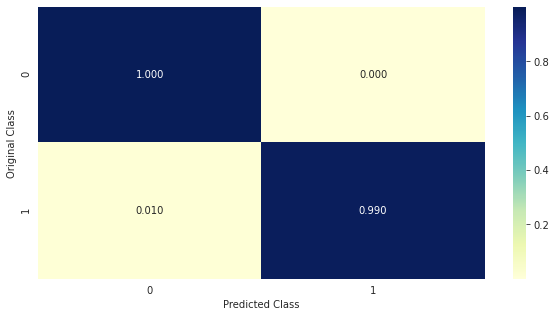

 89%|████████▉ | 8/9 [01:28<00:14, 14.77s/it]

macro average f1 score for m=180 and max_depth_n_estimators=[50, 10] is 0.9965120707187693
cv Log Loss for m=180 and max_depth_n_estimators=[50, 50] is 0.004798738207809209:
train Log Loss for m=180 and max_depth_n_estimators=[50, 50] is 0.0037850514553578606:
-------------------- Confusion matrix --------------------


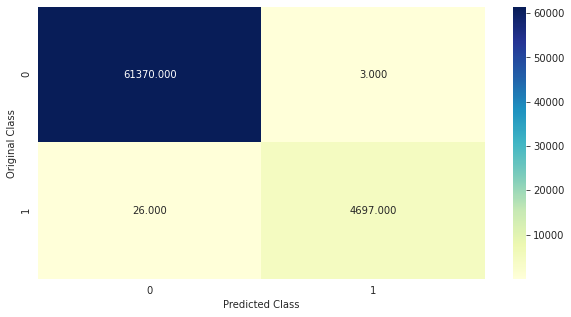

-------------------- Precision matrix (Columm Sum=1) --------------------


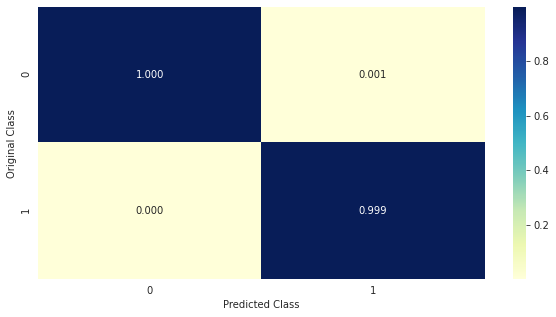

-------------------- Recall matrix (Row sum=1) --------------------


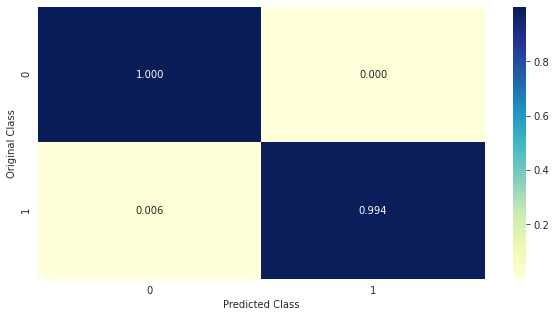

  0%|          | 0/9 [00:00<?, ?it/s]

macro average f1 score for m=180 and max_depth_n_estimators=[50, 50] is 0.9983431039368296
cv Log Loss for m=240 and max_depth_n_estimators=[1, 5] is 0.3663674725358577:
train Log Loss for m=240 and max_depth_n_estimators=[1, 5] is 0.3659944646180553:
-------------------- Confusion matrix --------------------


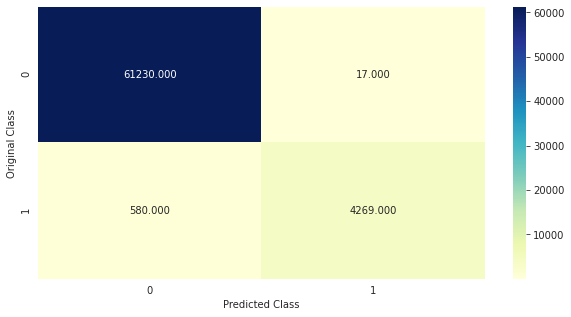

-------------------- Precision matrix (Columm Sum=1) --------------------


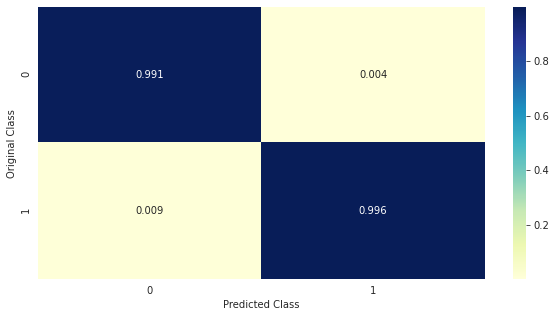

-------------------- Recall matrix (Row sum=1) --------------------


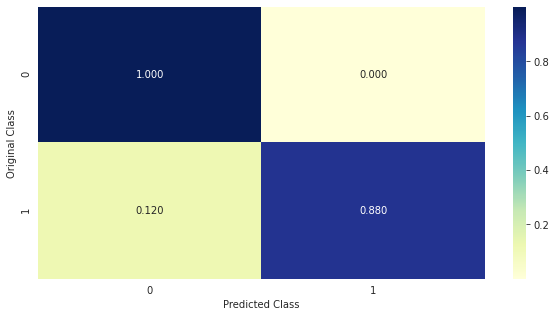

 11%|█         | 1/9 [00:02<00:17,  2.19s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[1, 5] is 0.9648977759555617
cv Log Loss for m=240 and max_depth_n_estimators=[1, 10] is 0.2172608464151773:
train Log Loss for m=240 and max_depth_n_estimators=[1, 10] is 0.2166661637156408:
-------------------- Confusion matrix --------------------


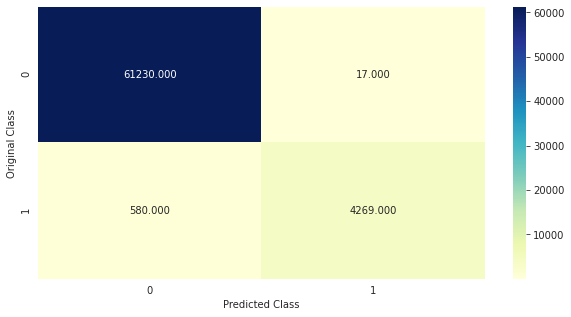

-------------------- Precision matrix (Columm Sum=1) --------------------


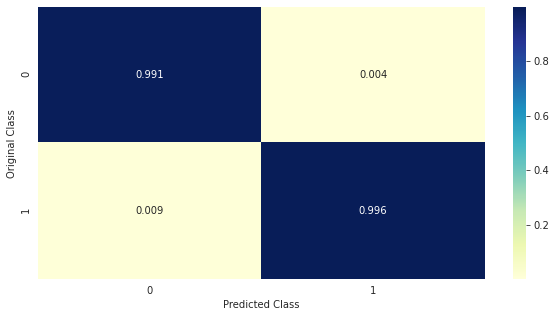

-------------------- Recall matrix (Row sum=1) --------------------


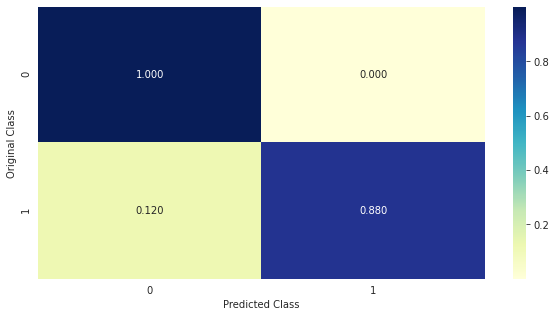

 22%|██▏       | 2/9 [00:04<00:16,  2.31s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[1, 10] is 0.9648977759555617
cv Log Loss for m=240 and max_depth_n_estimators=[1, 50] is 0.0426422782749284:
train Log Loss for m=240 and max_depth_n_estimators=[1, 50] is 0.04070049936709251:
-------------------- Confusion matrix --------------------


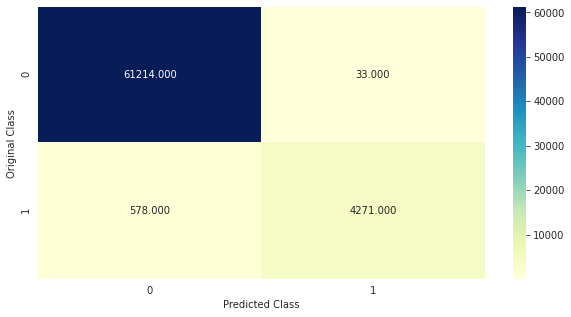

-------------------- Precision matrix (Columm Sum=1) --------------------


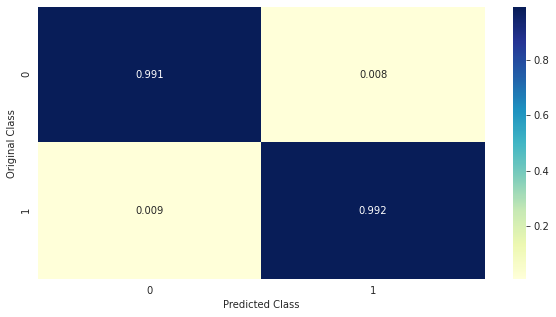

-------------------- Recall matrix (Row sum=1) --------------------


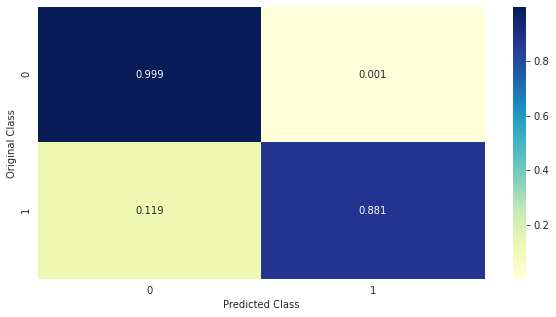

 33%|███▎      | 3/9 [00:10<00:20,  3.48s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[1, 50] is 0.9641400125882814
cv Log Loss for m=240 and max_depth_n_estimators=[10, 5] is 0.35733225882076564:
train Log Loss for m=240 and max_depth_n_estimators=[10, 5] is 0.3567994129705117:
-------------------- Confusion matrix --------------------


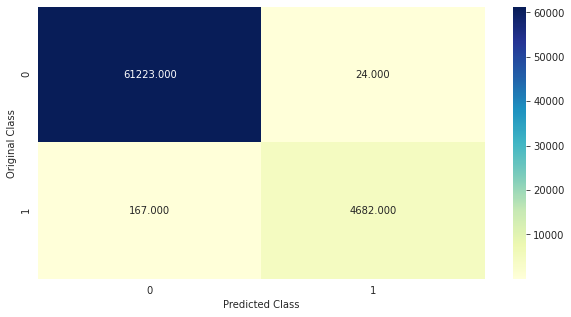

-------------------- Precision matrix (Columm Sum=1) --------------------


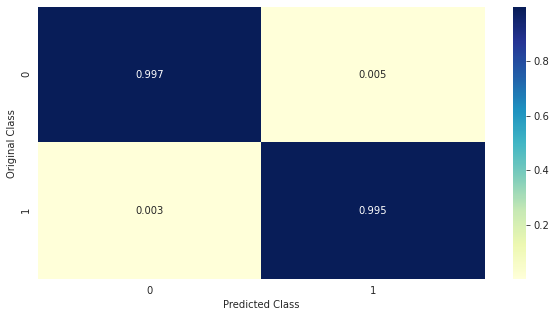

-------------------- Recall matrix (Row sum=1) --------------------


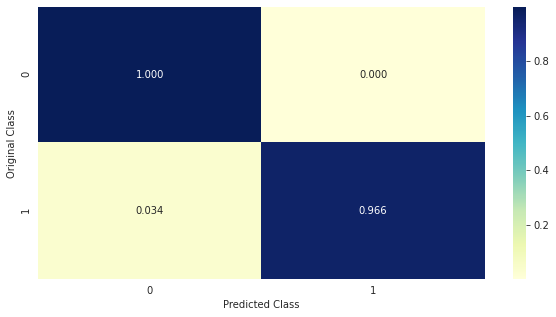

 44%|████▍     | 4/9 [00:15<00:19,  3.94s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[10, 5] is 0.9892265119217134
cv Log Loss for m=240 and max_depth_n_estimators=[10, 10] is 0.20101024980921778:
train Log Loss for m=240 and max_depth_n_estimators=[10, 10] is 0.2001642092137324:
-------------------- Confusion matrix --------------------


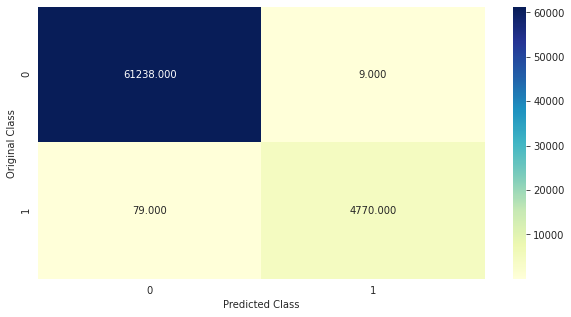

-------------------- Precision matrix (Columm Sum=1) --------------------


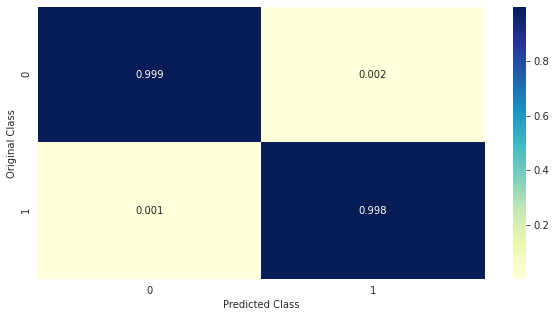

-------------------- Recall matrix (Row sum=1) --------------------


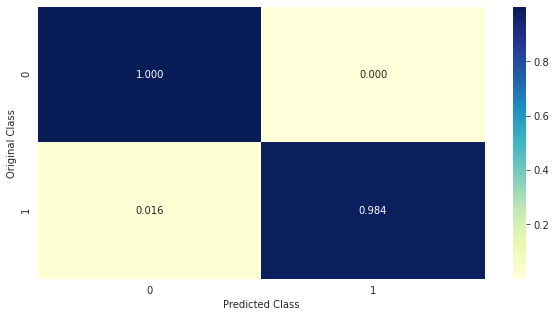

 56%|█████▌    | 5/9 [00:24<00:21,  5.27s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[10, 10] is 0.995070999729136
cv Log Loss for m=240 and max_depth_n_estimators=[10, 50] is 0.0051811589649773775:
train Log Loss for m=240 and max_depth_n_estimators=[10, 50] is 0.0038252594430148007:
-------------------- Confusion matrix --------------------


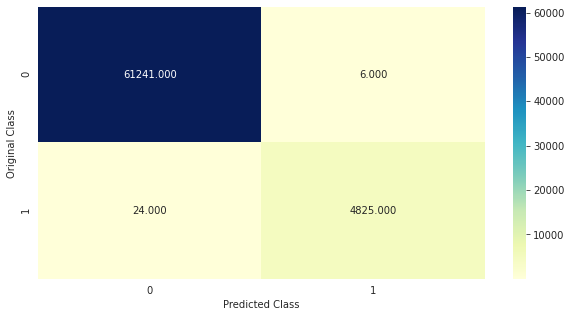

-------------------- Precision matrix (Columm Sum=1) --------------------


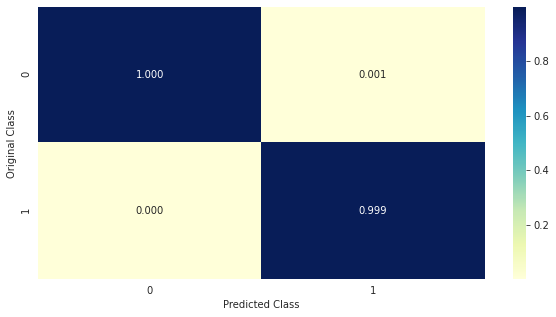

-------------------- Recall matrix (Row sum=1) --------------------


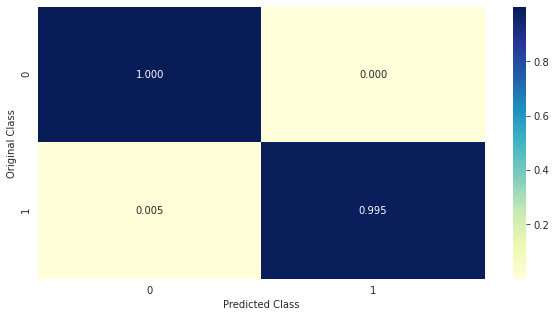

 67%|██████▋   | 6/9 [00:56<00:40, 13.38s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[10, 50] is 0.9983279762373758
cv Log Loss for m=240 and max_depth_n_estimators=[50, 5] is 0.35549185454994864:
train Log Loss for m=240 and max_depth_n_estimators=[50, 5] is 0.3549431932818793:
-------------------- Confusion matrix --------------------


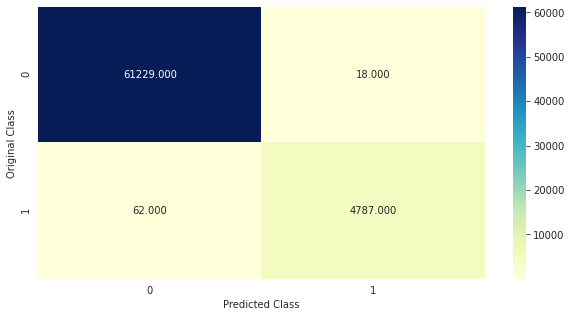

-------------------- Precision matrix (Columm Sum=1) --------------------


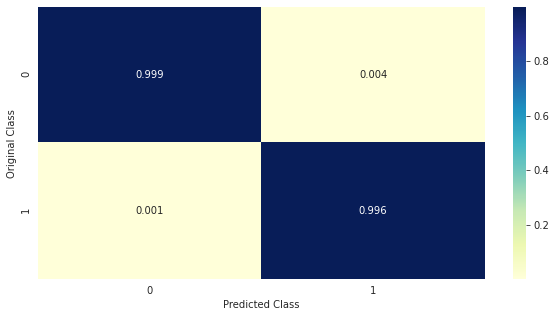

-------------------- Recall matrix (Row sum=1) --------------------


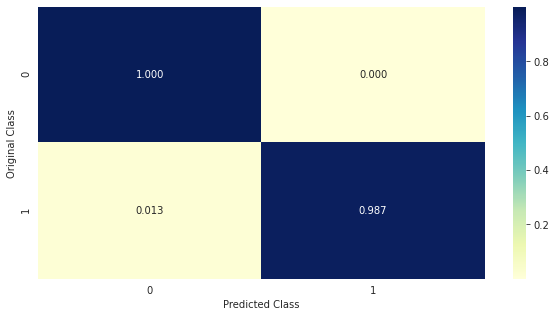

 78%|███████▊  | 7/9 [01:02<00:22, 11.13s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[50, 5] is 0.9955302103822975
cv Log Loss for m=240 and max_depth_n_estimators=[50, 10] is 0.19979526468630668:
train Log Loss for m=240 and max_depth_n_estimators=[50, 10] is 0.19888824071741906:
-------------------- Confusion matrix --------------------


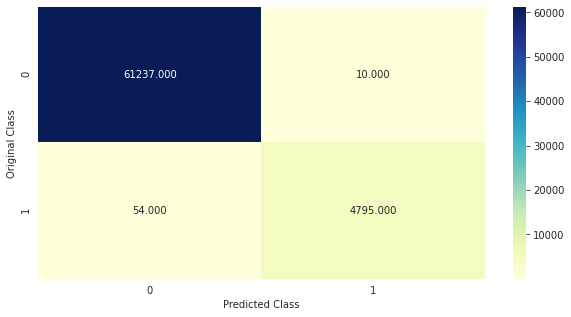

-------------------- Precision matrix (Columm Sum=1) --------------------


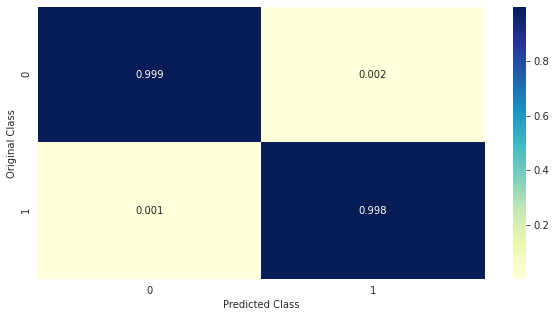

-------------------- Recall matrix (Row sum=1) --------------------


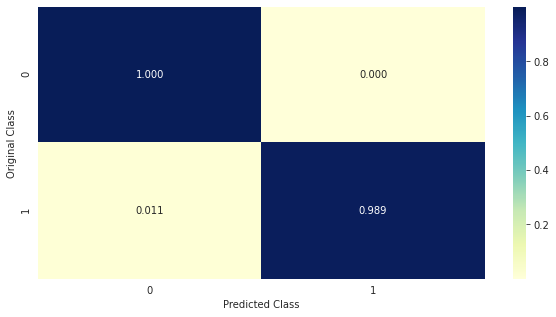

 89%|████████▉ | 8/9 [01:12<00:10, 10.88s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[50, 10] is 0.996424168305838
cv Log Loss for m=240 and max_depth_n_estimators=[50, 50] is 0.005203368213624175:
train Log Loss for m=240 and max_depth_n_estimators=[50, 50] is 0.003755944024961433:
-------------------- Confusion matrix --------------------


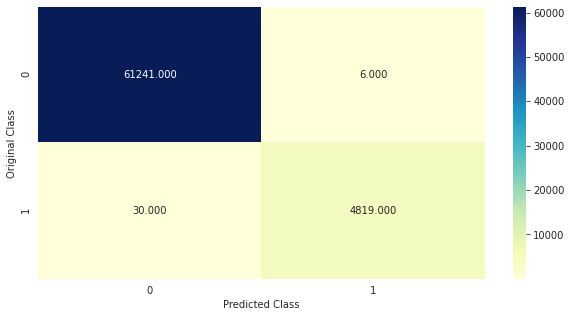

-------------------- Precision matrix (Columm Sum=1) --------------------


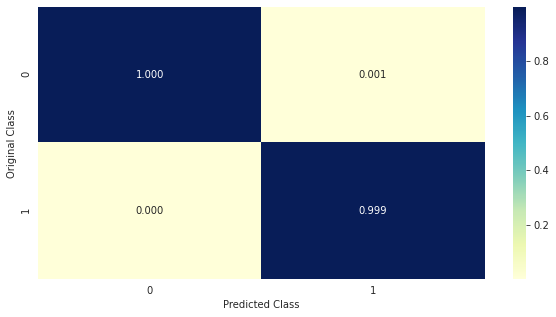

-------------------- Recall matrix (Row sum=1) --------------------


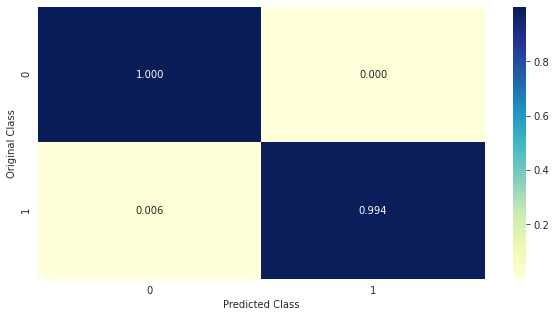

100%|██████████| 9/9 [01:51<00:00, 12.37s/it]

macro average f1 score for m=240 and max_depth_n_estimators=[50, 50] is 0.9979924253800287


In [ ]:
xgb_res=[]
for index,ele in enumerate(y):
    max_depth_n_estimators=[[1,5],[1,10],[1,50],[10,5],[10,10],[10,50],[50,5],[50,10],[50,50]]

    
    cv_log_error_array = []
    train_log_error_array = []
    
    for i in tqdm(max_depth_n_estimators):
   
        clf = xgb.XGBClassifier(max_depth=i[0],n_estimators=i[1],n_jobs=-1)
        clf.fit(X_train[index], Y_train[index])
        
       
        clf_probs_cv=clf.predict_proba(X_cv[index])
        clf_probs_train=clf.predict_proba(X_train[index])
        cv_log_error_array.append(log_loss(Y_cv[index], clf_probs_cv, labels=clf.classes_, eps=1e-15))
        train_log_error_array.append(log_loss(Y_train[index], clf_probs_train, labels=clf.classes_, eps=1e-15))
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
        print("cv Log Loss for m={} and max_depth_n_estimators={} is {}:".format(m[index],i,log_loss(Y_cv[index], clf_probs_cv))) 
        print("train Log Loss for m={} and max_depth_n_estimators={} is {}:".format(m[index],i,log_loss(Y_train[index], clf_probs_train))) 
        
        predict_y_test=clf.predict(X_test[index])
        plot_confusion_matrix(Y_test[index],predict_y_test)
        f1=f1_score(Y_test[index], predict_y_test, average='macro')
        print('macro average f1 score for m={} and max_depth_n_estimators={} is {}'.format(m[index],i,f1))
        xgb_res.append([m[index],i,log_loss(Y_cv[index], clf_probs_cv),log_loss(Y_train[index], clf_probs_train),f1])
 


## RBF SVM results

In [ ]:
df_rbf_svm_res=pd.DataFrame(rbf_svm_res,columns=['m','alpha','cv_log_loss','train_log_loss','f1_score'])

In [ ]:
df_rbf_svm_res

m    alpha  cv_log_loss  train_log_loss  f1_score
0    60    0.001     0.031921        0.031616  0.953858
1    60    0.010     0.026981        0.025666  0.967526
2    60    0.100     0.018912        0.017516  0.981528
3    60    1.000     0.013375        0.011990  0.987756
4    60   10.000     0.009508        0.007471  0.990767
5    60  100.000     0.003371        0.002073  0.993270
6   120    0.001     0.044522        0.043401  0.950265
7   120    0.010     0.038136        0.037256  0.962930
8   120    0.100     0.028884        0.028529  0.975427
9   120    1.000     0.021894        0.021450  0.983689
10  120   10.000     0.015853        0.013943  0.986461
11  120  100.000     0.005389        0.004559  0.992794
12  180    0.001     0.051068        0.053222  0.941323
13  180    0.010     0.044455        0.046390  0.953560
14  180    0.100     0.035133        0.036326  0.969276
15  180    1.000     0.028001        0.028581  0.977451
16  180   10.000     0.015658        0.015006  0.980356
17  180  100.000     0.006148        0.005370  0.989882
18  240    0.001     0.063045        0.060433  0.935612
19  240    0.010     0.054859        0.052827  0.949839
20  240    0.100     0.044173        0.043065  0.962105
21  240    1.000     0.033657        0.032771  0.970282
22  240   10.000     0.016425        0.016467  0.977928
23  240  100.000     0.006347        0.005456  0.991349

## Random forest results

In [ ]:
df_random_forest_res=pd.DataFrame(random_forest_res,columns=['m','n_estimators_max_depth','cv_log_loss','train_log_loss','f1_score'])

In [ ]:
df_random_forest_res

m n_estimators_max_depth  cv_log_loss  train_log_loss  f1_score
0    60               [100, 5]     0.013899        0.012969  0.990007
1    60              [100, 10]     0.006901        0.005382  0.992966
2    60               [500, 5]     0.013760        0.012613  0.990007
3    60              [500, 10]     0.006720        0.005300  0.993151
4    60              [1000, 5]     0.013826        0.012684  0.989881
5    60             [1000, 10]     0.006804        0.005385  0.993211
6   120               [100, 5]     0.022874        0.022428  0.985946
7   120              [100, 10]     0.011947        0.010987  0.988075
8   120               [500, 5]     0.022885        0.022335  0.986001
9   120              [500, 10]     0.011289        0.010376  0.988199
10  120              [1000, 5]     0.022993        0.022441  0.985946
11  120             [1000, 10]     0.011218        0.010297  0.988199
12  180               [100, 5]     0.029292        0.029630  0.979291
13  180              [100, 10]     0.013723        0.012873  0.982622
14  180               [500, 5]     0.029129        0.029415  0.979718
15  180              [500, 10]     0.013355        0.012595  0.982138
16  180              [1000, 5]     0.029202        0.029481  0.979535
17  180             [1000, 10]     0.013283        0.012528  0.982622
18  240               [100, 5]     0.036669        0.034508  0.972573
19  240              [100, 10]     0.015884        0.014286  0.976839
20  240               [500, 5]     0.035548        0.033385  0.972218
21  240              [500, 10]     0.015328        0.013670  0.976899
22  240              [1000, 5]     0.035561        0.033406  0.972035
23  240             [1000, 10]     0.015269        0.013607  0.976959

## XG boost results

In [ ]:
df_xgb_res=pd.DataFrame(xgb_res,columns=['m','max_depth_n_estimators','cv_log_loss','train_log_loss','f1_score'])

In [ ]:
df_xgb_res

m max_depth_n_estimators  cv_log_loss  train_log_loss  f1_score
0    60                 [1, 5]     0.358203        0.357948  0.985552
1    60                [1, 10]     0.204623        0.204215  0.985552
2    60                [1, 50]     0.018166        0.017001  0.985552
3    60                [10, 5]     0.356173        0.355758  0.992479
4    60               [10, 10]     0.200689        0.199992  0.993220
5    60               [10, 50]     0.004658        0.003769  0.997414
6    60                [50, 5]     0.356165        0.355749  0.992479
7    60               [50, 10]     0.200038        0.199430  0.993161
8    60               [50, 50]     0.004588        0.003724  0.997777
9   120                 [1, 5]     0.361152        0.361235  0.981172
10  120                [1, 10]     0.209238        0.209258  0.981172
11  120                [1, 50]     0.027409        0.027285  0.981304
12  120                [10, 5]     0.357039        0.356758  0.990367
13  120               [10, 10]     0.201261        0.200765  0.993639
14  120               [10, 50]     0.004676        0.003826  0.998010
15  120                [50, 5]     0.356010        0.355496  0.992698
16  120               [50, 10]     0.200170        0.199277  0.994603
17  120               [50, 50]     0.004859        0.003765  0.997892
18  180                 [1, 5]     0.363734        0.363846  0.973437
19  180                [1, 10]     0.213134        0.213426  0.973437
20  180                [1, 50]     0.034314        0.035280  0.973046
21  180                [10, 5]     0.357487        0.357416  0.987824
22  180               [10, 10]     0.201673        0.201233  0.993145
23  180               [10, 50]     0.005037        0.003814  0.998744
24  180                [50, 5]     0.355268        0.354852  0.996052
25  180               [50, 10]     0.199504        0.198795  0.996512
26  180               [50, 50]     0.004799        0.003785  0.998343
27  240                 [1, 5]     0.366367        0.365994  0.964898
28  240                [1, 10]     0.217261        0.216666  0.964898
29  240                [1, 50]     0.042642        0.040700  0.964140
30  240                [10, 5]     0.357332        0.356799  0.989227
31  240               [10, 10]     0.201010        0.200164  0.995071
32  240               [10, 50]     0.005181        0.003825  0.998328
33  240                [50, 5]     0.355492        0.354943  0.995530
34  240               [50, 10]     0.199795        0.198888  0.996424
35  240               [50, 50]     0.005203        0.003756  0.997992